Датасет https://archive.ics.uci.edu/ml/datasets/Car+Evaluation

## Загрузка библиотек, данных и первичная оработка 

In [2]:
#Импорт библиотек
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
plt.style.use(['dark_background'])
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [3]:
# загрузка данных
data = pd.read_csv('car.data')
data.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [4]:
data.shape

(1728, 7)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   class     1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [6]:
#судя по описанию на сайте, датасет предствляет из себя описание признаков эвакуированных машин
#классов машин всего 4 unacc, acc, good, vgood, так как они идут от наихудшего к наилучшему
#, то можно их пронумеровть от 1 до 4
# аналогично можно поступить с категориальными перемерменными buting, maint и lug_bust

In [7]:
data['class'].value_counts()

unacc    1210
acc       384
good       69
vgood      65
Name: class, dtype: int64

In [8]:
data['buying'].value_counts()

low      432
high     432
med      432
vhigh    432
Name: buying, dtype: int64

In [9]:
data['doors'].value_counts()

4        432
2        432
5more    432
3        432
Name: doors, dtype: int64

In [10]:
# заменю 5more просто на 5, так как рапределение пропорциональное и получу в итоге поде с числом
data['doors'] = data['doors'].str.replace('5more','5')
data['doors']= data['doors'].astype(int)


In [11]:
data['persons'].value_counts()

4       576
2       576
more    576
Name: persons, dtype: int64

In [12]:
data['persons'] = data['persons'].str.replace('more','5')
data['persons']= data['persons'].astype(int)

In [13]:
data['maint'].value_counts()

low      432
high     432
med      432
vhigh    432
Name: maint, dtype: int64

In [14]:
data['lug_boot'].value_counts()

big      576
small    576
med      576
Name: lug_boot, dtype: int64

In [15]:
data['safety'].value_counts()

low     576
high    576
med     576
Name: safety, dtype: int64

In [16]:
# видно, что пример учебный, так как признаки распредлены равномерно по категориям,
# в реальной жизни такое очень редко встречается

In [17]:
def safety_map(label):
    if  label == 'low':
        return 1
    if  label == 'med':
        return 2
    else:
        return 3
def lug_boot_map(label):
    if  label == 'small':
        return 1
    if  label == 'med':
        return 2
    else:
        return 3
def maint_map(label):
    if  label == 'low':
        return 1
    if  label == 'med':
        return 2
    if  label == 'high':
        return 3
    else:
        return 4
def buying_map(label):
    if  label == 'low':
        return 1
    if  label == 'med':
        return 2
    if  label == 'high':
        return 3
    else:
        return 4
def class_map(label):
    if  label == 'unacc':
        return 1
    if  label == 'acc':
        return 2
    if  label == 'good':
        return 3
    else:
        return 4
        

In [18]:
data['safety'] = data['safety'].apply(lambda x :safety_map(x))
data['lug_boot'] = data['lug_boot'].apply(lambda x :lug_boot_map(x))
data['maint'] = data['maint'].apply(lambda x :maint_map(x))
data['buying'] = data['buying'].apply(lambda x :buying_map(x))
data['class'] = data['class'].apply(lambda x :class_map(x))
data.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,4,4,2,2,1,1,1
1,4,4,2,2,1,2,1
2,4,4,2,2,1,3,1
3,4,4,2,2,2,1,1
4,4,4,2,2,2,2,1


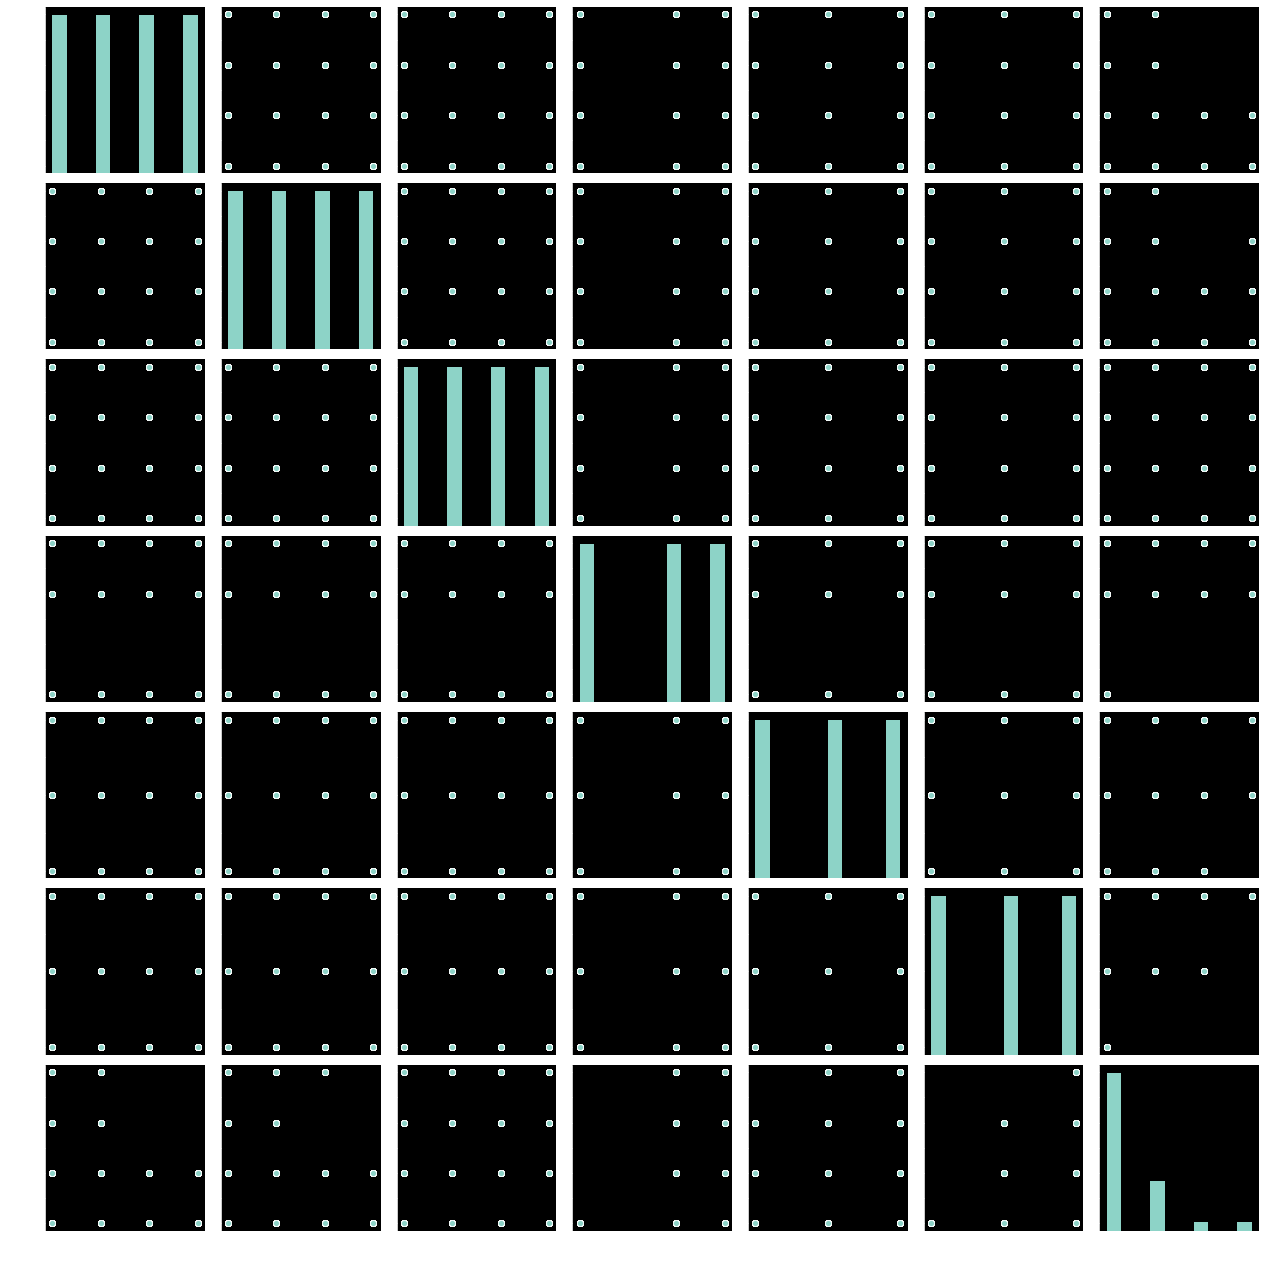

In [19]:
#подтверждение того, что данные придуманные
sns.pairplot(data)

## Построение моделей

In [20]:
# train-test split
X_train, X_test, y_train, y_test = train_test_split(
    data.drop(['class'], axis=1), data['class'], test_size=0.20, random_state=42
)

### Сравнение нескольких моделей по точности

In [21]:
# посроение нескольких моделей для сравнения
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

log_clf = LogisticRegression(random_state=42)
rnd_clf = RandomForestClassifier(random_state=42)
svm_clf = SVC(probability=True, random_state=42)
gaus_clf = GaussianNB()
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(random_state=42), 
    random_state=42
)

voting_clf = VotingClassifier(
    estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf), \
                ('gaus', gaus_clf),('bagging', bag_clf)],
    voting='soft')
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('lr',
                              LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='auto',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=42,
                                                 solver='lbfgs', tol=0.0001,
                                                 verbose=0, warm_start=False)),
                             ('rf',
                              RandomForestClassifier(bootstrap=True,
                                                     ccp_alpha=0.0,
                                                     class_weight=None,
                                               

In [22]:
from sklearn.metrics import accuracy_score

for clf in (log_clf, rnd_clf, svm_clf, voting_clf, gaus_clf, bag_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.8323699421965318
RandomForestClassifier 0.9624277456647399
SVC 0.9450867052023122
VotingClassifier 0.9566473988439307
GaussianNB 0.7456647398843931
BaggingClassifier 0.9710982658959537


### Перебор параметров моделей с помощью GridSearchCV

#### RandomForestClassifier

In [23]:
# поиск оптимального кол-ва деревьев для использования их в GridSearchCV
arr_trees = []
for i in range(1,200):
    rnd_clf = RandomForestClassifier(random_state=42,n_estimators = i)
    rnd_clf.fit(X_train, y_train)
    y_pred = rnd_clf.predict(X_test)
    arr_trees.append(accuracy_score(y_test, y_pred))

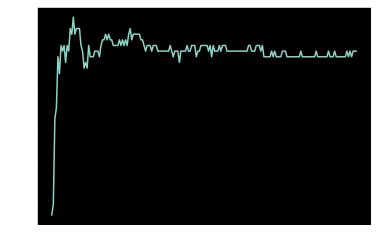

In [26]:
# визуализация полученных результатов
plt.plot(range(1,200),arr_trees)

In [27]:
# получение 5 оптимальных параметров для использования их в GridSearchCV
df_acc_trees = pd.DataFrame(arr_trees,columns=['acc_score'])
df_acc_trees.sort_values(by=['acc_score'],ascending=False).head().index+1

Int64Index([15, 52, 13, 19, 18], dtype='int64')

In [28]:
# аналогично подберу глубину деревьев
arr_depth = []
for i in range(1,200):
    rnd_clf = RandomForestClassifier(random_state=42,n_estimators = 15, max_depth=i)
    rnd_clf.fit(X_train, y_train)
    y_pred = rnd_clf.predict(X_test)
    arr_depth.append(accuracy_score(y_test, y_pred))

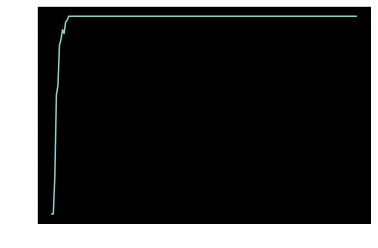

In [29]:
plt.plot(range(1,200),arr_depth)

In [30]:
df_acc_depth = pd.DataFrame(arr_depth,columns=['acc_score'])
df_acc_depth.sort_values(by=['acc_score'],ascending=False).head().index+1

Int64Index([100, 126, 128, 129, 130], dtype='int64')

In [31]:
param_grid = {'bootstrap': [True, False],
             'max_depth':[100, 126, 128, 129, 130],
             'max_features': ['auto', 'sqrt'],
             'min_samples_leaf': [1, 2, 4],
             'min_samples_split': [2, 5, 10],
             'n_estimators': [15, 52, 13, 19, 18]}  
  
grid = GridSearchCV(RandomForestClassifier(), param_grid, refit = True, verbose = 3) 
  
# fitting the model for grid search 
grid.fit(X_train, y_train) 

Fitting 5 folds for each of 900 candidates, totalling 4500 fits
[CV] bootstrap=True, max_depth=100, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=15 
[CV]  bootstrap=True, max_depth=100, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=15, score=0.960, total=   0.0s
[CV] bootstrap=True, max_depth=100, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=15 
[CV]  bootstrap=True, max_depth=100, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=15, score=0.968, total=   0.0s
[CV] bootstrap=True, max_depth=100, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=15 
[CV]  bootstrap=True, max_depth=100, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=15, score=0.953, total=   0.0s
[CV] bootstrap=True, max_depth=100, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=15 
[CV]  bootstrap=True, max_depth=100, max_features=auto, min_s

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s



[CV] bootstrap=True, max_depth=100, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=52 
[CV]  bootstrap=True, max_depth=100, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=52, score=0.993, total=   0.1s
[CV] bootstrap=True, max_depth=100, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=52 
[CV]  bootstrap=True, max_depth=100, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=52, score=0.993, total=   0.1s
[CV] bootstrap=True, max_depth=100, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=52 
[CV]  bootstrap=True, max_depth=100, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=52, score=0.986, total=   0.1s
[CV] bootstrap=True, max_depth=100, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=52 
[CV]  bootstrap=True, max_depth=100, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=52, score=0.96

[CV]  bootstrap=True, max_depth=100, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=19, score=0.964, total=   0.0s
[CV] bootstrap=True, max_depth=100, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=19 
[CV]  bootstrap=True, max_depth=100, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=19, score=0.957, total=   0.0s
[CV] bootstrap=True, max_depth=100, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=18 
[CV]  bootstrap=True, max_depth=100, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=18, score=0.968, total=   0.0s
[CV] bootstrap=True, max_depth=100, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=18 
[CV]  bootstrap=True, max_depth=100, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=18, score=0.957, total=   0.0s
[CV] bootstrap=True, max_depth=100, max_features=auto, min_samples_leaf=1, min_samples_split=5, n

[CV]  bootstrap=True, max_depth=100, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=52, score=0.960, total=   0.1s
[CV] bootstrap=True, max_depth=100, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=52 
[CV]  bootstrap=True, max_depth=100, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=52, score=0.982, total=   0.1s
[CV] bootstrap=True, max_depth=100, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=52 
[CV]  bootstrap=True, max_depth=100, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=52, score=0.971, total=   0.1s
[CV] bootstrap=True, max_depth=100, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=52 
[CV]  bootstrap=True, max_depth=100, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=52, score=0.971, total=   0.1s
[CV] bootstrap=True, max_depth=100, max_features=auto, min_samples_leaf=2, min_samples_split=2, n

[CV]  bootstrap=True, max_depth=100, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=19, score=0.975, total=   0.0s
[CV] bootstrap=True, max_depth=100, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=19 
[CV]  bootstrap=True, max_depth=100, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=19, score=0.982, total=   0.0s
[CV] bootstrap=True, max_depth=100, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=19 
[CV]  bootstrap=True, max_depth=100, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=19, score=0.986, total=   0.0s
[CV] bootstrap=True, max_depth=100, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=19 
[CV]  bootstrap=True, max_depth=100, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=19, score=0.953, total=   0.0s
[CV] bootstrap=True, max_depth=100, max_features=auto, min_samples_leaf=2, min_samples_split=5, n

[CV]  bootstrap=True, max_depth=100, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=15, score=0.957, total=   0.0s
[CV] bootstrap=True, max_depth=100, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=15 
[CV]  bootstrap=True, max_depth=100, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=15, score=0.964, total=   0.0s
[CV] bootstrap=True, max_depth=100, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=52 
[CV]  bootstrap=True, max_depth=100, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=52, score=0.939, total=   0.1s
[CV] bootstrap=True, max_depth=100, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=52 
[CV]  bootstrap=True, max_depth=100, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=52, score=0.978, total=   0.1s
[CV] bootstrap=True, max_depth=100, max_features=auto, min_samples_leaf=4, min_samples_split=2, n

[CV]  bootstrap=True, max_depth=100, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=13, score=0.949, total=   0.0s
[CV] bootstrap=True, max_depth=100, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=13 
[CV]  bootstrap=True, max_depth=100, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=13, score=0.964, total=   0.0s
[CV] bootstrap=True, max_depth=100, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=13 
[CV]  bootstrap=True, max_depth=100, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=13, score=0.931, total=   0.0s
[CV] bootstrap=True, max_depth=100, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=19 
[CV]  bootstrap=True, max_depth=100, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=19, score=0.949, total=   0.0s
[CV] bootstrap=True, max_depth=100, max_features=auto, min_samples_leaf=4, min_samples_split=5, n

[CV]  bootstrap=True, max_depth=100, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=18, score=0.953, total=   0.0s
[CV] bootstrap=True, max_depth=100, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=18 
[CV]  bootstrap=True, max_depth=100, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=18, score=0.935, total=   0.0s
[CV] bootstrap=True, max_depth=100, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=15 
[CV]  bootstrap=True, max_depth=100, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=15, score=0.975, total=   0.0s
[CV] bootstrap=True, max_depth=100, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=15 
[CV]  bootstrap=True, max_depth=100, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=15, score=0.975, total=   0.0s
[CV] bootstrap=True, max_depth=100, max_features=sqrt, min_samples_leaf=1, min_samples_split=2

[CV]  bootstrap=True, max_depth=100, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=52, score=0.975, total=   0.1s
[CV] bootstrap=True, max_depth=100, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=52 
[CV]  bootstrap=True, max_depth=100, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=52, score=0.978, total=   0.1s
[CV] bootstrap=True, max_depth=100, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=52 
[CV]  bootstrap=True, max_depth=100, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=52, score=0.971, total=   0.1s
[CV] bootstrap=True, max_depth=100, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=13 
[CV]  bootstrap=True, max_depth=100, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=13, score=0.957, total=   0.0s
[CV] bootstrap=True, max_depth=100, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n

[CV]  bootstrap=True, max_depth=100, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=19, score=0.964, total=   0.0s
[CV] bootstrap=True, max_depth=100, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=19 
[CV]  bootstrap=True, max_depth=100, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=19, score=0.953, total=   0.0s
[CV] bootstrap=True, max_depth=100, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=18 
[CV]  bootstrap=True, max_depth=100, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=18, score=0.946, total=   0.0s
[CV] bootstrap=True, max_depth=100, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=18 
[CV]  bootstrap=True, max_depth=100, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=18, score=0.942, total=   0.0s
[CV] bootstrap=True, max_depth=100, max_features=sqrt, min_samples_leaf=1, min_samples_spl

[CV]  bootstrap=True, max_depth=100, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=15, score=0.949, total=   0.0s
[CV] bootstrap=True, max_depth=100, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=52 
[CV]  bootstrap=True, max_depth=100, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=52, score=0.957, total=   0.1s
[CV] bootstrap=True, max_depth=100, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=52 
[CV]  bootstrap=True, max_depth=100, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=52, score=0.968, total=   0.1s
[CV] bootstrap=True, max_depth=100, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=52 
[CV]  bootstrap=True, max_depth=100, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=52, score=0.964, total=   0.1s
[CV] bootstrap=True, max_depth=100, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n

[CV]  bootstrap=True, max_depth=100, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=19, score=0.964, total=   0.0s
[CV] bootstrap=True, max_depth=100, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=19 
[CV]  bootstrap=True, max_depth=100, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=19, score=0.949, total=   0.0s
[CV] bootstrap=True, max_depth=100, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=19 
[CV]  bootstrap=True, max_depth=100, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=19, score=0.928, total=   0.0s
[CV] bootstrap=True, max_depth=100, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=18 
[CV]  bootstrap=True, max_depth=100, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=18, score=0.946, total=   0.0s
[CV] bootstrap=True, max_depth=100, max_features=sqrt, min_samples_leaf=2, min_samples_spl

[CV]  bootstrap=True, max_depth=100, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=15, score=0.964, total=   0.0s
[CV] bootstrap=True, max_depth=100, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=15 
[CV]  bootstrap=True, max_depth=100, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=15, score=0.946, total=   0.0s
[CV] bootstrap=True, max_depth=100, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=52 
[CV]  bootstrap=True, max_depth=100, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=52, score=0.942, total=   0.1s
[CV] bootstrap=True, max_depth=100, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=52 
[CV]  bootstrap=True, max_depth=100, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=52, score=0.960, total=   0.1s
[CV] bootstrap=True, max_depth=100, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n

[CV]  bootstrap=True, max_depth=100, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=19, score=0.964, total=   0.0s
[CV] bootstrap=True, max_depth=100, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=19 
[CV]  bootstrap=True, max_depth=100, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=19, score=0.975, total=   0.0s
[CV] bootstrap=True, max_depth=100, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=19 
[CV]  bootstrap=True, max_depth=100, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=19, score=0.953, total=   0.0s
[CV] bootstrap=True, max_depth=100, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=19 
[CV]  bootstrap=True, max_depth=100, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=19, score=0.942, total=   0.0s
[CV] bootstrap=True, max_depth=100, max_features=sqrt, min_samples_leaf=4, min_samples_spl

[CV]  bootstrap=True, max_depth=126, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=18, score=0.960, total=   0.0s
[CV] bootstrap=True, max_depth=126, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=15 
[CV]  bootstrap=True, max_depth=126, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=15, score=0.957, total=   0.0s
[CV] bootstrap=True, max_depth=126, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=15 
[CV]  bootstrap=True, max_depth=126, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=15, score=0.978, total=   0.0s
[CV] bootstrap=True, max_depth=126, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=15 
[CV]  bootstrap=True, max_depth=126, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=15, score=0.964, total=   0.0s
[CV] bootstrap=True, max_depth=126, max_features=auto, min_samples_leaf=1, min_samples_split=5, n

[CV]  bootstrap=True, max_depth=126, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=52, score=0.967, total=   0.1s
[CV] bootstrap=True, max_depth=126, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=52 
[CV]  bootstrap=True, max_depth=126, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=52, score=0.975, total=   0.1s
[CV] bootstrap=True, max_depth=126, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=52 
[CV]  bootstrap=True, max_depth=126, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=52, score=0.957, total=   0.1s
[CV] bootstrap=True, max_depth=126, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=13 
[CV]  bootstrap=True, max_depth=126, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=13, score=0.946, total=   0.0s
[CV] bootstrap=True, max_depth=126, max_features=auto, min_samples_leaf=1, min_samples_spl

[CV]  bootstrap=True, max_depth=126, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=19, score=0.971, total=   0.0s
[CV] bootstrap=True, max_depth=126, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=19 
[CV]  bootstrap=True, max_depth=126, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=19, score=0.978, total=   0.0s
[CV] bootstrap=True, max_depth=126, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=19 
[CV]  bootstrap=True, max_depth=126, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=19, score=0.982, total=   0.0s
[CV] bootstrap=True, max_depth=126, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=19 
[CV]  bootstrap=True, max_depth=126, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=19, score=0.949, total=   0.0s
[CV] bootstrap=True, max_depth=126, max_features=auto, min_samples_leaf=2, min_samples_split=2, n

[CV]  bootstrap=True, max_depth=126, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=15, score=0.946, total=   0.0s
[CV] bootstrap=True, max_depth=126, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=15 
[CV]  bootstrap=True, max_depth=126, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=15, score=0.967, total=   0.0s
[CV] bootstrap=True, max_depth=126, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=15 
[CV]  bootstrap=True, max_depth=126, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=15, score=0.949, total=   0.0s
[CV] bootstrap=True, max_depth=126, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=15 
[CV]  bootstrap=True, max_depth=126, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=15, score=0.949, total=   0.0s
[CV] bootstrap=True, max_depth=126, max_features=auto, min_samples_leaf=2, min_samples_spl

[CV]  bootstrap=True, max_depth=126, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=13, score=0.960, total=   0.0s
[CV] bootstrap=True, max_depth=126, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=13 
[CV]  bootstrap=True, max_depth=126, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=13, score=0.935, total=   0.0s
[CV] bootstrap=True, max_depth=126, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=19 
[CV]  bootstrap=True, max_depth=126, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=19, score=0.949, total=   0.0s
[CV] bootstrap=True, max_depth=126, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=19 
[CV]  bootstrap=True, max_depth=126, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=19, score=0.964, total=   0.0s
[CV] bootstrap=True, max_depth=126, max_features=auto, min_samples_leaf=4, min_samples_split=2, n

[CV]  bootstrap=True, max_depth=126, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=18, score=0.942, total=   0.0s
[CV] bootstrap=True, max_depth=126, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=15 
[CV]  bootstrap=True, max_depth=126, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=15, score=0.949, total=   0.0s
[CV] bootstrap=True, max_depth=126, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=15 
[CV]  bootstrap=True, max_depth=126, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=15, score=0.953, total=   0.0s
[CV] bootstrap=True, max_depth=126, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=15 
[CV]  bootstrap=True, max_depth=126, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=15, score=0.967, total=   0.0s
[CV] bootstrap=True, max_depth=126, max_features=auto, min_samples_leaf=4, min_samples_spli

[CV]  bootstrap=True, max_depth=126, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=52, score=0.989, total=   0.1s
[CV] bootstrap=True, max_depth=126, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=52 
[CV]  bootstrap=True, max_depth=126, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=52, score=0.982, total=   0.1s
[CV] bootstrap=True, max_depth=126, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=52 
[CV]  bootstrap=True, max_depth=126, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=52, score=0.975, total=   0.1s
[CV] bootstrap=True, max_depth=126, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=13 
[CV]  bootstrap=True, max_depth=126, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=13, score=0.978, total=   0.0s
[CV] bootstrap=True, max_depth=126, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n

[CV]  bootstrap=True, max_depth=126, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=18, score=0.949, total=   0.0s
[CV] bootstrap=True, max_depth=126, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=18 
[CV]  bootstrap=True, max_depth=126, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=18, score=0.957, total=   0.0s
[CV] bootstrap=True, max_depth=126, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=18 
[CV]  bootstrap=True, max_depth=126, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=18, score=0.993, total=   0.0s
[CV] bootstrap=True, max_depth=126, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=18 
[CV]  bootstrap=True, max_depth=126, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=18, score=0.978, total=   0.0s
[CV] bootstrap=True, max_depth=126, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n

[CV]  bootstrap=True, max_depth=126, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=52, score=0.957, total=   0.1s
[CV] bootstrap=True, max_depth=126, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=52 
[CV]  bootstrap=True, max_depth=126, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=52, score=0.978, total=   0.1s
[CV] bootstrap=True, max_depth=126, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=52 
[CV]  bootstrap=True, max_depth=126, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=52, score=0.986, total=   0.1s
[CV] bootstrap=True, max_depth=126, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=52 
[CV]  bootstrap=True, max_depth=126, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=52, score=0.986, total=   0.1s
[CV] bootstrap=True, max_depth=126, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n

[CV]  bootstrap=True, max_depth=126, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=19, score=0.957, total=   0.0s
[CV] bootstrap=True, max_depth=126, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=18 
[CV]  bootstrap=True, max_depth=126, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=18, score=0.942, total=   0.0s
[CV] bootstrap=True, max_depth=126, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=18 
[CV]  bootstrap=True, max_depth=126, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=18, score=0.978, total=   0.0s
[CV] bootstrap=True, max_depth=126, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=18 
[CV]  bootstrap=True, max_depth=126, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=18, score=0.967, total=   0.0s
[CV] bootstrap=True, max_depth=126, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n

[CV]  bootstrap=True, max_depth=126, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=52, score=0.957, total=   0.1s
[CV] bootstrap=True, max_depth=126, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=52 
[CV]  bootstrap=True, max_depth=126, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=52, score=0.964, total=   0.1s
[CV] bootstrap=True, max_depth=126, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=52 
[CV]  bootstrap=True, max_depth=126, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=52, score=0.960, total=   0.1s
[CV] bootstrap=True, max_depth=126, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=52 
[CV]  bootstrap=True, max_depth=126, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=52, score=0.971, total=   0.1s
[CV] bootstrap=True, max_depth=126, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n

[CV]  bootstrap=True, max_depth=126, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=13, score=0.978, total=   0.0s
[CV] bootstrap=True, max_depth=126, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=13 
[CV]  bootstrap=True, max_depth=126, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=13, score=0.938, total=   0.0s
[CV] bootstrap=True, max_depth=126, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=19 
[CV]  bootstrap=True, max_depth=126, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=19, score=0.957, total=   0.0s
[CV] bootstrap=True, max_depth=126, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=19 
[CV]  bootstrap=True, max_depth=126, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=19, score=0.968, total=   0.0s
[CV] bootstrap=True, max_depth=126, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n

[CV]  bootstrap=True, max_depth=128, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=15, score=0.978, total=   0.0s
[CV] bootstrap=True, max_depth=128, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=15 
[CV]  bootstrap=True, max_depth=128, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=15, score=0.967, total=   0.0s
[CV] bootstrap=True, max_depth=128, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=52 
[CV]  bootstrap=True, max_depth=128, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=52, score=0.968, total=   0.1s
[CV] bootstrap=True, max_depth=128, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=52 
[CV]  bootstrap=True, max_depth=128, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=52, score=0.989, total=   0.1s
[CV] bootstrap=True, max_depth=128, max_features=auto, min_samples_leaf=1, min_samples_split=2, n

[CV]  bootstrap=True, max_depth=128, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=19, score=0.957, total=   0.0s
[CV] bootstrap=True, max_depth=128, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=19 
[CV]  bootstrap=True, max_depth=128, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=19, score=0.968, total=   0.0s
[CV] bootstrap=True, max_depth=128, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=19 
[CV]  bootstrap=True, max_depth=128, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=19, score=0.978, total=   0.0s
[CV] bootstrap=True, max_depth=128, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=19 
[CV]  bootstrap=True, max_depth=128, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=19, score=0.967, total=   0.0s
[CV] bootstrap=True, max_depth=128, max_features=auto, min_samples_leaf=1, min_samples_split=5, n

[CV]  bootstrap=True, max_depth=128, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=18, score=0.935, total=   0.0s
[CV] bootstrap=True, max_depth=128, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=15 
[CV]  bootstrap=True, max_depth=128, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=15, score=0.957, total=   0.0s
[CV] bootstrap=True, max_depth=128, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=15 
[CV]  bootstrap=True, max_depth=128, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=15, score=0.968, total=   0.0s
[CV] bootstrap=True, max_depth=128, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=15 
[CV]  bootstrap=True, max_depth=128, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=15, score=0.975, total=   0.0s
[CV] bootstrap=True, max_depth=128, max_features=auto, min_samples_leaf=2, min_samples_split=2, 

[CV]  bootstrap=True, max_depth=128, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=52, score=0.978, total=   0.1s
[CV] bootstrap=True, max_depth=128, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=52 
[CV]  bootstrap=True, max_depth=128, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=52, score=0.982, total=   0.1s
[CV] bootstrap=True, max_depth=128, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=52 
[CV]  bootstrap=True, max_depth=128, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=52, score=0.957, total=   0.1s
[CV] bootstrap=True, max_depth=128, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=13 
[CV]  bootstrap=True, max_depth=128, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=13, score=0.960, total=   0.0s
[CV] bootstrap=True, max_depth=128, max_features=auto, min_samples_leaf=2, min_samples_split=5, n

[CV]  bootstrap=True, max_depth=128, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=19, score=0.964, total=   0.0s
[CV] bootstrap=True, max_depth=128, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=19 
[CV]  bootstrap=True, max_depth=128, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=19, score=0.960, total=   0.0s
[CV] bootstrap=True, max_depth=128, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=19 
[CV]  bootstrap=True, max_depth=128, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=19, score=0.960, total=   0.0s
[CV] bootstrap=True, max_depth=128, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=19 
[CV]  bootstrap=True, max_depth=128, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=19, score=0.953, total=   0.0s
[CV] bootstrap=True, max_depth=128, max_features=auto, min_samples_leaf=2, min_samples_spl

[CV]  bootstrap=True, max_depth=128, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=15, score=0.953, total=   0.0s
[CV] bootstrap=True, max_depth=128, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=15 
[CV]  bootstrap=True, max_depth=128, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=15, score=0.971, total=   0.0s
[CV] bootstrap=True, max_depth=128, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=15 
[CV]  bootstrap=True, max_depth=128, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=15, score=0.938, total=   0.0s
[CV] bootstrap=True, max_depth=128, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=52 
[CV]  bootstrap=True, max_depth=128, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=52, score=0.939, total=   0.1s
[CV] bootstrap=True, max_depth=128, max_features=auto, min_samples_leaf=4, min_samples_split=5, n

[CV]  bootstrap=True, max_depth=128, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=13, score=0.935, total=   0.0s
[CV] bootstrap=True, max_depth=128, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=13 
[CV]  bootstrap=True, max_depth=128, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=13, score=0.938, total=   0.0s
[CV] bootstrap=True, max_depth=128, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=19 
[CV]  bootstrap=True, max_depth=128, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=19, score=0.935, total=   0.0s
[CV] bootstrap=True, max_depth=128, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=19 
[CV]  bootstrap=True, max_depth=128, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=19, score=0.960, total=   0.0s
[CV] bootstrap=True, max_depth=128, max_features=auto, min_samples_leaf=4, min_samples_spl

[CV]  bootstrap=True, max_depth=128, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=18, score=0.960, total=   0.0s
[CV] bootstrap=True, max_depth=128, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=15 
[CV]  bootstrap=True, max_depth=128, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=15, score=0.960, total=   0.0s
[CV] bootstrap=True, max_depth=128, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=15 
[CV]  bootstrap=True, max_depth=128, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=15, score=0.960, total=   0.0s
[CV] bootstrap=True, max_depth=128, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=15 
[CV]  bootstrap=True, max_depth=128, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=15, score=0.964, total=   0.0s
[CV] bootstrap=True, max_depth=128, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n

[CV]  bootstrap=True, max_depth=128, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=52, score=0.960, total=   0.1s
[CV] bootstrap=True, max_depth=128, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=52 
[CV]  bootstrap=True, max_depth=128, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=52, score=0.960, total=   0.1s
[CV] bootstrap=True, max_depth=128, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=52 
[CV]  bootstrap=True, max_depth=128, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=52, score=0.960, total=   0.1s
[CV] bootstrap=True, max_depth=128, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=13 
[CV]  bootstrap=True, max_depth=128, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=13, score=0.953, total=   0.0s
[CV] bootstrap=True, max_depth=128, max_features=sqrt, min_samples_leaf=1, min_samples_spl

[CV]  bootstrap=True, max_depth=128, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=19, score=0.971, total=   0.0s
[CV] bootstrap=True, max_depth=128, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=19 
[CV]  bootstrap=True, max_depth=128, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=19, score=0.978, total=   0.0s
[CV] bootstrap=True, max_depth=128, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=19 
[CV]  bootstrap=True, max_depth=128, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=19, score=0.971, total=   0.0s
[CV] bootstrap=True, max_depth=128, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=19 
[CV]  bootstrap=True, max_depth=128, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=19, score=0.949, total=   0.0s
[CV] bootstrap=True, max_depth=128, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n

[CV]  bootstrap=True, max_depth=128, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=15, score=0.964, total=   0.0s
[CV] bootstrap=True, max_depth=128, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=15 
[CV]  bootstrap=True, max_depth=128, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=15, score=0.960, total=   0.0s
[CV] bootstrap=True, max_depth=128, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=15 
[CV]  bootstrap=True, max_depth=128, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=15, score=0.938, total=   0.0s
[CV] bootstrap=True, max_depth=128, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=52 
[CV]  bootstrap=True, max_depth=128, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=52, score=0.957, total=   0.1s
[CV] bootstrap=True, max_depth=128, max_features=sqrt, min_samples_leaf=2, min_samples_spl

[CV]  bootstrap=True, max_depth=128, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=19, score=0.964, total=   0.0s
[CV] bootstrap=True, max_depth=128, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=19 
[CV]  bootstrap=True, max_depth=128, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=19, score=0.957, total=   0.0s
[CV] bootstrap=True, max_depth=128, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=19 
[CV]  bootstrap=True, max_depth=128, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=19, score=0.953, total=   0.0s
[CV] bootstrap=True, max_depth=128, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=19 
[CV]  bootstrap=True, max_depth=128, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=19, score=0.953, total=   0.0s
[CV] bootstrap=True, max_depth=128, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n

[CV]  bootstrap=True, max_depth=128, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=15, score=0.942, total=   0.0s
[CV] bootstrap=True, max_depth=128, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=15 
[CV]  bootstrap=True, max_depth=128, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=15, score=0.946, total=   0.0s
[CV] bootstrap=True, max_depth=128, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=15 
[CV]  bootstrap=True, max_depth=128, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=15, score=0.938, total=   0.0s
[CV] bootstrap=True, max_depth=128, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=52 
[CV]  bootstrap=True, max_depth=128, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=52, score=0.960, total=   0.1s
[CV] bootstrap=True, max_depth=128, max_features=sqrt, min_samples_leaf=4, min_samples_spl

[CV]  bootstrap=True, max_depth=129, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=13, score=0.971, total=   0.0s
[CV] bootstrap=True, max_depth=129, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=13 
[CV]  bootstrap=True, max_depth=129, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=13, score=0.967, total=   0.0s
[CV] bootstrap=True, max_depth=129, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=19 
[CV]  bootstrap=True, max_depth=129, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=19, score=0.975, total=   0.0s
[CV] bootstrap=True, max_depth=129, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=19 
[CV]  bootstrap=True, max_depth=129, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=19, score=0.978, total=   0.0s
[CV] bootstrap=True, max_depth=129, max_features=auto, min_samples_leaf=1, min_samples_split=2, n

[CV]  bootstrap=True, max_depth=129, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=15, score=0.953, total=   0.0s
[CV] bootstrap=True, max_depth=129, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=15 
[CV]  bootstrap=True, max_depth=129, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=15, score=0.964, total=   0.0s
[CV] bootstrap=True, max_depth=129, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=15 
[CV]  bootstrap=True, max_depth=129, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=15, score=0.953, total=   0.0s
[CV] bootstrap=True, max_depth=129, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=15 
[CV]  bootstrap=True, max_depth=129, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=15, score=0.957, total=   0.0s
[CV] bootstrap=True, max_depth=129, max_features=auto, min_samples_leaf=1, min_samples_spl

[CV]  bootstrap=True, max_depth=129, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=13, score=0.975, total=   0.0s
[CV] bootstrap=True, max_depth=129, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=13 
[CV]  bootstrap=True, max_depth=129, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=13, score=0.949, total=   0.0s
[CV] bootstrap=True, max_depth=129, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=19 
[CV]  bootstrap=True, max_depth=129, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=19, score=0.960, total=   0.0s
[CV] bootstrap=True, max_depth=129, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=19 
[CV]  bootstrap=True, max_depth=129, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=19, score=0.968, total=   0.0s
[CV] bootstrap=True, max_depth=129, max_features=auto, min_samples_leaf=2, min_samples_split=2, n

[CV]  bootstrap=True, max_depth=129, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=15, score=0.949, total=   0.0s
[CV] bootstrap=True, max_depth=129, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=15 
[CV]  bootstrap=True, max_depth=129, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=15, score=0.978, total=   0.0s
[CV] bootstrap=True, max_depth=129, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=15 
[CV]  bootstrap=True, max_depth=129, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=15, score=0.946, total=   0.0s
[CV] bootstrap=True, max_depth=129, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=52 
[CV]  bootstrap=True, max_depth=129, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=52, score=0.946, total=   0.1s
[CV] bootstrap=True, max_depth=129, max_features=auto, min_samples_leaf=2, min_samples_spl

[CV]  bootstrap=True, max_depth=129, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=19, score=0.949, total=   0.0s
[CV] bootstrap=True, max_depth=129, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=19 
[CV]  bootstrap=True, max_depth=129, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=19, score=0.975, total=   0.0s
[CV] bootstrap=True, max_depth=129, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=19 
[CV]  bootstrap=True, max_depth=129, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=19, score=0.949, total=   0.0s
[CV] bootstrap=True, max_depth=129, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=19 
[CV]  bootstrap=True, max_depth=129, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=19, score=0.935, total=   0.0s
[CV] bootstrap=True, max_depth=129, max_features=auto, min_samples_leaf=4, min_samples_split=2, n

[CV]  bootstrap=True, max_depth=129, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=15, score=0.960, total=   0.0s
[CV] bootstrap=True, max_depth=129, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=15 
[CV]  bootstrap=True, max_depth=129, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=15, score=0.957, total=   0.0s
[CV] bootstrap=True, max_depth=129, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=15 
[CV]  bootstrap=True, max_depth=129, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=15, score=0.938, total=   0.0s
[CV] bootstrap=True, max_depth=129, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=52 
[CV]  bootstrap=True, max_depth=129, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=52, score=0.949, total=   0.1s
[CV] bootstrap=True, max_depth=129, max_features=auto, min_samples_leaf=4, min_samples_spl

[CV]  bootstrap=True, max_depth=129, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=19, score=0.989, total=   0.0s
[CV] bootstrap=True, max_depth=129, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=19 
[CV]  bootstrap=True, max_depth=129, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=19, score=0.964, total=   0.0s
[CV] bootstrap=True, max_depth=129, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=19 
[CV]  bootstrap=True, max_depth=129, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=19, score=0.964, total=   0.0s
[CV] bootstrap=True, max_depth=129, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=19 
[CV]  bootstrap=True, max_depth=129, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=19, score=0.967, total=   0.0s
[CV] bootstrap=True, max_depth=129, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n

[CV]  bootstrap=True, max_depth=129, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=15, score=0.942, total=   0.0s
[CV] bootstrap=True, max_depth=129, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=15 
[CV]  bootstrap=True, max_depth=129, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=15, score=0.967, total=   0.0s
[CV] bootstrap=True, max_depth=129, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=15 
[CV]  bootstrap=True, max_depth=129, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=15, score=0.938, total=   0.0s
[CV] bootstrap=True, max_depth=129, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=52 
[CV]  bootstrap=True, max_depth=129, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=52, score=0.957, total=   0.1s
[CV] bootstrap=True, max_depth=129, max_features=sqrt, min_samples_leaf=1, min_samples_spl

[CV]  bootstrap=True, max_depth=129, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=19, score=0.968, total=   0.0s
[CV] bootstrap=True, max_depth=129, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=19 
[CV]  bootstrap=True, max_depth=129, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=19, score=0.982, total=   0.0s
[CV] bootstrap=True, max_depth=129, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=19 
[CV]  bootstrap=True, max_depth=129, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=19, score=0.964, total=   0.0s
[CV] bootstrap=True, max_depth=129, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=19 
[CV]  bootstrap=True, max_depth=129, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=19, score=0.975, total=   0.0s
[CV] bootstrap=True, max_depth=129, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n

[CV]  bootstrap=True, max_depth=129, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=15, score=0.960, total=   0.0s
[CV] bootstrap=True, max_depth=129, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=15 
[CV]  bootstrap=True, max_depth=129, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=15, score=0.964, total=   0.0s
[CV] bootstrap=True, max_depth=129, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=15 
[CV]  bootstrap=True, max_depth=129, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=15, score=0.920, total=   0.0s
[CV] bootstrap=True, max_depth=129, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=52 
[CV]  bootstrap=True, max_depth=129, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=52, score=0.949, total=   0.1s
[CV] bootstrap=True, max_depth=129, max_features=sqrt, min_samples_leaf=2, min_samples_spl

[CV]  bootstrap=True, max_depth=129, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=13, score=0.967, total=   0.0s
[CV] bootstrap=True, max_depth=129, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=13 
[CV]  bootstrap=True, max_depth=129, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=13, score=0.935, total=   0.0s
[CV] bootstrap=True, max_depth=129, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=19 
[CV]  bootstrap=True, max_depth=129, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=19, score=0.946, total=   0.0s
[CV] bootstrap=True, max_depth=129, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=19 
[CV]  bootstrap=True, max_depth=129, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=19, score=0.964, total=   0.0s
[CV] bootstrap=True, max_depth=129, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n

[CV]  bootstrap=True, max_depth=129, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=15, score=0.967, total=   0.0s
[CV] bootstrap=True, max_depth=129, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=15 
[CV]  bootstrap=True, max_depth=129, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=15, score=0.957, total=   0.0s
[CV] bootstrap=True, max_depth=129, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=15 
[CV]  bootstrap=True, max_depth=129, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=15, score=0.938, total=   0.0s
[CV] bootstrap=True, max_depth=129, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=52 
[CV]  bootstrap=True, max_depth=129, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=52, score=0.949, total=   0.1s
[CV] bootstrap=True, max_depth=129, max_features=sqrt, min_samples_leaf=4, min_samples_spl

[CV]  bootstrap=True, max_depth=130, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=19, score=0.964, total=   0.0s
[CV] bootstrap=True, max_depth=130, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=19 
[CV]  bootstrap=True, max_depth=130, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=19, score=0.982, total=   0.0s
[CV] bootstrap=True, max_depth=130, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=19 
[CV]  bootstrap=True, max_depth=130, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=19, score=0.978, total=   0.0s
[CV] bootstrap=True, max_depth=130, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=19 
[CV]  bootstrap=True, max_depth=130, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=19, score=0.982, total=   0.0s
[CV] bootstrap=True, max_depth=130, max_features=auto, min_samples_leaf=1, min_samples_split=2, n

[CV]  bootstrap=True, max_depth=130, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=15, score=0.957, total=   0.0s
[CV] bootstrap=True, max_depth=130, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=15 
[CV]  bootstrap=True, max_depth=130, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=15, score=0.967, total=   0.0s
[CV] bootstrap=True, max_depth=130, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=15 
[CV]  bootstrap=True, max_depth=130, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=15, score=0.967, total=   0.0s
[CV] bootstrap=True, max_depth=130, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=15 
[CV]  bootstrap=True, max_depth=130, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=15, score=0.942, total=   0.0s
[CV] bootstrap=True, max_depth=130, max_features=auto, min_samples_leaf=1, min_samples_spl

[CV]  bootstrap=True, max_depth=130, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=19, score=0.960, total=   0.0s
[CV] bootstrap=True, max_depth=130, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=19 
[CV]  bootstrap=True, max_depth=130, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=19, score=0.960, total=   0.0s
[CV] bootstrap=True, max_depth=130, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=19 
[CV]  bootstrap=True, max_depth=130, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=19, score=0.989, total=   0.0s
[CV] bootstrap=True, max_depth=130, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=19 
[CV]  bootstrap=True, max_depth=130, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=19, score=0.975, total=   0.0s
[CV] bootstrap=True, max_depth=130, max_features=auto, min_samples_leaf=2, min_samples_split=2, n

[CV]  bootstrap=True, max_depth=130, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=18, score=0.935, total=   0.0s
[CV] bootstrap=True, max_depth=130, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=15 
[CV]  bootstrap=True, max_depth=130, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=15, score=0.964, total=   0.0s
[CV] bootstrap=True, max_depth=130, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=15 
[CV]  bootstrap=True, max_depth=130, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=15, score=0.957, total=   0.0s
[CV] bootstrap=True, max_depth=130, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=15 
[CV]  bootstrap=True, max_depth=130, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=15, score=0.931, total=   0.0s
[CV] bootstrap=True, max_depth=130, max_features=auto, min_samples_leaf=2, min_samples_spli

[CV]  bootstrap=True, max_depth=130, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=52, score=0.975, total=   0.1s
[CV] bootstrap=True, max_depth=130, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=52 
[CV]  bootstrap=True, max_depth=130, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=52, score=0.967, total=   0.1s
[CV] bootstrap=True, max_depth=130, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=52 
[CV]  bootstrap=True, max_depth=130, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=52, score=0.949, total=   0.1s
[CV] bootstrap=True, max_depth=130, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=13 
[CV]  bootstrap=True, max_depth=130, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=13, score=0.957, total=   0.0s
[CV] bootstrap=True, max_depth=130, max_features=auto, min_samples_leaf=4, min_samples_split=2, n

[CV]  bootstrap=True, max_depth=130, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=19, score=0.935, total=   0.0s
[CV] bootstrap=True, max_depth=130, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=18 
[CV]  bootstrap=True, max_depth=130, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=18, score=0.924, total=   0.0s
[CV] bootstrap=True, max_depth=130, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=18 
[CV]  bootstrap=True, max_depth=130, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=18, score=0.968, total=   0.0s
[CV] bootstrap=True, max_depth=130, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=18 
[CV]  bootstrap=True, max_depth=130, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=18, score=0.964, total=   0.0s
[CV] bootstrap=True, max_depth=130, max_features=auto, min_samples_leaf=4, min_samples_split=5, n

[CV]  bootstrap=True, max_depth=130, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=52, score=0.975, total=   0.1s
[CV] bootstrap=True, max_depth=130, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=52 
[CV]  bootstrap=True, max_depth=130, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=52, score=0.978, total=   0.1s
[CV] bootstrap=True, max_depth=130, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=52 
[CV]  bootstrap=True, max_depth=130, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=52, score=0.978, total=   0.1s
[CV] bootstrap=True, max_depth=130, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=52 
[CV]  bootstrap=True, max_depth=130, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=52, score=0.986, total=   0.1s
[CV] bootstrap=True, max_depth=130, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n

[CV]  bootstrap=True, max_depth=130, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=19, score=0.982, total=   0.0s
[CV] bootstrap=True, max_depth=130, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=19 
[CV]  bootstrap=True, max_depth=130, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=19, score=0.938, total=   0.0s
[CV] bootstrap=True, max_depth=130, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=18 
[CV]  bootstrap=True, max_depth=130, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=18, score=0.957, total=   0.0s
[CV] bootstrap=True, max_depth=130, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=18 
[CV]  bootstrap=True, max_depth=130, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=18, score=0.982, total=   0.0s
[CV] bootstrap=True, max_depth=130, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n

[CV]  bootstrap=True, max_depth=130, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=52, score=0.949, total=   0.1s
[CV] bootstrap=True, max_depth=130, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=52 
[CV]  bootstrap=True, max_depth=130, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=52, score=0.978, total=   0.1s
[CV] bootstrap=True, max_depth=130, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=52 
[CV]  bootstrap=True, max_depth=130, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=52, score=0.971, total=   0.1s
[CV] bootstrap=True, max_depth=130, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=52 
[CV]  bootstrap=True, max_depth=130, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=52, score=0.971, total=   0.1s
[CV] bootstrap=True, max_depth=130, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n

[CV]  bootstrap=True, max_depth=130, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=19, score=0.978, total=   0.0s
[CV] bootstrap=True, max_depth=130, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=19 
[CV]  bootstrap=True, max_depth=130, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=19, score=0.971, total=   0.0s
[CV] bootstrap=True, max_depth=130, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=18 
[CV]  bootstrap=True, max_depth=130, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=18, score=0.957, total=   0.0s
[CV] bootstrap=True, max_depth=130, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=18 
[CV]  bootstrap=True, max_depth=130, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=18, score=0.978, total=   0.0s
[CV] bootstrap=True, max_depth=130, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n

[CV]  bootstrap=True, max_depth=130, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=52, score=0.953, total=   0.1s
[CV] bootstrap=True, max_depth=130, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=52 
[CV]  bootstrap=True, max_depth=130, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=52, score=0.960, total=   0.1s
[CV] bootstrap=True, max_depth=130, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=52 
[CV]  bootstrap=True, max_depth=130, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=52, score=0.971, total=   0.1s
[CV] bootstrap=True, max_depth=130, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=52 
[CV]  bootstrap=True, max_depth=130, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=52, score=0.975, total=   0.1s
[CV] bootstrap=True, max_depth=130, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n

[CV]  bootstrap=True, max_depth=130, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=19, score=0.946, total=   0.0s
[CV] bootstrap=True, max_depth=130, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=19 
[CV]  bootstrap=True, max_depth=130, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=19, score=0.960, total=   0.0s
[CV] bootstrap=True, max_depth=130, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=18 
[CV]  bootstrap=True, max_depth=130, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=18, score=0.949, total=   0.0s
[CV] bootstrap=True, max_depth=130, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=18 
[CV]  bootstrap=True, max_depth=130, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=18, score=0.928, total=   0.0s
[CV] bootstrap=True, max_depth=130, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n

[CV]  bootstrap=False, max_depth=100, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=52, score=0.978, total=   0.1s
[CV] bootstrap=False, max_depth=100, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=52 
[CV]  bootstrap=False, max_depth=100, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=52, score=0.986, total=   0.1s
[CV] bootstrap=False, max_depth=100, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=52 
[CV]  bootstrap=False, max_depth=100, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=52, score=0.978, total=   0.1s
[CV] bootstrap=False, max_depth=100, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=52 
[CV]  bootstrap=False, max_depth=100, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=52, score=0.982, total=   0.1s
[CV] bootstrap=False, max_depth=100, max_features=auto, min_samples_leaf=1, min_samples_sp

[CV]  bootstrap=False, max_depth=100, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=19, score=0.982, total=   0.0s
[CV] bootstrap=False, max_depth=100, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=19 
[CV]  bootstrap=False, max_depth=100, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=19, score=0.982, total=   0.0s
[CV] bootstrap=False, max_depth=100, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=19 
[CV]  bootstrap=False, max_depth=100, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=19, score=0.953, total=   0.0s
[CV] bootstrap=False, max_depth=100, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=18 
[CV]  bootstrap=False, max_depth=100, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=18, score=0.960, total=   0.0s
[CV] bootstrap=False, max_depth=100, max_features=auto, min_samples_leaf=1, min_samples_sp

[CV]  bootstrap=False, max_depth=100, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=15, score=0.960, total=   0.0s
[CV] bootstrap=False, max_depth=100, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=15 
[CV]  bootstrap=False, max_depth=100, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=15, score=0.978, total=   0.0s
[CV] bootstrap=False, max_depth=100, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=15 
[CV]  bootstrap=False, max_depth=100, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=15, score=0.978, total=   0.0s
[CV] bootstrap=False, max_depth=100, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=15 
[CV]  bootstrap=False, max_depth=100, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=15, score=0.986, total=   0.0s
[CV] bootstrap=False, max_depth=100, max_features=auto, min_samples_leaf=2, min_samples_sp

[CV]  bootstrap=False, max_depth=100, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=13, score=0.978, total=   0.0s
[CV] bootstrap=False, max_depth=100, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=13 
[CV]  bootstrap=False, max_depth=100, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=13, score=0.975, total=   0.0s
[CV] bootstrap=False, max_depth=100, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=13 
[CV]  bootstrap=False, max_depth=100, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=13, score=0.967, total=   0.0s
[CV] bootstrap=False, max_depth=100, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=13 
[CV]  bootstrap=False, max_depth=100, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=13, score=0.960, total=   0.0s
[CV] bootstrap=False, max_depth=100, max_features=auto, min_samples_leaf=2, min_samples_sp

[CV]  bootstrap=False, max_depth=100, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=18, score=0.946, total=   0.0s
[CV] bootstrap=False, max_depth=100, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=18 
[CV]  bootstrap=False, max_depth=100, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=18, score=0.971, total=   0.0s
[CV] bootstrap=False, max_depth=100, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=18 
[CV]  bootstrap=False, max_depth=100, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=18, score=0.975, total=   0.0s
[CV] bootstrap=False, max_depth=100, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=18 
[CV]  bootstrap=False, max_depth=100, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=18, score=0.982, total=   0.0s
[CV] bootstrap=False, max_depth=100, max_features=auto, min_samples_leaf=2, min_sam

[CV]  bootstrap=False, max_depth=100, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=52, score=0.957, total=   0.1s
[CV] bootstrap=False, max_depth=100, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=52 
[CV]  bootstrap=False, max_depth=100, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=52, score=0.968, total=   0.1s
[CV] bootstrap=False, max_depth=100, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=52 
[CV]  bootstrap=False, max_depth=100, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=52, score=0.967, total=   0.1s
[CV] bootstrap=False, max_depth=100, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=52 
[CV]  bootstrap=False, max_depth=100, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=52, score=0.978, total=   0.1s
[CV] bootstrap=False, max_depth=100, max_features=auto, min_samples_leaf=4, min_samples_sp

[CV]  bootstrap=False, max_depth=100, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=18, score=0.949, total=   0.0s
[CV] bootstrap=False, max_depth=100, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=18 
[CV]  bootstrap=False, max_depth=100, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=18, score=0.968, total=   0.0s
[CV] bootstrap=False, max_depth=100, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=18 
[CV]  bootstrap=False, max_depth=100, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=18, score=0.975, total=   0.0s
[CV] bootstrap=False, max_depth=100, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=18 
[CV]  bootstrap=False, max_depth=100, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=18, score=0.964, total=   0.0s
[CV] bootstrap=False, max_depth=100, max_features=auto, min_samples_leaf=4, min_sam

[CV]  bootstrap=False, max_depth=100, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=52, score=0.957, total=   0.1s
[CV] bootstrap=False, max_depth=100, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=52 
[CV]  bootstrap=False, max_depth=100, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=52, score=0.989, total=   0.1s
[CV] bootstrap=False, max_depth=100, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=52 
[CV]  bootstrap=False, max_depth=100, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=52, score=0.971, total=   0.1s
[CV] bootstrap=False, max_depth=100, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=52 
[CV]  bootstrap=False, max_depth=100, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=52, score=0.982, total=   0.1s
[CV] bootstrap=False, max_depth=100, max_features=sqrt, min_samples_leaf=1, min_samples_sp

[CV]  bootstrap=False, max_depth=100, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=19, score=0.960, total=   0.0s
[CV] bootstrap=False, max_depth=100, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=18 
[CV]  bootstrap=False, max_depth=100, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=18, score=0.960, total=   0.0s
[CV] bootstrap=False, max_depth=100, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=18 
[CV]  bootstrap=False, max_depth=100, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=18, score=0.971, total=   0.0s
[CV] bootstrap=False, max_depth=100, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=18 
[CV]  bootstrap=False, max_depth=100, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=18, score=0.978, total=   0.0s
[CV] bootstrap=False, max_depth=100, max_features=sqrt, min_samples_leaf=1, min_sam

[CV]  bootstrap=False, max_depth=100, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=15, score=0.964, total=   0.0s
[CV] bootstrap=False, max_depth=100, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=15 
[CV]  bootstrap=False, max_depth=100, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=15, score=0.982, total=   0.0s
[CV] bootstrap=False, max_depth=100, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=15 
[CV]  bootstrap=False, max_depth=100, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=15, score=0.964, total=   0.0s
[CV] bootstrap=False, max_depth=100, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=52 
[CV]  bootstrap=False, max_depth=100, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=52, score=0.964, total=   0.1s
[CV] bootstrap=False, max_depth=100, max_features=sqrt, min_samples_leaf=2, min_samples_sp

[CV]  bootstrap=False, max_depth=100, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=19, score=0.953, total=   0.0s
[CV] bootstrap=False, max_depth=100, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=19 
[CV]  bootstrap=False, max_depth=100, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=19, score=0.975, total=   0.0s
[CV] bootstrap=False, max_depth=100, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=19 
[CV]  bootstrap=False, max_depth=100, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=19, score=0.960, total=   0.0s
[CV] bootstrap=False, max_depth=100, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=19 
[CV]  bootstrap=False, max_depth=100, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=19, score=0.964, total=   0.0s
[CV] bootstrap=False, max_depth=100, max_features=sqrt, min_samples_leaf=2, min_sam

[CV]  bootstrap=False, max_depth=100, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=52, score=0.960, total=   0.1s
[CV] bootstrap=False, max_depth=100, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=52 
[CV]  bootstrap=False, max_depth=100, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=52, score=0.975, total=   0.1s
[CV] bootstrap=False, max_depth=100, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=52 
[CV]  bootstrap=False, max_depth=100, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=52, score=0.971, total=   0.1s
[CV] bootstrap=False, max_depth=100, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=52 
[CV]  bootstrap=False, max_depth=100, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=52, score=0.975, total=   0.1s
[CV] bootstrap=False, max_depth=100, max_features=sqrt, min_samples_leaf=4, min_samples_sp

[CV]  bootstrap=False, max_depth=100, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=19, score=0.946, total=   0.0s
[CV] bootstrap=False, max_depth=100, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=18 
[CV]  bootstrap=False, max_depth=100, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=18, score=0.946, total=   0.0s
[CV] bootstrap=False, max_depth=100, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=18 
[CV]  bootstrap=False, max_depth=100, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=18, score=0.960, total=   0.0s
[CV] bootstrap=False, max_depth=100, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=18 
[CV]  bootstrap=False, max_depth=100, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=18, score=0.957, total=   0.0s
[CV] bootstrap=False, max_depth=100, max_features=sqrt, min_samples_leaf=4, min_sam

[CV]  bootstrap=False, max_depth=126, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=52, score=0.978, total=   0.1s
[CV] bootstrap=False, max_depth=126, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=52 
[CV]  bootstrap=False, max_depth=126, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=52, score=0.975, total=   0.1s
[CV] bootstrap=False, max_depth=126, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=52 
[CV]  bootstrap=False, max_depth=126, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=52, score=0.964, total=   0.1s
[CV] bootstrap=False, max_depth=126, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=13 
[CV]  bootstrap=False, max_depth=126, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=13, score=0.982, total=   0.0s
[CV] bootstrap=False, max_depth=126, max_features=auto, min_samples_leaf=1, min_samples_sp

[CV]  bootstrap=False, max_depth=126, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=13, score=0.949, total=   0.0s
[CV] bootstrap=False, max_depth=126, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=19 
[CV]  bootstrap=False, max_depth=126, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=19, score=0.942, total=   0.0s
[CV] bootstrap=False, max_depth=126, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=19 
[CV]  bootstrap=False, max_depth=126, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=19, score=0.960, total=   0.0s
[CV] bootstrap=False, max_depth=126, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=19 
[CV]  bootstrap=False, max_depth=126, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=19, score=0.967, total=   0.0s
[CV] bootstrap=False, max_depth=126, max_features=auto, min_samples_leaf=1, min_sam

[CV]  bootstrap=False, max_depth=126, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=52, score=0.971, total=   0.1s
[CV] bootstrap=False, max_depth=126, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=52 
[CV]  bootstrap=False, max_depth=126, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=52, score=0.986, total=   0.1s
[CV] bootstrap=False, max_depth=126, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=52 
[CV]  bootstrap=False, max_depth=126, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=52, score=0.975, total=   0.1s
[CV] bootstrap=False, max_depth=126, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=52 
[CV]  bootstrap=False, max_depth=126, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=52, score=0.978, total=   0.1s
[CV] bootstrap=False, max_depth=126, max_features=auto, min_samples_leaf=2, min_samples_sp

[CV]  bootstrap=False, max_depth=126, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=19, score=0.949, total=   0.0s
[CV] bootstrap=False, max_depth=126, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=18 
[CV]  bootstrap=False, max_depth=126, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=18, score=0.942, total=   0.0s
[CV] bootstrap=False, max_depth=126, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=18 
[CV]  bootstrap=False, max_depth=126, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=18, score=0.982, total=   0.0s
[CV] bootstrap=False, max_depth=126, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=18 
[CV]  bootstrap=False, max_depth=126, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=18, score=0.971, total=   0.0s
[CV] bootstrap=False, max_depth=126, max_features=auto, min_samples_leaf=2, min_sam

[CV]  bootstrap=False, max_depth=126, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=15, score=0.960, total=   0.0s
[CV] bootstrap=False, max_depth=126, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=15 
[CV]  bootstrap=False, max_depth=126, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=15, score=0.967, total=   0.0s
[CV] bootstrap=False, max_depth=126, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=15 
[CV]  bootstrap=False, max_depth=126, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=15, score=0.957, total=   0.0s
[CV] bootstrap=False, max_depth=126, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=52 
[CV]  bootstrap=False, max_depth=126, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=52, score=0.953, total=   0.1s
[CV] bootstrap=False, max_depth=126, max_features=auto, min_samples_leaf=4, min_samples_sp

[CV]  bootstrap=False, max_depth=126, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=13, score=0.978, total=   0.0s
[CV] bootstrap=False, max_depth=126, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=13 
[CV]  bootstrap=False, max_depth=126, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=13, score=0.978, total=   0.0s
[CV] bootstrap=False, max_depth=126, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=13 
[CV]  bootstrap=False, max_depth=126, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=13, score=0.967, total=   0.0s
[CV] bootstrap=False, max_depth=126, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=13 
[CV]  bootstrap=False, max_depth=126, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=13, score=0.942, total=   0.0s
[CV] bootstrap=False, max_depth=126, max_features=auto, min_samples_leaf=4, min_sam

[CV]  bootstrap=False, max_depth=126, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=19, score=0.975, total=   0.0s
[CV] bootstrap=False, max_depth=126, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=18 
[CV]  bootstrap=False, max_depth=126, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=18, score=0.989, total=   0.0s
[CV] bootstrap=False, max_depth=126, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=18 
[CV]  bootstrap=False, max_depth=126, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=18, score=0.975, total=   0.0s
[CV] bootstrap=False, max_depth=126, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=18 
[CV]  bootstrap=False, max_depth=126, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=18, score=0.964, total=   0.0s
[CV] bootstrap=False, max_depth=126, max_features=sqrt, min_samples_leaf=1, min_samples_sp

[CV]  bootstrap=False, max_depth=126, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=15, score=0.971, total=   0.0s
[CV] bootstrap=False, max_depth=126, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=15 
[CV]  bootstrap=False, max_depth=126, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=15, score=0.971, total=   0.0s
[CV] bootstrap=False, max_depth=126, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=15 
[CV]  bootstrap=False, max_depth=126, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=15, score=0.953, total=   0.0s
[CV] bootstrap=False, max_depth=126, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=52 
[CV]  bootstrap=False, max_depth=126, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=52, score=0.964, total=   0.1s
[CV] bootstrap=False, max_depth=126, max_features=sqrt, min_samples_leaf=1, min_sam

[CV]  bootstrap=False, max_depth=126, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=13, score=0.975, total=   0.0s
[CV] bootstrap=False, max_depth=126, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=13 
[CV]  bootstrap=False, max_depth=126, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=13, score=0.975, total=   0.0s
[CV] bootstrap=False, max_depth=126, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=13 
[CV]  bootstrap=False, max_depth=126, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=13, score=0.967, total=   0.0s
[CV] bootstrap=False, max_depth=126, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=13 
[CV]  bootstrap=False, max_depth=126, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=13, score=0.957, total=   0.0s
[CV] bootstrap=False, max_depth=126, max_features=sqrt, min_samples_leaf=2, min_samples_sp

[CV]  bootstrap=False, max_depth=126, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=18, score=0.946, total=   0.0s
[CV] bootstrap=False, max_depth=126, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=18 
[CV]  bootstrap=False, max_depth=126, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=18, score=0.971, total=   0.0s
[CV] bootstrap=False, max_depth=126, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=18 
[CV]  bootstrap=False, max_depth=126, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=18, score=0.971, total=   0.0s
[CV] bootstrap=False, max_depth=126, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=18 
[CV]  bootstrap=False, max_depth=126, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=18, score=0.978, total=   0.0s
[CV] bootstrap=False, max_depth=126, max_features=sqrt, min_samples_leaf=2, min_samples_sp

[CV]  bootstrap=False, max_depth=126, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=15, score=0.964, total=   0.0s
[CV] bootstrap=False, max_depth=126, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=52 
[CV]  bootstrap=False, max_depth=126, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=52, score=0.960, total=   0.1s
[CV] bootstrap=False, max_depth=126, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=52 
[CV]  bootstrap=False, max_depth=126, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=52, score=0.968, total=   0.1s
[CV] bootstrap=False, max_depth=126, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=52 
[CV]  bootstrap=False, max_depth=126, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=52, score=0.975, total=   0.1s
[CV] bootstrap=False, max_depth=126, max_features=sqrt, min_samples_leaf=4, min_samples_sp

[CV]  bootstrap=False, max_depth=126, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=19, score=0.949, total=   0.0s
[CV] bootstrap=False, max_depth=126, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=19 
[CV]  bootstrap=False, max_depth=126, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=19, score=0.960, total=   0.0s
[CV] bootstrap=False, max_depth=126, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=19 
[CV]  bootstrap=False, max_depth=126, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=19, score=0.971, total=   0.0s
[CV] bootstrap=False, max_depth=126, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=19 
[CV]  bootstrap=False, max_depth=126, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=19, score=0.964, total=   0.0s
[CV] bootstrap=False, max_depth=126, max_features=sqrt, min_samples_leaf=4, min_samples_sp

[CV]  bootstrap=False, max_depth=126, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=18, score=0.957, total=   0.0s
[CV] bootstrap=False, max_depth=128, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=15 
[CV]  bootstrap=False, max_depth=128, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=15, score=0.975, total=   0.0s
[CV] bootstrap=False, max_depth=128, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=15 
[CV]  bootstrap=False, max_depth=128, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=15, score=0.982, total=   0.0s
[CV] bootstrap=False, max_depth=128, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=15 
[CV]  bootstrap=False, max_depth=128, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=15, score=0.982, total=   0.0s
[CV] bootstrap=False, max_depth=128, max_features=auto, min_samples_leaf=1, min_samples_s

[CV]  bootstrap=False, max_depth=128, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=52, score=0.978, total=   0.1s
[CV] bootstrap=False, max_depth=128, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=52 
[CV]  bootstrap=False, max_depth=128, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=52, score=0.975, total=   0.1s
[CV] bootstrap=False, max_depth=128, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=52 
[CV]  bootstrap=False, max_depth=128, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=52, score=0.986, total=   0.1s
[CV] bootstrap=False, max_depth=128, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=52 
[CV]  bootstrap=False, max_depth=128, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=52, score=0.960, total=   0.1s
[CV] bootstrap=False, max_depth=128, max_features=auto, min_samples_leaf=1, min_samples_sp

[CV]  bootstrap=False, max_depth=128, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=18, score=0.953, total=   0.0s
[CV] bootstrap=False, max_depth=128, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=18 
[CV]  bootstrap=False, max_depth=128, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=18, score=0.964, total=   0.0s
[CV] bootstrap=False, max_depth=128, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=18 
[CV]  bootstrap=False, max_depth=128, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=18, score=0.964, total=   0.0s
[CV] bootstrap=False, max_depth=128, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=18 
[CV]  bootstrap=False, max_depth=128, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=18, score=0.975, total=   0.0s
[CV] bootstrap=False, max_depth=128, max_features=auto, min_samples_leaf=1, min_sam

[CV]  bootstrap=False, max_depth=128, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=15, score=0.971, total=   0.0s
[CV] bootstrap=False, max_depth=128, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=15 
[CV]  bootstrap=False, max_depth=128, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=15, score=0.953, total=   0.0s
[CV] bootstrap=False, max_depth=128, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=52 
[CV]  bootstrap=False, max_depth=128, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=52, score=0.960, total=   0.1s
[CV] bootstrap=False, max_depth=128, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=52 
[CV]  bootstrap=False, max_depth=128, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=52, score=0.993, total=   0.1s
[CV] bootstrap=False, max_depth=128, max_features=auto, min_samples_leaf=2, min_samples_sp

[CV]  bootstrap=False, max_depth=128, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=13, score=0.953, total=   0.0s
[CV] bootstrap=False, max_depth=128, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=19 
[CV]  bootstrap=False, max_depth=128, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=19, score=0.957, total=   0.0s
[CV] bootstrap=False, max_depth=128, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=19 
[CV]  bootstrap=False, max_depth=128, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=19, score=0.975, total=   0.0s
[CV] bootstrap=False, max_depth=128, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=19 
[CV]  bootstrap=False, max_depth=128, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=19, score=0.971, total=   0.0s
[CV] bootstrap=False, max_depth=128, max_features=auto, min_samples_leaf=2, min_sam

[CV]  bootstrap=False, max_depth=128, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=18, score=0.975, total=   0.0s
[CV] bootstrap=False, max_depth=128, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=18 
[CV]  bootstrap=False, max_depth=128, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=18, score=0.967, total=   0.0s
[CV] bootstrap=False, max_depth=128, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=18 
[CV]  bootstrap=False, max_depth=128, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=18, score=0.953, total=   0.0s
[CV] bootstrap=False, max_depth=128, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=15 
[CV]  bootstrap=False, max_depth=128, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=15, score=0.949, total=   0.0s
[CV] bootstrap=False, max_depth=128, max_features=auto, min_samples_leaf=4, min_samples_sp

[CV]  bootstrap=False, max_depth=128, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=52, score=0.957, total=   0.1s
[CV] bootstrap=False, max_depth=128, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=52 
[CV]  bootstrap=False, max_depth=128, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=52, score=0.967, total=   0.1s
[CV] bootstrap=False, max_depth=128, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=52 
[CV]  bootstrap=False, max_depth=128, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=52, score=0.982, total=   0.1s
[CV] bootstrap=False, max_depth=128, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=52 
[CV]  bootstrap=False, max_depth=128, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=52, score=0.949, total=   0.1s
[CV] bootstrap=False, max_depth=128, max_features=auto, min_samples_leaf=4, min_sam

[CV]  bootstrap=False, max_depth=128, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=19, score=0.964, total=   0.0s
[CV] bootstrap=False, max_depth=128, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=18 
[CV]  bootstrap=False, max_depth=128, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=18, score=0.964, total=   0.0s
[CV] bootstrap=False, max_depth=128, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=18 
[CV]  bootstrap=False, max_depth=128, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=18, score=0.989, total=   0.0s
[CV] bootstrap=False, max_depth=128, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=18 
[CV]  bootstrap=False, max_depth=128, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=18, score=0.975, total=   0.0s
[CV] bootstrap=False, max_depth=128, max_features=sqrt, min_samples_leaf=1, min_samples_sp

[CV]  bootstrap=False, max_depth=128, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=15, score=0.971, total=   0.0s
[CV] bootstrap=False, max_depth=128, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=15 
[CV]  bootstrap=False, max_depth=128, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=15, score=0.986, total=   0.0s
[CV] bootstrap=False, max_depth=128, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=15 
[CV]  bootstrap=False, max_depth=128, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=15, score=0.982, total=   0.0s
[CV] bootstrap=False, max_depth=128, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=15 
[CV]  bootstrap=False, max_depth=128, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=15, score=0.949, total=   0.0s
[CV] bootstrap=False, max_depth=128, max_features=sqrt, min_samples_leaf=1, min_sam

[CV]  bootstrap=False, max_depth=128, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=13, score=0.964, total=   0.0s
[CV] bootstrap=False, max_depth=128, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=13 
[CV]  bootstrap=False, max_depth=128, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=13, score=0.989, total=   0.0s
[CV] bootstrap=False, max_depth=128, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=13 
[CV]  bootstrap=False, max_depth=128, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=13, score=0.967, total=   0.0s
[CV] bootstrap=False, max_depth=128, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=13 
[CV]  bootstrap=False, max_depth=128, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=13, score=0.982, total=   0.0s
[CV] bootstrap=False, max_depth=128, max_features=sqrt, min_samples_leaf=2, min_samples_sp

[CV]  bootstrap=False, max_depth=128, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=19, score=0.964, total=   0.0s
[CV] bootstrap=False, max_depth=128, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=18 
[CV]  bootstrap=False, max_depth=128, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=18, score=0.960, total=   0.0s
[CV] bootstrap=False, max_depth=128, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=18 
[CV]  bootstrap=False, max_depth=128, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=18, score=0.978, total=   0.0s
[CV] bootstrap=False, max_depth=128, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=18 
[CV]  bootstrap=False, max_depth=128, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=18, score=0.982, total=   0.0s
[CV] bootstrap=False, max_depth=128, max_features=sqrt, min_samples_leaf=2, min_samples_sp

[CV]  bootstrap=False, max_depth=128, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=15, score=0.982, total=   0.0s
[CV] bootstrap=False, max_depth=128, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=15 
[CV]  bootstrap=False, max_depth=128, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=15, score=0.971, total=   0.0s
[CV] bootstrap=False, max_depth=128, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=15 
[CV]  bootstrap=False, max_depth=128, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=15, score=0.960, total=   0.0s
[CV] bootstrap=False, max_depth=128, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=52 
[CV]  bootstrap=False, max_depth=128, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=52, score=0.957, total=   0.1s
[CV] bootstrap=False, max_depth=128, max_features=sqrt, min_samples_leaf=4, min_samples_sp

[CV]  bootstrap=False, max_depth=128, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=13, score=0.960, total=   0.0s
[CV] bootstrap=False, max_depth=128, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=13 
[CV]  bootstrap=False, max_depth=128, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=13, score=0.949, total=   0.0s
[CV] bootstrap=False, max_depth=128, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=13 
[CV]  bootstrap=False, max_depth=128, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=13, score=0.942, total=   0.0s
[CV] bootstrap=False, max_depth=128, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=19 
[CV]  bootstrap=False, max_depth=128, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=19, score=0.964, total=   0.0s
[CV] bootstrap=False, max_depth=128, max_features=sqrt, min_samples_leaf=4, min_samples_sp

[CV]  bootstrap=False, max_depth=128, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=19, score=0.957, total=   0.0s
[CV] bootstrap=False, max_depth=128, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=18 
[CV]  bootstrap=False, max_depth=128, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=18, score=0.957, total=   0.0s
[CV] bootstrap=False, max_depth=128, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=18 
[CV]  bootstrap=False, max_depth=128, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=18, score=0.968, total=   0.0s
[CV] bootstrap=False, max_depth=128, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=18 
[CV]  bootstrap=False, max_depth=128, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=18, score=0.975, total=   0.0s
[CV] bootstrap=False, max_depth=128, max_features=sqrt, min_samples_leaf=4, min_sam

[CV]  bootstrap=False, max_depth=129, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=15, score=0.978, total=   0.0s
[CV] bootstrap=False, max_depth=129, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=15 
[CV]  bootstrap=False, max_depth=129, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=15, score=0.971, total=   0.0s
[CV] bootstrap=False, max_depth=129, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=15 
[CV]  bootstrap=False, max_depth=129, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=15, score=0.967, total=   0.0s
[CV] bootstrap=False, max_depth=129, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=15 
[CV]  bootstrap=False, max_depth=129, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=15, score=0.953, total=   0.0s
[CV] bootstrap=False, max_depth=129, max_features=auto, min_samples_leaf=1, min_samples_sp

[CV]  bootstrap=False, max_depth=129, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=13, score=0.982, total=   0.0s
[CV] bootstrap=False, max_depth=129, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=13 
[CV]  bootstrap=False, max_depth=129, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=13, score=0.982, total=   0.0s
[CV] bootstrap=False, max_depth=129, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=13 
[CV]  bootstrap=False, max_depth=129, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=13, score=0.946, total=   0.0s
[CV] bootstrap=False, max_depth=129, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=19 
[CV]  bootstrap=False, max_depth=129, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=19, score=0.957, total=   0.0s
[CV] bootstrap=False, max_depth=129, max_features=auto, min_samples_leaf=1, min_sam

[CV]  bootstrap=False, max_depth=129, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=18, score=0.960, total=   0.0s
[CV] bootstrap=False, max_depth=129, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=18 
[CV]  bootstrap=False, max_depth=129, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=18, score=0.975, total=   0.0s
[CV] bootstrap=False, max_depth=129, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=18 
[CV]  bootstrap=False, max_depth=129, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=18, score=0.964, total=   0.0s
[CV] bootstrap=False, max_depth=129, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=18 
[CV]  bootstrap=False, max_depth=129, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=18, score=0.975, total=   0.0s
[CV] bootstrap=False, max_depth=129, max_features=auto, min_samples_leaf=2, min_samples_sp

[CV]  bootstrap=False, max_depth=129, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=15, score=0.960, total=   0.0s
[CV] bootstrap=False, max_depth=129, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=15 
[CV]  bootstrap=False, max_depth=129, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=15, score=0.949, total=   0.0s
[CV] bootstrap=False, max_depth=129, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=52 
[CV]  bootstrap=False, max_depth=129, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=52, score=0.949, total=   0.1s
[CV] bootstrap=False, max_depth=129, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=52 
[CV]  bootstrap=False, max_depth=129, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=52, score=0.960, total=   0.1s
[CV] bootstrap=False, max_depth=129, max_features=auto, min_samples_leaf=2, min_sam

[CV]  bootstrap=False, max_depth=129, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=13, score=0.946, total=   0.0s
[CV] bootstrap=False, max_depth=129, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=19 
[CV]  bootstrap=False, max_depth=129, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=19, score=0.964, total=   0.0s
[CV] bootstrap=False, max_depth=129, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=19 
[CV]  bootstrap=False, max_depth=129, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=19, score=0.975, total=   0.0s
[CV] bootstrap=False, max_depth=129, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=19 
[CV]  bootstrap=False, max_depth=129, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=19, score=0.964, total=   0.0s
[CV] bootstrap=False, max_depth=129, max_features=auto, min_samples_leaf=4, min_samples_sp

[CV]  bootstrap=False, max_depth=129, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=18, score=0.949, total=   0.0s
[CV] bootstrap=False, max_depth=129, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=15 
[CV]  bootstrap=False, max_depth=129, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=15, score=0.953, total=   0.0s
[CV] bootstrap=False, max_depth=129, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=15 
[CV]  bootstrap=False, max_depth=129, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=15, score=0.957, total=   0.0s
[CV] bootstrap=False, max_depth=129, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=15 
[CV]  bootstrap=False, max_depth=129, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=15, score=0.971, total=   0.0s
[CV] bootstrap=False, max_depth=129, max_features=auto, min_samples_leaf=4, min_samp

[CV]  bootstrap=False, max_depth=129, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=52, score=0.982, total=   0.1s
[CV] bootstrap=False, max_depth=129, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=52 
[CV]  bootstrap=False, max_depth=129, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=52, score=0.986, total=   0.1s
[CV] bootstrap=False, max_depth=129, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=52 
[CV]  bootstrap=False, max_depth=129, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=52, score=0.982, total=   0.1s
[CV] bootstrap=False, max_depth=129, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=52 
[CV]  bootstrap=False, max_depth=129, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=52, score=0.964, total=   0.1s
[CV] bootstrap=False, max_depth=129, max_features=sqrt, min_samples_leaf=1, min_samples_sp

[CV]  bootstrap=False, max_depth=129, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=19, score=0.971, total=   0.0s
[CV] bootstrap=False, max_depth=129, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=19 
[CV]  bootstrap=False, max_depth=129, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=19, score=0.960, total=   0.0s
[CV] bootstrap=False, max_depth=129, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=18 
[CV]  bootstrap=False, max_depth=129, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=18, score=0.964, total=   0.0s
[CV] bootstrap=False, max_depth=129, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=18 
[CV]  bootstrap=False, max_depth=129, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=18, score=0.978, total=   0.0s
[CV] bootstrap=False, max_depth=129, max_features=sqrt, min_samples_leaf=1, min_samples_sp

[CV]  bootstrap=False, max_depth=129, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=15, score=0.964, total=   0.0s
[CV] bootstrap=False, max_depth=129, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=15 
[CV]  bootstrap=False, max_depth=129, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=15, score=0.978, total=   0.0s
[CV] bootstrap=False, max_depth=129, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=15 
[CV]  bootstrap=False, max_depth=129, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=15, score=0.971, total=   0.0s
[CV] bootstrap=False, max_depth=129, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=15 
[CV]  bootstrap=False, max_depth=129, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=15, score=0.975, total=   0.0s
[CV] bootstrap=False, max_depth=129, max_features=sqrt, min_samples_leaf=2, min_samples_sp

[CV]  bootstrap=False, max_depth=129, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=52, score=0.967, total=   0.1s
[CV] bootstrap=False, max_depth=129, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=13 
[CV]  bootstrap=False, max_depth=129, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=13, score=0.964, total=   0.0s
[CV] bootstrap=False, max_depth=129, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=13 
[CV]  bootstrap=False, max_depth=129, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=13, score=0.975, total=   0.0s
[CV] bootstrap=False, max_depth=129, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=13 
[CV]  bootstrap=False, max_depth=129, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=13, score=0.982, total=   0.0s
[CV] bootstrap=False, max_depth=129, max_features=sqrt, min_samples_leaf=2, min_samples_sp

[CV]  bootstrap=False, max_depth=129, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=19, score=0.957, total=   0.0s
[CV] bootstrap=False, max_depth=129, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=18 
[CV]  bootstrap=False, max_depth=129, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=18, score=0.946, total=   0.0s
[CV] bootstrap=False, max_depth=129, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=18 
[CV]  bootstrap=False, max_depth=129, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=18, score=0.960, total=   0.0s
[CV] bootstrap=False, max_depth=129, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=18 
[CV]  bootstrap=False, max_depth=129, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=18, score=0.971, total=   0.0s
[CV] bootstrap=False, max_depth=129, max_features=sqrt, min_samples_leaf=2, min_sam

[CV]  bootstrap=False, max_depth=129, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=15, score=0.946, total=   0.0s
[CV] bootstrap=False, max_depth=129, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=52 
[CV]  bootstrap=False, max_depth=129, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=52, score=0.953, total=   0.1s
[CV] bootstrap=False, max_depth=129, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=52 
[CV]  bootstrap=False, max_depth=129, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=52, score=0.968, total=   0.1s
[CV] bootstrap=False, max_depth=129, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=52 
[CV]  bootstrap=False, max_depth=129, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=52, score=0.975, total=   0.1s
[CV] bootstrap=False, max_depth=129, max_features=sqrt, min_samples_leaf=4, min_samples_sp

[CV]  bootstrap=False, max_depth=129, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=13, score=0.960, total=   0.0s
[CV] bootstrap=False, max_depth=129, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=19 
[CV]  bootstrap=False, max_depth=129, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=19, score=0.960, total=   0.0s
[CV] bootstrap=False, max_depth=129, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=19 
[CV]  bootstrap=False, max_depth=129, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=19, score=0.957, total=   0.0s
[CV] bootstrap=False, max_depth=129, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=19 
[CV]  bootstrap=False, max_depth=129, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=19, score=0.978, total=   0.0s
[CV] bootstrap=False, max_depth=129, max_features=sqrt, min_samples_leaf=4, min_sam

[CV]  bootstrap=False, max_depth=130, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=18, score=0.986, total=   0.0s
[CV] bootstrap=False, max_depth=130, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=18 
[CV]  bootstrap=False, max_depth=130, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=18, score=0.975, total=   0.0s
[CV] bootstrap=False, max_depth=130, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=18 
[CV]  bootstrap=False, max_depth=130, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=18, score=0.960, total=   0.0s
[CV] bootstrap=False, max_depth=130, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=18 
[CV]  bootstrap=False, max_depth=130, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=18, score=0.957, total=   0.0s
[CV] bootstrap=False, max_depth=130, max_features=auto, min_samples_leaf=1, min_samples_sp

[CV]  bootstrap=False, max_depth=130, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=15, score=0.964, total=   0.0s
[CV] bootstrap=False, max_depth=130, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=15 
[CV]  bootstrap=False, max_depth=130, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=15, score=0.949, total=   0.0s
[CV] bootstrap=False, max_depth=130, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=52 
[CV]  bootstrap=False, max_depth=130, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=52, score=0.949, total=   0.1s
[CV] bootstrap=False, max_depth=130, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=52 
[CV]  bootstrap=False, max_depth=130, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=52, score=0.968, total=   0.1s
[CV] bootstrap=False, max_depth=130, max_features=auto, min_samples_leaf=1, min_sam

[CV]  bootstrap=False, max_depth=130, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=13, score=0.957, total=   0.0s
[CV] bootstrap=False, max_depth=130, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=19 
[CV]  bootstrap=False, max_depth=130, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=19, score=0.964, total=   0.0s
[CV] bootstrap=False, max_depth=130, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=19 
[CV]  bootstrap=False, max_depth=130, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=19, score=0.975, total=   0.0s
[CV] bootstrap=False, max_depth=130, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=19 
[CV]  bootstrap=False, max_depth=130, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=19, score=0.989, total=   0.0s
[CV] bootstrap=False, max_depth=130, max_features=auto, min_samples_leaf=2, min_samples_sp

[CV]  bootstrap=False, max_depth=130, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=52, score=0.960, total=   0.1s
[CV] bootstrap=False, max_depth=130, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=52 
[CV]  bootstrap=False, max_depth=130, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=52, score=0.964, total=   0.1s
[CV] bootstrap=False, max_depth=130, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=52 
[CV]  bootstrap=False, max_depth=130, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=52, score=0.975, total=   0.1s
[CV] bootstrap=False, max_depth=130, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=52 
[CV]  bootstrap=False, max_depth=130, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=52, score=0.975, total=   0.1s
[CV] bootstrap=False, max_depth=130, max_features=auto, min_samples_leaf=2, min_sam

[CV]  bootstrap=False, max_depth=130, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=19, score=0.975, total=   0.0s
[CV] bootstrap=False, max_depth=130, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=19 
[CV]  bootstrap=False, max_depth=130, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=19, score=0.982, total=   0.0s
[CV] bootstrap=False, max_depth=130, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=19 
[CV]  bootstrap=False, max_depth=130, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=19, score=0.949, total=   0.0s
[CV] bootstrap=False, max_depth=130, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=18 
[CV]  bootstrap=False, max_depth=130, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=18, score=0.931, total=   0.0s
[CV] bootstrap=False, max_depth=130, max_features=auto, min_samples_leaf=4, min_samples_sp

[CV]  bootstrap=False, max_depth=130, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=52, score=0.978, total=   0.1s
[CV] bootstrap=False, max_depth=130, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=52 
[CV]  bootstrap=False, max_depth=130, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=52, score=0.964, total=   0.1s
[CV] bootstrap=False, max_depth=130, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=52 
[CV]  bootstrap=False, max_depth=130, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=52, score=0.949, total=   0.1s
[CV] bootstrap=False, max_depth=130, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=13 
[CV]  bootstrap=False, max_depth=130, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=13, score=0.960, total=   0.0s
[CV] bootstrap=False, max_depth=130, max_features=auto, min_samples_leaf=4, min_sam

[CV]  bootstrap=False, max_depth=130, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=13, score=0.960, total=   0.0s
[CV] bootstrap=False, max_depth=130, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=19 
[CV]  bootstrap=False, max_depth=130, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=19, score=0.968, total=   0.0s
[CV] bootstrap=False, max_depth=130, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=19 
[CV]  bootstrap=False, max_depth=130, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=19, score=0.989, total=   0.0s
[CV] bootstrap=False, max_depth=130, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=19 
[CV]  bootstrap=False, max_depth=130, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=19, score=0.975, total=   0.0s
[CV] bootstrap=False, max_depth=130, max_features=sqrt, min_samples_leaf=1, min_samples_sp

[CV]  bootstrap=False, max_depth=130, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=52, score=0.957, total=   0.1s
[CV] bootstrap=False, max_depth=130, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=52 
[CV]  bootstrap=False, max_depth=130, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=52, score=0.964, total=   0.1s
[CV] bootstrap=False, max_depth=130, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=52 
[CV]  bootstrap=False, max_depth=130, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=52, score=0.978, total=   0.1s
[CV] bootstrap=False, max_depth=130, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=52 
[CV]  bootstrap=False, max_depth=130, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=52, score=0.975, total=   0.1s
[CV] bootstrap=False, max_depth=130, max_features=sqrt, min_samples_leaf=1, min_sam

[CV]  bootstrap=False, max_depth=130, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=19, score=0.971, total=   0.0s
[CV] bootstrap=False, max_depth=130, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=19 
[CV]  bootstrap=False, max_depth=130, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=19, score=0.960, total=   0.0s
[CV] bootstrap=False, max_depth=130, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=18 
[CV]  bootstrap=False, max_depth=130, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=18, score=0.949, total=   0.0s
[CV] bootstrap=False, max_depth=130, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=18 
[CV]  bootstrap=False, max_depth=130, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=18, score=0.996, total=   0.0s
[CV] bootstrap=False, max_depth=130, max_features=sqrt, min_samples_leaf=2, min_samples_sp

[CV]  bootstrap=False, max_depth=130, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=52, score=0.964, total=   0.1s
[CV] bootstrap=False, max_depth=130, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=52 
[CV]  bootstrap=False, max_depth=130, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=52, score=0.982, total=   0.1s
[CV] bootstrap=False, max_depth=130, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=52 
[CV]  bootstrap=False, max_depth=130, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=52, score=0.975, total=   0.1s
[CV] bootstrap=False, max_depth=130, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=52 
[CV]  bootstrap=False, max_depth=130, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=52, score=0.949, total=   0.1s
[CV] bootstrap=False, max_depth=130, max_features=sqrt, min_samples_leaf=2, min_sam

[CV]  bootstrap=False, max_depth=130, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=18, score=0.967, total=   0.0s
[CV] bootstrap=False, max_depth=130, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=18 
[CV]  bootstrap=False, max_depth=130, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=18, score=0.975, total=   0.0s
[CV] bootstrap=False, max_depth=130, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=18 
[CV]  bootstrap=False, max_depth=130, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=18, score=0.949, total=   0.0s
[CV] bootstrap=False, max_depth=130, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=15 
[CV]  bootstrap=False, max_depth=130, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=15, score=0.953, total=   0.0s
[CV] bootstrap=False, max_depth=130, max_features=sqrt, min_samples_leaf=4, min_samples_sp

[CV]  bootstrap=False, max_depth=130, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=52, score=0.964, total=   0.1s
[CV] bootstrap=False, max_depth=130, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=52 
[CV]  bootstrap=False, max_depth=130, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=52, score=0.960, total=   0.1s
[CV] bootstrap=False, max_depth=130, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=52 
[CV]  bootstrap=False, max_depth=130, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=52, score=0.975, total=   0.1s
[CV] bootstrap=False, max_depth=130, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=52 
[CV]  bootstrap=False, max_depth=130, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=52, score=0.975, total=   0.1s
[CV] bootstrap=False, max_depth=130, max_features=sqrt, min_samples_leaf=4, min_sam

[Parallel(n_jobs=1)]: Done 4500 out of 4500 | elapsed:  2.2min finished


GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              ra

In [32]:
grid.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=100, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=52,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

#### BaggingClassifier

In [33]:
arr_trees_b = []
for i in range(1,200):
    rnd_clf = bag_clf = BaggingClassifier(
    DecisionTreeClassifier(random_state=42), 
    random_state=42,n_estimators = i)
    rnd_clf.fit(X_train, y_train)
    y_pred = rnd_clf.predict(X_test)
    arr_trees_b.append(accuracy_score(y_test, y_pred))

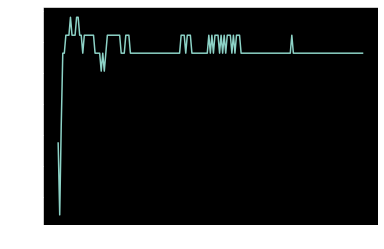

In [34]:
plt.plot(range(1,200),arr_trees_b)

In [52]:
arr_depth_b = []
for i in range(1,200):
    rnd_clf = bag_clf = BaggingClassifier(
    DecisionTreeClassifier(random_state=42, max_depth = i), 
    random_state=42)
    rnd_clf.fit(X_train, y_train)
    y_pred = rnd_clf.predict(X_test)
    arr_depth_b.append(accuracy_score(y_test, y_pred))

In [36]:
df_acc_trees_b = pd.DataFrame(arr_trees_b,columns=['acc_score'])
df_acc_trees_b.sort_values(by=['acc_score'],ascending=False).head().index+1

Int64Index([9, 13, 14, 39, 86], dtype='int64')

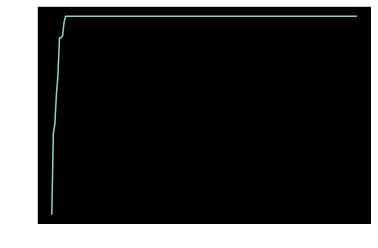

In [37]:
plt.plot(range(1,200),arr_depth_b)

In [38]:
df_acc_depth_b = pd.DataFrame(arr_depth_b,columns=['acc_score'])
df_acc_depth_b.sort_values(by=['acc_score'],ascending=False).head().index+1

Int64Index([100, 126, 128, 129, 130], dtype='int64')

In [39]:
param_grid = {
            'bootstrap': [True, False],
             'bootstrap_features': [True, False],  
             'base_estimator__max_depth' : [100, 126, 128, 129, 130],
             'max_features' : [0.6, 0.8, 1.0],
             'max_samples' : [0.05, 0.1, 0.2, 0.5],
             'n_estimators': [9, 13, 14, 39, 86]
            }  
grid = GridSearchCV(BaggingClassifier(
    DecisionTreeClassifier(random_state=42)), param_grid, refit = True, verbose = 3) 
grid.fit(X_train, y_train) 

Fitting 5 folds for each of 1200 candidates, totalling 6000 fits
[CV] base_estimator__max_depth=100, bootstrap=True, bootstrap_features=True, max_features=0.6, max_samples=0.05, n_estimators=9 
[CV]  base_estimator__max_depth=100, bootstrap=True, bootstrap_features=True, max_features=0.6, max_samples=0.05, n_estimators=9, score=0.776, total=   0.0s
[CV] base_estimator__max_depth=100, bootstrap=True, bootstrap_features=True, max_features=0.6, max_samples=0.05, n_estimators=9 
[CV]  base_estimator__max_depth=100, bootstrap=True, bootstrap_features=True, max_features=0.6, max_samples=0.05, n_estimators=9, score=0.740, total=   0.0s
[CV] base_estimator__max_depth=100, bootstrap=True, bootstrap_features=True, max_features=0.6, max_samples=0.05, n_estimators=9 
[CV]  base_estimator__max_depth=100, bootstrap=True, bootstrap_features=True, max_features=0.6, max_samples=0.05, n_estimators=9, score=0.750, total=   0.0s
[CV] base_estimator__max_depth=100, bootstrap=True, bootstrap_features=True, 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV]  base_estimator__max_depth=100, bootstrap=True, bootstrap_features=True, max_features=0.6, max_samples=0.05, n_estimators=14, score=0.707, total=   0.0s
[CV] base_estimator__max_depth=100, bootstrap=True, bootstrap_features=True, max_features=0.6, max_samples=0.05, n_estimators=14 
[CV]  base_estimator__max_depth=100, bootstrap=True, bootstrap_features=True, max_features=0.6, max_samples=0.05, n_estimators=14, score=0.732, total=   0.0s
[CV] base_estimator__max_depth=100, bootstrap=True, bootstrap_features=True, max_features=0.6, max_samples=0.05, n_estimators=14 
[CV]  base_estimator__max_depth=100, bootstrap=True, bootstrap_features=True, max_features=0.6, max_samples=0.05, n_estimators=14, score=0.739, total=   0.0s
[CV] base_estimator__max_depth=100, bootstrap=True, bootstrap_features=True, max_features=0.6, max_samples=0.05, n_estimators=39 
[CV]  base_estimator__max_depth=100, bootstrap=True, bootstrap_features=True, max_features=0.6, max_samples=0.05, n_estimators=39, score

[CV]  base_estimator__max_depth=100, bootstrap=True, bootstrap_features=True, max_features=0.6, max_samples=0.1, n_estimators=39, score=0.710, total=   0.0s
[CV] base_estimator__max_depth=100, bootstrap=True, bootstrap_features=True, max_features=0.6, max_samples=0.1, n_estimators=39 
[CV]  base_estimator__max_depth=100, bootstrap=True, bootstrap_features=True, max_features=0.6, max_samples=0.1, n_estimators=39, score=0.714, total=   0.0s
[CV] base_estimator__max_depth=100, bootstrap=True, bootstrap_features=True, max_features=0.6, max_samples=0.1, n_estimators=86 
[CV]  base_estimator__max_depth=100, bootstrap=True, bootstrap_features=True, max_features=0.6, max_samples=0.1, n_estimators=86, score=0.704, total=   0.1s
[CV] base_estimator__max_depth=100, bootstrap=True, bootstrap_features=True, max_features=0.6, max_samples=0.1, n_estimators=86 
[CV]  base_estimator__max_depth=100, bootstrap=True, bootstrap_features=True, max_features=0.6, max_samples=0.1, n_estimators=86, score=0.722,

[CV]  base_estimator__max_depth=100, bootstrap=True, bootstrap_features=True, max_features=0.6, max_samples=0.2, n_estimators=86, score=0.710, total=   0.1s
[CV] base_estimator__max_depth=100, bootstrap=True, bootstrap_features=True, max_features=0.6, max_samples=0.2, n_estimators=86 
[CV]  base_estimator__max_depth=100, bootstrap=True, bootstrap_features=True, max_features=0.6, max_samples=0.2, n_estimators=86, score=0.707, total=   0.1s
[CV] base_estimator__max_depth=100, bootstrap=True, bootstrap_features=True, max_features=0.6, max_samples=0.5, n_estimators=9 
[CV]  base_estimator__max_depth=100, bootstrap=True, bootstrap_features=True, max_features=0.6, max_samples=0.5, n_estimators=9, score=0.704, total=   0.0s
[CV] base_estimator__max_depth=100, bootstrap=True, bootstrap_features=True, max_features=0.6, max_samples=0.5, n_estimators=9 
[CV]  base_estimator__max_depth=100, bootstrap=True, bootstrap_features=True, max_features=0.6, max_samples=0.5, n_estimators=9, score=0.711, tot

[CV]  base_estimator__max_depth=100, bootstrap=True, bootstrap_features=True, max_features=0.8, max_samples=0.05, n_estimators=14, score=0.736, total=   0.0s
[CV] base_estimator__max_depth=100, bootstrap=True, bootstrap_features=True, max_features=0.8, max_samples=0.05, n_estimators=14 
[CV]  base_estimator__max_depth=100, bootstrap=True, bootstrap_features=True, max_features=0.8, max_samples=0.05, n_estimators=14, score=0.779, total=   0.0s
[CV] base_estimator__max_depth=100, bootstrap=True, bootstrap_features=True, max_features=0.8, max_samples=0.05, n_estimators=14 
[CV]  base_estimator__max_depth=100, bootstrap=True, bootstrap_features=True, max_features=0.8, max_samples=0.05, n_estimators=14, score=0.786, total=   0.0s
[CV] base_estimator__max_depth=100, bootstrap=True, bootstrap_features=True, max_features=0.8, max_samples=0.05, n_estimators=14 
[CV]  base_estimator__max_depth=100, bootstrap=True, bootstrap_features=True, max_features=0.8, max_samples=0.05, n_estimators=14, score

[CV]  base_estimator__max_depth=100, bootstrap=True, bootstrap_features=True, max_features=0.8, max_samples=0.1, n_estimators=39, score=0.790, total=   0.0s
[CV] base_estimator__max_depth=100, bootstrap=True, bootstrap_features=True, max_features=0.8, max_samples=0.1, n_estimators=39 
[CV]  base_estimator__max_depth=100, bootstrap=True, bootstrap_features=True, max_features=0.8, max_samples=0.1, n_estimators=39, score=0.775, total=   0.0s
[CV] base_estimator__max_depth=100, bootstrap=True, bootstrap_features=True, max_features=0.8, max_samples=0.1, n_estimators=39 
[CV]  base_estimator__max_depth=100, bootstrap=True, bootstrap_features=True, max_features=0.8, max_samples=0.1, n_estimators=39, score=0.819, total=   0.0s
[CV] base_estimator__max_depth=100, bootstrap=True, bootstrap_features=True, max_features=0.8, max_samples=0.1, n_estimators=86 
[CV]  base_estimator__max_depth=100, bootstrap=True, bootstrap_features=True, max_features=0.8, max_samples=0.1, n_estimators=86, score=0.747,

[CV]  base_estimator__max_depth=100, bootstrap=True, bootstrap_features=True, max_features=0.8, max_samples=0.2, n_estimators=86, score=0.736, total=   0.1s
[CV] base_estimator__max_depth=100, bootstrap=True, bootstrap_features=True, max_features=0.8, max_samples=0.2, n_estimators=86 
[CV]  base_estimator__max_depth=100, bootstrap=True, bootstrap_features=True, max_features=0.8, max_samples=0.2, n_estimators=86, score=0.743, total=   0.1s
[CV] base_estimator__max_depth=100, bootstrap=True, bootstrap_features=True, max_features=0.8, max_samples=0.2, n_estimators=86 
[CV]  base_estimator__max_depth=100, bootstrap=True, bootstrap_features=True, max_features=0.8, max_samples=0.2, n_estimators=86, score=0.739, total=   0.1s
[CV] base_estimator__max_depth=100, bootstrap=True, bootstrap_features=True, max_features=0.8, max_samples=0.5, n_estimators=9 
[CV]  base_estimator__max_depth=100, bootstrap=True, bootstrap_features=True, max_features=0.8, max_samples=0.5, n_estimators=9, score=0.823, t

[CV]  base_estimator__max_depth=100, bootstrap=True, bootstrap_features=True, max_features=1.0, max_samples=0.05, n_estimators=14, score=0.830, total=   0.0s
[CV] base_estimator__max_depth=100, bootstrap=True, bootstrap_features=True, max_features=1.0, max_samples=0.05, n_estimators=14 
[CV]  base_estimator__max_depth=100, bootstrap=True, bootstrap_features=True, max_features=1.0, max_samples=0.05, n_estimators=14, score=0.873, total=   0.0s
[CV] base_estimator__max_depth=100, bootstrap=True, bootstrap_features=True, max_features=1.0, max_samples=0.05, n_estimators=14 
[CV]  base_estimator__max_depth=100, bootstrap=True, bootstrap_features=True, max_features=1.0, max_samples=0.05, n_estimators=14, score=0.808, total=   0.0s
[CV] base_estimator__max_depth=100, bootstrap=True, bootstrap_features=True, max_features=1.0, max_samples=0.05, n_estimators=39 
[CV]  base_estimator__max_depth=100, bootstrap=True, bootstrap_features=True, max_features=1.0, max_samples=0.05, n_estimators=39, score

[CV]  base_estimator__max_depth=100, bootstrap=True, bootstrap_features=True, max_features=1.0, max_samples=0.1, n_estimators=39, score=0.884, total=   0.0s
[CV] base_estimator__max_depth=100, bootstrap=True, bootstrap_features=True, max_features=1.0, max_samples=0.1, n_estimators=39 
[CV]  base_estimator__max_depth=100, bootstrap=True, bootstrap_features=True, max_features=1.0, max_samples=0.1, n_estimators=39, score=0.801, total=   0.0s
[CV] base_estimator__max_depth=100, bootstrap=True, bootstrap_features=True, max_features=1.0, max_samples=0.1, n_estimators=39 
[CV]  base_estimator__max_depth=100, bootstrap=True, bootstrap_features=True, max_features=1.0, max_samples=0.1, n_estimators=39, score=0.866, total=   0.0s
[CV] base_estimator__max_depth=100, bootstrap=True, bootstrap_features=True, max_features=1.0, max_samples=0.1, n_estimators=39 
[CV]  base_estimator__max_depth=100, bootstrap=True, bootstrap_features=True, max_features=1.0, max_samples=0.1, n_estimators=39, score=0.819,

[CV]  base_estimator__max_depth=100, bootstrap=True, bootstrap_features=True, max_features=1.0, max_samples=0.2, n_estimators=86, score=0.866, total=   0.1s
[CV] base_estimator__max_depth=100, bootstrap=True, bootstrap_features=True, max_features=1.0, max_samples=0.2, n_estimators=86 
[CV]  base_estimator__max_depth=100, bootstrap=True, bootstrap_features=True, max_features=1.0, max_samples=0.2, n_estimators=86, score=0.891, total=   0.1s
[CV] base_estimator__max_depth=100, bootstrap=True, bootstrap_features=True, max_features=1.0, max_samples=0.2, n_estimators=86 
[CV]  base_estimator__max_depth=100, bootstrap=True, bootstrap_features=True, max_features=1.0, max_samples=0.2, n_estimators=86, score=0.855, total=   0.1s
[CV] base_estimator__max_depth=100, bootstrap=True, bootstrap_features=True, max_features=1.0, max_samples=0.2, n_estimators=86 
[CV]  base_estimator__max_depth=100, bootstrap=True, bootstrap_features=True, max_features=1.0, max_samples=0.2, n_estimators=86, score=0.873,

[CV] base_estimator__max_depth=100, bootstrap=True, bootstrap_features=False, max_features=0.6, max_samples=0.05, n_estimators=14 
[CV]  base_estimator__max_depth=100, bootstrap=True, bootstrap_features=False, max_features=0.6, max_samples=0.05, n_estimators=14, score=0.746, total=   0.0s
[CV] base_estimator__max_depth=100, bootstrap=True, bootstrap_features=False, max_features=0.6, max_samples=0.05, n_estimators=14 
[CV]  base_estimator__max_depth=100, bootstrap=True, bootstrap_features=False, max_features=0.6, max_samples=0.05, n_estimators=14, score=0.743, total=   0.0s
[CV] base_estimator__max_depth=100, bootstrap=True, bootstrap_features=False, max_features=0.6, max_samples=0.05, n_estimators=14 
[CV]  base_estimator__max_depth=100, bootstrap=True, bootstrap_features=False, max_features=0.6, max_samples=0.05, n_estimators=14, score=0.732, total=   0.0s
[CV] base_estimator__max_depth=100, bootstrap=True, bootstrap_features=False, max_features=0.6, max_samples=0.05, n_estimators=39 

[CV]  base_estimator__max_depth=100, bootstrap=True, bootstrap_features=False, max_features=0.6, max_samples=0.1, n_estimators=39, score=0.740, total=   0.0s
[CV] base_estimator__max_depth=100, bootstrap=True, bootstrap_features=False, max_features=0.6, max_samples=0.1, n_estimators=39 
[CV]  base_estimator__max_depth=100, bootstrap=True, bootstrap_features=False, max_features=0.6, max_samples=0.1, n_estimators=39, score=0.717, total=   0.0s
[CV] base_estimator__max_depth=100, bootstrap=True, bootstrap_features=False, max_features=0.6, max_samples=0.1, n_estimators=39 
[CV]  base_estimator__max_depth=100, bootstrap=True, bootstrap_features=False, max_features=0.6, max_samples=0.1, n_estimators=39, score=0.750, total=   0.0s
[CV] base_estimator__max_depth=100, bootstrap=True, bootstrap_features=False, max_features=0.6, max_samples=0.1, n_estimators=39 
[CV]  base_estimator__max_depth=100, bootstrap=True, bootstrap_features=False, max_features=0.6, max_samples=0.1, n_estimators=39, score

[CV]  base_estimator__max_depth=100, bootstrap=True, bootstrap_features=False, max_features=0.6, max_samples=0.2, n_estimators=86, score=0.729, total=   0.1s
[CV] base_estimator__max_depth=100, bootstrap=True, bootstrap_features=False, max_features=0.6, max_samples=0.2, n_estimators=86 
[CV]  base_estimator__max_depth=100, bootstrap=True, bootstrap_features=False, max_features=0.6, max_samples=0.2, n_estimators=86, score=0.715, total=   0.1s
[CV] base_estimator__max_depth=100, bootstrap=True, bootstrap_features=False, max_features=0.6, max_samples=0.2, n_estimators=86 
[CV]  base_estimator__max_depth=100, bootstrap=True, bootstrap_features=False, max_features=0.6, max_samples=0.2, n_estimators=86, score=0.728, total=   0.1s
[CV] base_estimator__max_depth=100, bootstrap=True, bootstrap_features=False, max_features=0.6, max_samples=0.2, n_estimators=86 
[CV]  base_estimator__max_depth=100, bootstrap=True, bootstrap_features=False, max_features=0.6, max_samples=0.2, n_estimators=86, score

[CV]  base_estimator__max_depth=100, bootstrap=True, bootstrap_features=False, max_features=0.8, max_samples=0.05, n_estimators=9, score=0.812, total=   0.0s
[CV] base_estimator__max_depth=100, bootstrap=True, bootstrap_features=False, max_features=0.8, max_samples=0.05, n_estimators=9 
[CV]  base_estimator__max_depth=100, bootstrap=True, bootstrap_features=False, max_features=0.8, max_samples=0.05, n_estimators=9, score=0.805, total=   0.0s
[CV] base_estimator__max_depth=100, bootstrap=True, bootstrap_features=False, max_features=0.8, max_samples=0.05, n_estimators=9 
[CV]  base_estimator__max_depth=100, bootstrap=True, bootstrap_features=False, max_features=0.8, max_samples=0.05, n_estimators=9, score=0.779, total=   0.0s
[CV] base_estimator__max_depth=100, bootstrap=True, bootstrap_features=False, max_features=0.8, max_samples=0.05, n_estimators=9 
[CV]  base_estimator__max_depth=100, bootstrap=True, bootstrap_features=False, max_features=0.8, max_samples=0.05, n_estimators=9, score

[CV]  base_estimator__max_depth=100, bootstrap=True, bootstrap_features=False, max_features=0.8, max_samples=0.1, n_estimators=13, score=0.827, total=   0.0s
[CV] base_estimator__max_depth=100, bootstrap=True, bootstrap_features=False, max_features=0.8, max_samples=0.1, n_estimators=13 
[CV]  base_estimator__max_depth=100, bootstrap=True, bootstrap_features=False, max_features=0.8, max_samples=0.1, n_estimators=13, score=0.826, total=   0.0s
[CV] base_estimator__max_depth=100, bootstrap=True, bootstrap_features=False, max_features=0.8, max_samples=0.1, n_estimators=13 
[CV]  base_estimator__max_depth=100, bootstrap=True, bootstrap_features=False, max_features=0.8, max_samples=0.1, n_estimators=13, score=0.779, total=   0.0s
[CV] base_estimator__max_depth=100, bootstrap=True, bootstrap_features=False, max_features=0.8, max_samples=0.1, n_estimators=13 
[CV]  base_estimator__max_depth=100, bootstrap=True, bootstrap_features=False, max_features=0.8, max_samples=0.1, n_estimators=13, score

[CV]  base_estimator__max_depth=100, bootstrap=True, bootstrap_features=False, max_features=0.8, max_samples=0.2, n_estimators=39, score=0.874, total=   0.0s
[CV] base_estimator__max_depth=100, bootstrap=True, bootstrap_features=False, max_features=0.8, max_samples=0.2, n_estimators=39 
[CV]  base_estimator__max_depth=100, bootstrap=True, bootstrap_features=False, max_features=0.8, max_samples=0.2, n_estimators=39, score=0.866, total=   0.0s
[CV] base_estimator__max_depth=100, bootstrap=True, bootstrap_features=False, max_features=0.8, max_samples=0.2, n_estimators=39 
[CV]  base_estimator__max_depth=100, bootstrap=True, bootstrap_features=False, max_features=0.8, max_samples=0.2, n_estimators=39, score=0.779, total=   0.0s
[CV] base_estimator__max_depth=100, bootstrap=True, bootstrap_features=False, max_features=0.8, max_samples=0.2, n_estimators=39 
[CV]  base_estimator__max_depth=100, bootstrap=True, bootstrap_features=False, max_features=0.8, max_samples=0.2, n_estimators=39, score

[CV]  base_estimator__max_depth=100, bootstrap=True, bootstrap_features=False, max_features=0.8, max_samples=0.5, n_estimators=39, score=0.844, total=   0.1s
[CV] base_estimator__max_depth=100, bootstrap=True, bootstrap_features=False, max_features=0.8, max_samples=0.5, n_estimators=86 
[CV]  base_estimator__max_depth=100, bootstrap=True, bootstrap_features=False, max_features=0.8, max_samples=0.5, n_estimators=86, score=0.866, total=   0.1s
[CV] base_estimator__max_depth=100, bootstrap=True, bootstrap_features=False, max_features=0.8, max_samples=0.5, n_estimators=86 
[CV]  base_estimator__max_depth=100, bootstrap=True, bootstrap_features=False, max_features=0.8, max_samples=0.5, n_estimators=86, score=0.838, total=   0.1s
[CV] base_estimator__max_depth=100, bootstrap=True, bootstrap_features=False, max_features=0.8, max_samples=0.5, n_estimators=86 
[CV]  base_estimator__max_depth=100, bootstrap=True, bootstrap_features=False, max_features=0.8, max_samples=0.5, n_estimators=86, score

[CV]  base_estimator__max_depth=100, bootstrap=True, bootstrap_features=False, max_features=1.0, max_samples=0.05, n_estimators=86, score=0.909, total=   0.1s
[CV] base_estimator__max_depth=100, bootstrap=True, bootstrap_features=False, max_features=1.0, max_samples=0.1, n_estimators=9 
[CV]  base_estimator__max_depth=100, bootstrap=True, bootstrap_features=False, max_features=1.0, max_samples=0.1, n_estimators=9, score=0.913, total=   0.0s
[CV] base_estimator__max_depth=100, bootstrap=True, bootstrap_features=False, max_features=1.0, max_samples=0.1, n_estimators=9 
[CV]  base_estimator__max_depth=100, bootstrap=True, bootstrap_features=False, max_features=1.0, max_samples=0.1, n_estimators=9, score=0.921, total=   0.0s
[CV] base_estimator__max_depth=100, bootstrap=True, bootstrap_features=False, max_features=1.0, max_samples=0.1, n_estimators=9 
[CV]  base_estimator__max_depth=100, bootstrap=True, bootstrap_features=False, max_features=1.0, max_samples=0.1, n_estimators=9, score=0.92

[CV]  base_estimator__max_depth=100, bootstrap=True, bootstrap_features=False, max_features=1.0, max_samples=0.2, n_estimators=13, score=0.957, total=   0.0s
[CV] base_estimator__max_depth=100, bootstrap=True, bootstrap_features=False, max_features=1.0, max_samples=0.2, n_estimators=13 
[CV]  base_estimator__max_depth=100, bootstrap=True, bootstrap_features=False, max_features=1.0, max_samples=0.2, n_estimators=13, score=0.946, total=   0.0s
[CV] base_estimator__max_depth=100, bootstrap=True, bootstrap_features=False, max_features=1.0, max_samples=0.2, n_estimators=13 
[CV]  base_estimator__max_depth=100, bootstrap=True, bootstrap_features=False, max_features=1.0, max_samples=0.2, n_estimators=13, score=0.935, total=   0.0s
[CV] base_estimator__max_depth=100, bootstrap=True, bootstrap_features=False, max_features=1.0, max_samples=0.2, n_estimators=13 
[CV]  base_estimator__max_depth=100, bootstrap=True, bootstrap_features=False, max_features=1.0, max_samples=0.2, n_estimators=13, score

[CV]  base_estimator__max_depth=100, bootstrap=True, bootstrap_features=False, max_features=1.0, max_samples=0.5, n_estimators=39, score=0.960, total=   0.1s
[CV] base_estimator__max_depth=100, bootstrap=True, bootstrap_features=False, max_features=1.0, max_samples=0.5, n_estimators=39 
[CV]  base_estimator__max_depth=100, bootstrap=True, bootstrap_features=False, max_features=1.0, max_samples=0.5, n_estimators=39, score=0.993, total=   0.1s
[CV] base_estimator__max_depth=100, bootstrap=True, bootstrap_features=False, max_features=1.0, max_samples=0.5, n_estimators=39 
[CV]  base_estimator__max_depth=100, bootstrap=True, bootstrap_features=False, max_features=1.0, max_samples=0.5, n_estimators=39, score=0.975, total=   0.1s
[CV] base_estimator__max_depth=100, bootstrap=True, bootstrap_features=False, max_features=1.0, max_samples=0.5, n_estimators=39 
[CV]  base_estimator__max_depth=100, bootstrap=True, bootstrap_features=False, max_features=1.0, max_samples=0.5, n_estimators=39, score

[CV]  base_estimator__max_depth=100, bootstrap=False, bootstrap_features=True, max_features=0.6, max_samples=0.05, n_estimators=86, score=0.704, total=   0.1s
[CV] base_estimator__max_depth=100, bootstrap=False, bootstrap_features=True, max_features=0.6, max_samples=0.05, n_estimators=86 
[CV]  base_estimator__max_depth=100, bootstrap=False, bootstrap_features=True, max_features=0.6, max_samples=0.05, n_estimators=86, score=0.707, total=   0.1s
[CV] base_estimator__max_depth=100, bootstrap=False, bootstrap_features=True, max_features=0.6, max_samples=0.05, n_estimators=86 
[CV]  base_estimator__max_depth=100, bootstrap=False, bootstrap_features=True, max_features=0.6, max_samples=0.05, n_estimators=86, score=0.732, total=   0.1s
[CV] base_estimator__max_depth=100, bootstrap=False, bootstrap_features=True, max_features=0.6, max_samples=0.05, n_estimators=86 
[CV]  base_estimator__max_depth=100, bootstrap=False, bootstrap_features=True, max_features=0.6, max_samples=0.05, n_estimators=86

[CV]  base_estimator__max_depth=100, bootstrap=False, bootstrap_features=True, max_features=0.6, max_samples=0.2, n_estimators=14, score=0.704, total=   0.0s
[CV] base_estimator__max_depth=100, bootstrap=False, bootstrap_features=True, max_features=0.6, max_samples=0.2, n_estimators=14 
[CV]  base_estimator__max_depth=100, bootstrap=False, bootstrap_features=True, max_features=0.6, max_samples=0.2, n_estimators=14, score=0.707, total=   0.0s
[CV] base_estimator__max_depth=100, bootstrap=False, bootstrap_features=True, max_features=0.6, max_samples=0.2, n_estimators=14 
[CV]  base_estimator__max_depth=100, bootstrap=False, bootstrap_features=True, max_features=0.6, max_samples=0.2, n_estimators=14, score=0.707, total=   0.0s
[CV] base_estimator__max_depth=100, bootstrap=False, bootstrap_features=True, max_features=0.6, max_samples=0.2, n_estimators=14 
[CV]  base_estimator__max_depth=100, bootstrap=False, bootstrap_features=True, max_features=0.6, max_samples=0.2, n_estimators=14, score

[CV]  base_estimator__max_depth=100, bootstrap=False, bootstrap_features=True, max_features=0.6, max_samples=0.5, n_estimators=39, score=0.704, total=   0.0s
[CV] base_estimator__max_depth=100, bootstrap=False, bootstrap_features=True, max_features=0.6, max_samples=0.5, n_estimators=39 
[CV]  base_estimator__max_depth=100, bootstrap=False, bootstrap_features=True, max_features=0.6, max_samples=0.5, n_estimators=39, score=0.704, total=   0.0s
[CV] base_estimator__max_depth=100, bootstrap=False, bootstrap_features=True, max_features=0.6, max_samples=0.5, n_estimators=39 
[CV]  base_estimator__max_depth=100, bootstrap=False, bootstrap_features=True, max_features=0.6, max_samples=0.5, n_estimators=39, score=0.707, total=   0.0s
[CV] base_estimator__max_depth=100, bootstrap=False, bootstrap_features=True, max_features=0.6, max_samples=0.5, n_estimators=39 
[CV]  base_estimator__max_depth=100, bootstrap=False, bootstrap_features=True, max_features=0.6, max_samples=0.5, n_estimators=39, score

[CV]  base_estimator__max_depth=100, bootstrap=False, bootstrap_features=True, max_features=0.8, max_samples=0.05, n_estimators=86, score=0.762, total=   0.1s
[CV] base_estimator__max_depth=100, bootstrap=False, bootstrap_features=True, max_features=0.8, max_samples=0.05, n_estimators=86 
[CV]  base_estimator__max_depth=100, bootstrap=False, bootstrap_features=True, max_features=0.8, max_samples=0.05, n_estimators=86, score=0.744, total=   0.1s
[CV] base_estimator__max_depth=100, bootstrap=False, bootstrap_features=True, max_features=0.8, max_samples=0.05, n_estimators=86 
[CV]  base_estimator__max_depth=100, bootstrap=False, bootstrap_features=True, max_features=0.8, max_samples=0.05, n_estimators=86, score=0.779, total=   0.1s
[CV] base_estimator__max_depth=100, bootstrap=False, bootstrap_features=True, max_features=0.8, max_samples=0.05, n_estimators=86 
[CV]  base_estimator__max_depth=100, bootstrap=False, bootstrap_features=True, max_features=0.8, max_samples=0.05, n_estimators=86

[CV]  base_estimator__max_depth=100, bootstrap=False, bootstrap_features=True, max_features=0.8, max_samples=0.2, n_estimators=13, score=0.736, total=   0.0s
[CV] base_estimator__max_depth=100, bootstrap=False, bootstrap_features=True, max_features=0.8, max_samples=0.2, n_estimators=13 
[CV]  base_estimator__max_depth=100, bootstrap=False, bootstrap_features=True, max_features=0.8, max_samples=0.2, n_estimators=13, score=0.772, total=   0.0s
[CV] base_estimator__max_depth=100, bootstrap=False, bootstrap_features=True, max_features=0.8, max_samples=0.2, n_estimators=13 
[CV]  base_estimator__max_depth=100, bootstrap=False, bootstrap_features=True, max_features=0.8, max_samples=0.2, n_estimators=13, score=0.812, total=   0.0s
[CV] base_estimator__max_depth=100, bootstrap=False, bootstrap_features=True, max_features=0.8, max_samples=0.2, n_estimators=13 
[CV]  base_estimator__max_depth=100, bootstrap=False, bootstrap_features=True, max_features=0.8, max_samples=0.2, n_estimators=13, score

[CV]  base_estimator__max_depth=100, bootstrap=False, bootstrap_features=True, max_features=0.8, max_samples=0.5, n_estimators=39, score=0.809, total=   0.1s
[CV] base_estimator__max_depth=100, bootstrap=False, bootstrap_features=True, max_features=0.8, max_samples=0.5, n_estimators=39 
[CV]  base_estimator__max_depth=100, bootstrap=False, bootstrap_features=True, max_features=0.8, max_samples=0.5, n_estimators=39, score=0.816, total=   0.1s
[CV] base_estimator__max_depth=100, bootstrap=False, bootstrap_features=True, max_features=0.8, max_samples=0.5, n_estimators=39 
[CV]  base_estimator__max_depth=100, bootstrap=False, bootstrap_features=True, max_features=0.8, max_samples=0.5, n_estimators=39, score=0.721, total=   0.1s
[CV] base_estimator__max_depth=100, bootstrap=False, bootstrap_features=True, max_features=0.8, max_samples=0.5, n_estimators=39 
[CV]  base_estimator__max_depth=100, bootstrap=False, bootstrap_features=True, max_features=0.8, max_samples=0.5, n_estimators=39, score

[CV]  base_estimator__max_depth=100, bootstrap=False, bootstrap_features=True, max_features=1.0, max_samples=0.05, n_estimators=86, score=0.787, total=   0.1s
[CV] base_estimator__max_depth=100, bootstrap=False, bootstrap_features=True, max_features=1.0, max_samples=0.05, n_estimators=86 
[CV]  base_estimator__max_depth=100, bootstrap=False, bootstrap_features=True, max_features=1.0, max_samples=0.05, n_estimators=86, score=0.815, total=   0.1s
[CV] base_estimator__max_depth=100, bootstrap=False, bootstrap_features=True, max_features=1.0, max_samples=0.05, n_estimators=86 
[CV]  base_estimator__max_depth=100, bootstrap=False, bootstrap_features=True, max_features=1.0, max_samples=0.05, n_estimators=86, score=0.855, total=   0.1s
[CV] base_estimator__max_depth=100, bootstrap=False, bootstrap_features=True, max_features=1.0, max_samples=0.05, n_estimators=86 
[CV]  base_estimator__max_depth=100, bootstrap=False, bootstrap_features=True, max_features=1.0, max_samples=0.05, n_estimators=86

[CV]  base_estimator__max_depth=100, bootstrap=False, bootstrap_features=True, max_features=1.0, max_samples=0.2, n_estimators=9, score=0.837, total=   0.0s
[CV] base_estimator__max_depth=100, bootstrap=False, bootstrap_features=True, max_features=1.0, max_samples=0.2, n_estimators=13 
[CV]  base_estimator__max_depth=100, bootstrap=False, bootstrap_features=True, max_features=1.0, max_samples=0.2, n_estimators=13, score=0.852, total=   0.0s
[CV] base_estimator__max_depth=100, bootstrap=False, bootstrap_features=True, max_features=1.0, max_samples=0.2, n_estimators=13 
[CV]  base_estimator__max_depth=100, bootstrap=False, bootstrap_features=True, max_features=1.0, max_samples=0.2, n_estimators=13, score=0.856, total=   0.0s
[CV] base_estimator__max_depth=100, bootstrap=False, bootstrap_features=True, max_features=1.0, max_samples=0.2, n_estimators=13 
[CV]  base_estimator__max_depth=100, bootstrap=False, bootstrap_features=True, max_features=1.0, max_samples=0.2, n_estimators=13, score=

[CV]  base_estimator__max_depth=100, bootstrap=False, bootstrap_features=True, max_features=1.0, max_samples=0.5, n_estimators=14, score=0.855, total=   0.0s
[CV] base_estimator__max_depth=100, bootstrap=False, bootstrap_features=True, max_features=1.0, max_samples=0.5, n_estimators=39 
[CV]  base_estimator__max_depth=100, bootstrap=False, bootstrap_features=True, max_features=1.0, max_samples=0.5, n_estimators=39, score=0.866, total=   0.1s
[CV] base_estimator__max_depth=100, bootstrap=False, bootstrap_features=True, max_features=1.0, max_samples=0.5, n_estimators=39 
[CV]  base_estimator__max_depth=100, bootstrap=False, bootstrap_features=True, max_features=1.0, max_samples=0.5, n_estimators=39, score=0.884, total=   0.1s
[CV] base_estimator__max_depth=100, bootstrap=False, bootstrap_features=True, max_features=1.0, max_samples=0.5, n_estimators=39 
[CV]  base_estimator__max_depth=100, bootstrap=False, bootstrap_features=True, max_features=1.0, max_samples=0.5, n_estimators=39, score

[CV]  base_estimator__max_depth=100, bootstrap=False, bootstrap_features=False, max_features=0.6, max_samples=0.05, n_estimators=86, score=0.773, total=   0.1s
[CV] base_estimator__max_depth=100, bootstrap=False, bootstrap_features=False, max_features=0.6, max_samples=0.05, n_estimators=86 
[CV]  base_estimator__max_depth=100, bootstrap=False, bootstrap_features=False, max_features=0.6, max_samples=0.05, n_estimators=86, score=0.718, total=   0.1s
[CV] base_estimator__max_depth=100, bootstrap=False, bootstrap_features=False, max_features=0.6, max_samples=0.05, n_estimators=86 
[CV]  base_estimator__max_depth=100, bootstrap=False, bootstrap_features=False, max_features=0.6, max_samples=0.05, n_estimators=86, score=0.725, total=   0.1s
[CV] base_estimator__max_depth=100, bootstrap=False, bootstrap_features=False, max_features=0.6, max_samples=0.05, n_estimators=86 
[CV]  base_estimator__max_depth=100, bootstrap=False, bootstrap_features=False, max_features=0.6, max_samples=0.05, n_estima

[CV]  base_estimator__max_depth=100, bootstrap=False, bootstrap_features=False, max_features=0.6, max_samples=0.1, n_estimators=86, score=0.732, total=   0.1s
[CV] base_estimator__max_depth=100, bootstrap=False, bootstrap_features=False, max_features=0.6, max_samples=0.2, n_estimators=9 
[CV]  base_estimator__max_depth=100, bootstrap=False, bootstrap_features=False, max_features=0.6, max_samples=0.2, n_estimators=9, score=0.773, total=   0.0s
[CV] base_estimator__max_depth=100, bootstrap=False, bootstrap_features=False, max_features=0.6, max_samples=0.2, n_estimators=9 
[CV]  base_estimator__max_depth=100, bootstrap=False, bootstrap_features=False, max_features=0.6, max_samples=0.2, n_estimators=9, score=0.744, total=   0.0s
[CV] base_estimator__max_depth=100, bootstrap=False, bootstrap_features=False, max_features=0.6, max_samples=0.2, n_estimators=9 
[CV]  base_estimator__max_depth=100, bootstrap=False, bootstrap_features=False, max_features=0.6, max_samples=0.2, n_estimators=9, scor

[CV]  base_estimator__max_depth=100, bootstrap=False, bootstrap_features=False, max_features=0.6, max_samples=0.5, n_estimators=14, score=0.733, total=   0.0s
[CV] base_estimator__max_depth=100, bootstrap=False, bootstrap_features=False, max_features=0.6, max_samples=0.5, n_estimators=14 
[CV]  base_estimator__max_depth=100, bootstrap=False, bootstrap_features=False, max_features=0.6, max_samples=0.5, n_estimators=14, score=0.736, total=   0.0s
[CV] base_estimator__max_depth=100, bootstrap=False, bootstrap_features=False, max_features=0.6, max_samples=0.5, n_estimators=14 
[CV]  base_estimator__max_depth=100, bootstrap=False, bootstrap_features=False, max_features=0.6, max_samples=0.5, n_estimators=14, score=0.732, total=   0.0s
[CV] base_estimator__max_depth=100, bootstrap=False, bootstrap_features=False, max_features=0.6, max_samples=0.5, n_estimators=14 
[CV]  base_estimator__max_depth=100, bootstrap=False, bootstrap_features=False, max_features=0.6, max_samples=0.5, n_estimators=14

[CV]  base_estimator__max_depth=100, bootstrap=False, bootstrap_features=False, max_features=0.8, max_samples=0.05, n_estimators=39, score=0.822, total=   0.0s
[CV] base_estimator__max_depth=100, bootstrap=False, bootstrap_features=False, max_features=0.8, max_samples=0.05, n_estimators=39 
[CV]  base_estimator__max_depth=100, bootstrap=False, bootstrap_features=False, max_features=0.8, max_samples=0.05, n_estimators=39, score=0.859, total=   0.0s
[CV] base_estimator__max_depth=100, bootstrap=False, bootstrap_features=False, max_features=0.8, max_samples=0.05, n_estimators=39 
[CV]  base_estimator__max_depth=100, bootstrap=False, bootstrap_features=False, max_features=0.8, max_samples=0.05, n_estimators=39, score=0.815, total=   0.0s
[CV] base_estimator__max_depth=100, bootstrap=False, bootstrap_features=False, max_features=0.8, max_samples=0.05, n_estimators=86 
[CV]  base_estimator__max_depth=100, bootstrap=False, bootstrap_features=False, max_features=0.8, max_samples=0.05, n_estima

[CV] base_estimator__max_depth=100, bootstrap=False, bootstrap_features=False, max_features=0.8, max_samples=0.1, n_estimators=86 
[CV]  base_estimator__max_depth=100, bootstrap=False, bootstrap_features=False, max_features=0.8, max_samples=0.1, n_estimators=86, score=0.899, total=   0.1s
[CV] base_estimator__max_depth=100, bootstrap=False, bootstrap_features=False, max_features=0.8, max_samples=0.1, n_estimators=86 
[CV]  base_estimator__max_depth=100, bootstrap=False, bootstrap_features=False, max_features=0.8, max_samples=0.1, n_estimators=86, score=0.848, total=   0.1s
[CV] base_estimator__max_depth=100, bootstrap=False, bootstrap_features=False, max_features=0.8, max_samples=0.2, n_estimators=9 
[CV]  base_estimator__max_depth=100, bootstrap=False, bootstrap_features=False, max_features=0.8, max_samples=0.2, n_estimators=9, score=0.765, total=   0.0s
[CV] base_estimator__max_depth=100, bootstrap=False, bootstrap_features=False, max_features=0.8, max_samples=0.2, n_estimators=9 
[C

[CV]  base_estimator__max_depth=100, bootstrap=False, bootstrap_features=False, max_features=0.8, max_samples=0.5, n_estimators=13, score=0.801, total=   0.0s
[CV] base_estimator__max_depth=100, bootstrap=False, bootstrap_features=False, max_features=0.8, max_samples=0.5, n_estimators=13 
[CV]  base_estimator__max_depth=100, bootstrap=False, bootstrap_features=False, max_features=0.8, max_samples=0.5, n_estimators=13, score=0.794, total=   0.0s
[CV] base_estimator__max_depth=100, bootstrap=False, bootstrap_features=False, max_features=0.8, max_samples=0.5, n_estimators=13 
[CV]  base_estimator__max_depth=100, bootstrap=False, bootstrap_features=False, max_features=0.8, max_samples=0.5, n_estimators=13, score=0.786, total=   0.0s
[CV] base_estimator__max_depth=100, bootstrap=False, bootstrap_features=False, max_features=0.8, max_samples=0.5, n_estimators=13 
[CV]  base_estimator__max_depth=100, bootstrap=False, bootstrap_features=False, max_features=0.8, max_samples=0.5, n_estimators=13

[CV]  base_estimator__max_depth=100, bootstrap=False, bootstrap_features=False, max_features=1.0, max_samples=0.05, n_estimators=39, score=0.906, total=   0.0s
[CV] base_estimator__max_depth=100, bootstrap=False, bootstrap_features=False, max_features=1.0, max_samples=0.05, n_estimators=39 
[CV]  base_estimator__max_depth=100, bootstrap=False, bootstrap_features=False, max_features=1.0, max_samples=0.05, n_estimators=39, score=0.924, total=   0.0s
[CV] base_estimator__max_depth=100, bootstrap=False, bootstrap_features=False, max_features=1.0, max_samples=0.05, n_estimators=39 
[CV]  base_estimator__max_depth=100, bootstrap=False, bootstrap_features=False, max_features=1.0, max_samples=0.05, n_estimators=39, score=0.924, total=   0.0s
[CV] base_estimator__max_depth=100, bootstrap=False, bootstrap_features=False, max_features=1.0, max_samples=0.05, n_estimators=39 
[CV]  base_estimator__max_depth=100, bootstrap=False, bootstrap_features=False, max_features=1.0, max_samples=0.05, n_estima

[CV]  base_estimator__max_depth=100, bootstrap=False, bootstrap_features=False, max_features=1.0, max_samples=0.1, n_estimators=86, score=0.946, total=   0.1s
[CV] base_estimator__max_depth=100, bootstrap=False, bootstrap_features=False, max_features=1.0, max_samples=0.1, n_estimators=86 
[CV]  base_estimator__max_depth=100, bootstrap=False, bootstrap_features=False, max_features=1.0, max_samples=0.1, n_estimators=86, score=0.939, total=   0.1s
[CV] base_estimator__max_depth=100, bootstrap=False, bootstrap_features=False, max_features=1.0, max_samples=0.1, n_estimators=86 
[CV]  base_estimator__max_depth=100, bootstrap=False, bootstrap_features=False, max_features=1.0, max_samples=0.1, n_estimators=86, score=0.964, total=   0.1s
[CV] base_estimator__max_depth=100, bootstrap=False, bootstrap_features=False, max_features=1.0, max_samples=0.1, n_estimators=86 
[CV]  base_estimator__max_depth=100, bootstrap=False, bootstrap_features=False, max_features=1.0, max_samples=0.1, n_estimators=86

[CV]  base_estimator__max_depth=100, bootstrap=False, bootstrap_features=False, max_features=1.0, max_samples=0.2, n_estimators=86, score=0.967, total=   0.1s
[CV] base_estimator__max_depth=100, bootstrap=False, bootstrap_features=False, max_features=1.0, max_samples=0.5, n_estimators=9 
[CV]  base_estimator__max_depth=100, bootstrap=False, bootstrap_features=False, max_features=1.0, max_samples=0.5, n_estimators=9, score=0.960, total=   0.0s
[CV] base_estimator__max_depth=100, bootstrap=False, bootstrap_features=False, max_features=1.0, max_samples=0.5, n_estimators=9 
[CV]  base_estimator__max_depth=100, bootstrap=False, bootstrap_features=False, max_features=1.0, max_samples=0.5, n_estimators=9, score=0.978, total=   0.0s
[CV] base_estimator__max_depth=100, bootstrap=False, bootstrap_features=False, max_features=1.0, max_samples=0.5, n_estimators=9 
[CV]  base_estimator__max_depth=100, bootstrap=False, bootstrap_features=False, max_features=1.0, max_samples=0.5, n_estimators=9, scor

[CV]  base_estimator__max_depth=126, bootstrap=True, bootstrap_features=True, max_features=0.6, max_samples=0.05, n_estimators=14, score=0.725, total=   0.0s
[CV] base_estimator__max_depth=126, bootstrap=True, bootstrap_features=True, max_features=0.6, max_samples=0.05, n_estimators=14 
[CV]  base_estimator__max_depth=126, bootstrap=True, bootstrap_features=True, max_features=0.6, max_samples=0.05, n_estimators=14, score=0.717, total=   0.0s
[CV] base_estimator__max_depth=126, bootstrap=True, bootstrap_features=True, max_features=0.6, max_samples=0.05, n_estimators=14 
[CV]  base_estimator__max_depth=126, bootstrap=True, bootstrap_features=True, max_features=0.6, max_samples=0.05, n_estimators=14, score=0.728, total=   0.0s
[CV] base_estimator__max_depth=126, bootstrap=True, bootstrap_features=True, max_features=0.6, max_samples=0.05, n_estimators=39 
[CV]  base_estimator__max_depth=126, bootstrap=True, bootstrap_features=True, max_features=0.6, max_samples=0.05, n_estimators=39, score

[CV]  base_estimator__max_depth=126, bootstrap=True, bootstrap_features=True, max_features=0.6, max_samples=0.1, n_estimators=39, score=0.710, total=   0.0s
[CV] base_estimator__max_depth=126, bootstrap=True, bootstrap_features=True, max_features=0.6, max_samples=0.1, n_estimators=39 
[CV]  base_estimator__max_depth=126, bootstrap=True, bootstrap_features=True, max_features=0.6, max_samples=0.1, n_estimators=39, score=0.707, total=   0.0s
[CV] base_estimator__max_depth=126, bootstrap=True, bootstrap_features=True, max_features=0.6, max_samples=0.1, n_estimators=39 
[CV]  base_estimator__max_depth=126, bootstrap=True, bootstrap_features=True, max_features=0.6, max_samples=0.1, n_estimators=39, score=0.732, total=   0.0s
[CV] base_estimator__max_depth=126, bootstrap=True, bootstrap_features=True, max_features=0.6, max_samples=0.1, n_estimators=86 
[CV]  base_estimator__max_depth=126, bootstrap=True, bootstrap_features=True, max_features=0.6, max_samples=0.1, n_estimators=86, score=0.708,

[CV]  base_estimator__max_depth=126, bootstrap=True, bootstrap_features=True, max_features=0.6, max_samples=0.2, n_estimators=86, score=0.704, total=   0.1s
[CV] base_estimator__max_depth=126, bootstrap=True, bootstrap_features=True, max_features=0.6, max_samples=0.2, n_estimators=86 
[CV]  base_estimator__max_depth=126, bootstrap=True, bootstrap_features=True, max_features=0.6, max_samples=0.2, n_estimators=86, score=0.707, total=   0.1s
[CV] base_estimator__max_depth=126, bootstrap=True, bootstrap_features=True, max_features=0.6, max_samples=0.2, n_estimators=86 
[CV]  base_estimator__max_depth=126, bootstrap=True, bootstrap_features=True, max_features=0.6, max_samples=0.2, n_estimators=86, score=0.710, total=   0.1s
[CV] base_estimator__max_depth=126, bootstrap=True, bootstrap_features=True, max_features=0.6, max_samples=0.2, n_estimators=86 
[CV]  base_estimator__max_depth=126, bootstrap=True, bootstrap_features=True, max_features=0.6, max_samples=0.2, n_estimators=86, score=0.707,

[CV]  base_estimator__max_depth=126, bootstrap=True, bootstrap_features=True, max_features=0.8, max_samples=0.05, n_estimators=14, score=0.744, total=   0.0s
[CV] base_estimator__max_depth=126, bootstrap=True, bootstrap_features=True, max_features=0.8, max_samples=0.05, n_estimators=14 
[CV]  base_estimator__max_depth=126, bootstrap=True, bootstrap_features=True, max_features=0.8, max_samples=0.05, n_estimators=14, score=0.793, total=   0.0s
[CV] base_estimator__max_depth=126, bootstrap=True, bootstrap_features=True, max_features=0.8, max_samples=0.05, n_estimators=14 
[CV]  base_estimator__max_depth=126, bootstrap=True, bootstrap_features=True, max_features=0.8, max_samples=0.05, n_estimators=14, score=0.790, total=   0.0s
[CV] base_estimator__max_depth=126, bootstrap=True, bootstrap_features=True, max_features=0.8, max_samples=0.05, n_estimators=14 
[CV]  base_estimator__max_depth=126, bootstrap=True, bootstrap_features=True, max_features=0.8, max_samples=0.05, n_estimators=14, score

[CV]  base_estimator__max_depth=126, bootstrap=True, bootstrap_features=True, max_features=0.8, max_samples=0.1, n_estimators=39, score=0.747, total=   0.0s
[CV] base_estimator__max_depth=126, bootstrap=True, bootstrap_features=True, max_features=0.8, max_samples=0.1, n_estimators=39 
[CV]  base_estimator__max_depth=126, bootstrap=True, bootstrap_features=True, max_features=0.8, max_samples=0.1, n_estimators=39, score=0.744, total=   0.0s
[CV] base_estimator__max_depth=126, bootstrap=True, bootstrap_features=True, max_features=0.8, max_samples=0.1, n_estimators=39 
[CV]  base_estimator__max_depth=126, bootstrap=True, bootstrap_features=True, max_features=0.8, max_samples=0.1, n_estimators=39, score=0.732, total=   0.0s
[CV] base_estimator__max_depth=126, bootstrap=True, bootstrap_features=True, max_features=0.8, max_samples=0.1, n_estimators=39 
[CV]  base_estimator__max_depth=126, bootstrap=True, bootstrap_features=True, max_features=0.8, max_samples=0.1, n_estimators=39, score=0.750,

[CV]  base_estimator__max_depth=126, bootstrap=True, bootstrap_features=True, max_features=0.8, max_samples=0.2, n_estimators=86, score=0.747, total=   0.1s
[CV] base_estimator__max_depth=126, bootstrap=True, bootstrap_features=True, max_features=0.8, max_samples=0.2, n_estimators=86 
[CV]  base_estimator__max_depth=126, bootstrap=True, bootstrap_features=True, max_features=0.8, max_samples=0.2, n_estimators=86, score=0.721, total=   0.1s
[CV] base_estimator__max_depth=126, bootstrap=True, bootstrap_features=True, max_features=0.8, max_samples=0.2, n_estimators=86 
[CV]  base_estimator__max_depth=126, bootstrap=True, bootstrap_features=True, max_features=0.8, max_samples=0.2, n_estimators=86, score=0.746, total=   0.1s
[CV] base_estimator__max_depth=126, bootstrap=True, bootstrap_features=True, max_features=0.8, max_samples=0.2, n_estimators=86 
[CV]  base_estimator__max_depth=126, bootstrap=True, bootstrap_features=True, max_features=0.8, max_samples=0.2, n_estimators=86, score=0.750,

[CV]  base_estimator__max_depth=126, bootstrap=True, bootstrap_features=True, max_features=1.0, max_samples=0.05, n_estimators=13, score=0.798, total=   0.0s
[CV] base_estimator__max_depth=126, bootstrap=True, bootstrap_features=True, max_features=1.0, max_samples=0.05, n_estimators=13 
[CV]  base_estimator__max_depth=126, bootstrap=True, bootstrap_features=True, max_features=1.0, max_samples=0.05, n_estimators=13, score=0.786, total=   0.0s
[CV] base_estimator__max_depth=126, bootstrap=True, bootstrap_features=True, max_features=1.0, max_samples=0.05, n_estimators=13 
[CV]  base_estimator__max_depth=126, bootstrap=True, bootstrap_features=True, max_features=1.0, max_samples=0.05, n_estimators=13, score=0.866, total=   0.0s
[CV] base_estimator__max_depth=126, bootstrap=True, bootstrap_features=True, max_features=1.0, max_samples=0.05, n_estimators=13 
[CV]  base_estimator__max_depth=126, bootstrap=True, bootstrap_features=True, max_features=1.0, max_samples=0.05, n_estimators=13, score

[CV]  base_estimator__max_depth=126, bootstrap=True, bootstrap_features=True, max_features=1.0, max_samples=0.1, n_estimators=14, score=0.822, total=   0.0s
[CV] base_estimator__max_depth=126, bootstrap=True, bootstrap_features=True, max_features=1.0, max_samples=0.1, n_estimators=14 
[CV]  base_estimator__max_depth=126, bootstrap=True, bootstrap_features=True, max_features=1.0, max_samples=0.1, n_estimators=14, score=0.873, total=   0.0s
[CV] base_estimator__max_depth=126, bootstrap=True, bootstrap_features=True, max_features=1.0, max_samples=0.1, n_estimators=14 
[CV]  base_estimator__max_depth=126, bootstrap=True, bootstrap_features=True, max_features=1.0, max_samples=0.1, n_estimators=14, score=0.804, total=   0.0s
[CV] base_estimator__max_depth=126, bootstrap=True, bootstrap_features=True, max_features=1.0, max_samples=0.1, n_estimators=39 
[CV]  base_estimator__max_depth=126, bootstrap=True, bootstrap_features=True, max_features=1.0, max_samples=0.1, n_estimators=39, score=0.838,

[CV]  base_estimator__max_depth=126, bootstrap=True, bootstrap_features=True, max_features=1.0, max_samples=0.2, n_estimators=39, score=0.866, total=   0.0s
[CV] base_estimator__max_depth=126, bootstrap=True, bootstrap_features=True, max_features=1.0, max_samples=0.2, n_estimators=86 
[CV]  base_estimator__max_depth=126, bootstrap=True, bootstrap_features=True, max_features=1.0, max_samples=0.2, n_estimators=86, score=0.903, total=   0.1s
[CV] base_estimator__max_depth=126, bootstrap=True, bootstrap_features=True, max_features=1.0, max_samples=0.2, n_estimators=86 
[CV]  base_estimator__max_depth=126, bootstrap=True, bootstrap_features=True, max_features=1.0, max_samples=0.2, n_estimators=86, score=0.863, total=   0.1s
[CV] base_estimator__max_depth=126, bootstrap=True, bootstrap_features=True, max_features=1.0, max_samples=0.2, n_estimators=86 
[CV]  base_estimator__max_depth=126, bootstrap=True, bootstrap_features=True, max_features=1.0, max_samples=0.2, n_estimators=86, score=0.822,

[CV]  base_estimator__max_depth=126, bootstrap=True, bootstrap_features=True, max_features=1.0, max_samples=0.5, n_estimators=86, score=0.859, total=   0.1s
[CV] base_estimator__max_depth=126, bootstrap=True, bootstrap_features=False, max_features=0.6, max_samples=0.05, n_estimators=9 
[CV]  base_estimator__max_depth=126, bootstrap=True, bootstrap_features=False, max_features=0.6, max_samples=0.05, n_estimators=9, score=0.751, total=   0.0s
[CV] base_estimator__max_depth=126, bootstrap=True, bootstrap_features=False, max_features=0.6, max_samples=0.05, n_estimators=9 
[CV]  base_estimator__max_depth=126, bootstrap=True, bootstrap_features=False, max_features=0.6, max_samples=0.05, n_estimators=9, score=0.758, total=   0.0s
[CV] base_estimator__max_depth=126, bootstrap=True, bootstrap_features=False, max_features=0.6, max_samples=0.05, n_estimators=9 
[CV]  base_estimator__max_depth=126, bootstrap=True, bootstrap_features=False, max_features=0.6, max_samples=0.05, n_estimators=9, score=

[CV]  base_estimator__max_depth=126, bootstrap=True, bootstrap_features=False, max_features=0.6, max_samples=0.1, n_estimators=14, score=0.761, total=   0.0s
[CV] base_estimator__max_depth=126, bootstrap=True, bootstrap_features=False, max_features=0.6, max_samples=0.1, n_estimators=14 
[CV]  base_estimator__max_depth=126, bootstrap=True, bootstrap_features=False, max_features=0.6, max_samples=0.1, n_estimators=14, score=0.768, total=   0.0s
[CV] base_estimator__max_depth=126, bootstrap=True, bootstrap_features=False, max_features=0.6, max_samples=0.1, n_estimators=14 
[CV]  base_estimator__max_depth=126, bootstrap=True, bootstrap_features=False, max_features=0.6, max_samples=0.1, n_estimators=14, score=0.804, total=   0.0s
[CV] base_estimator__max_depth=126, bootstrap=True, bootstrap_features=False, max_features=0.6, max_samples=0.1, n_estimators=39 
[CV]  base_estimator__max_depth=126, bootstrap=True, bootstrap_features=False, max_features=0.6, max_samples=0.1, n_estimators=39, score

[CV]  base_estimator__max_depth=126, bootstrap=True, bootstrap_features=False, max_features=0.6, max_samples=0.2, n_estimators=39, score=0.750, total=   0.1s
[CV] base_estimator__max_depth=126, bootstrap=True, bootstrap_features=False, max_features=0.6, max_samples=0.2, n_estimators=39 
[CV]  base_estimator__max_depth=126, bootstrap=True, bootstrap_features=False, max_features=0.6, max_samples=0.2, n_estimators=39, score=0.746, total=   0.0s
[CV] base_estimator__max_depth=126, bootstrap=True, bootstrap_features=False, max_features=0.6, max_samples=0.2, n_estimators=86 
[CV]  base_estimator__max_depth=126, bootstrap=True, bootstrap_features=False, max_features=0.6, max_samples=0.2, n_estimators=86, score=0.711, total=   0.1s
[CV] base_estimator__max_depth=126, bootstrap=True, bootstrap_features=False, max_features=0.6, max_samples=0.2, n_estimators=86 
[CV]  base_estimator__max_depth=126, bootstrap=True, bootstrap_features=False, max_features=0.6, max_samples=0.2, n_estimators=86, score

[CV]  base_estimator__max_depth=126, bootstrap=True, bootstrap_features=False, max_features=0.6, max_samples=0.5, n_estimators=86, score=0.714, total=   0.1s
[CV] base_estimator__max_depth=126, bootstrap=True, bootstrap_features=False, max_features=0.6, max_samples=0.5, n_estimators=86 
[CV]  base_estimator__max_depth=126, bootstrap=True, bootstrap_features=False, max_features=0.6, max_samples=0.5, n_estimators=86, score=0.743, total=   0.1s
[CV] base_estimator__max_depth=126, bootstrap=True, bootstrap_features=False, max_features=0.6, max_samples=0.5, n_estimators=86 
[CV]  base_estimator__max_depth=126, bootstrap=True, bootstrap_features=False, max_features=0.6, max_samples=0.5, n_estimators=86, score=0.743, total=   0.1s
[CV] base_estimator__max_depth=126, bootstrap=True, bootstrap_features=False, max_features=0.8, max_samples=0.05, n_estimators=9 
[CV]  base_estimator__max_depth=126, bootstrap=True, bootstrap_features=False, max_features=0.8, max_samples=0.05, n_estimators=9, score

[CV]  base_estimator__max_depth=126, bootstrap=True, bootstrap_features=False, max_features=0.8, max_samples=0.1, n_estimators=14, score=0.793, total=   0.0s
[CV] base_estimator__max_depth=126, bootstrap=True, bootstrap_features=False, max_features=0.8, max_samples=0.1, n_estimators=14 
[CV]  base_estimator__max_depth=126, bootstrap=True, bootstrap_features=False, max_features=0.8, max_samples=0.1, n_estimators=14, score=0.822, total=   0.0s
[CV] base_estimator__max_depth=126, bootstrap=True, bootstrap_features=False, max_features=0.8, max_samples=0.1, n_estimators=14 
[CV]  base_estimator__max_depth=126, bootstrap=True, bootstrap_features=False, max_features=0.8, max_samples=0.1, n_estimators=14, score=0.848, total=   0.0s
[CV] base_estimator__max_depth=126, bootstrap=True, bootstrap_features=False, max_features=0.8, max_samples=0.1, n_estimators=39 
[CV]  base_estimator__max_depth=126, bootstrap=True, bootstrap_features=False, max_features=0.8, max_samples=0.1, n_estimators=39, score

[CV]  base_estimator__max_depth=126, bootstrap=True, bootstrap_features=False, max_features=0.8, max_samples=0.2, n_estimators=39, score=0.819, total=   0.0s
[CV] base_estimator__max_depth=126, bootstrap=True, bootstrap_features=False, max_features=0.8, max_samples=0.2, n_estimators=39 
[CV]  base_estimator__max_depth=126, bootstrap=True, bootstrap_features=False, max_features=0.8, max_samples=0.2, n_estimators=39, score=0.826, total=   0.0s
[CV] base_estimator__max_depth=126, bootstrap=True, bootstrap_features=False, max_features=0.8, max_samples=0.2, n_estimators=39 
[CV]  base_estimator__max_depth=126, bootstrap=True, bootstrap_features=False, max_features=0.8, max_samples=0.2, n_estimators=39, score=0.841, total=   0.1s
[CV] base_estimator__max_depth=126, bootstrap=True, bootstrap_features=False, max_features=0.8, max_samples=0.2, n_estimators=86 
[CV]  base_estimator__max_depth=126, bootstrap=True, bootstrap_features=False, max_features=0.8, max_samples=0.2, n_estimators=86, score

[CV]  base_estimator__max_depth=126, bootstrap=True, bootstrap_features=False, max_features=0.8, max_samples=0.5, n_estimators=86, score=0.866, total=   0.1s
[CV] base_estimator__max_depth=126, bootstrap=True, bootstrap_features=False, max_features=0.8, max_samples=0.5, n_estimators=86 
[CV]  base_estimator__max_depth=126, bootstrap=True, bootstrap_features=False, max_features=0.8, max_samples=0.5, n_estimators=86, score=0.833, total=   0.1s
[CV] base_estimator__max_depth=126, bootstrap=True, bootstrap_features=False, max_features=1.0, max_samples=0.05, n_estimators=9 
[CV]  base_estimator__max_depth=126, bootstrap=True, bootstrap_features=False, max_features=1.0, max_samples=0.05, n_estimators=9, score=0.892, total=   0.0s
[CV] base_estimator__max_depth=126, bootstrap=True, bootstrap_features=False, max_features=1.0, max_samples=0.05, n_estimators=9 
[CV]  base_estimator__max_depth=126, bootstrap=True, bootstrap_features=False, max_features=1.0, max_samples=0.05, n_estimators=9, score

[CV]  base_estimator__max_depth=126, bootstrap=True, bootstrap_features=False, max_features=1.0, max_samples=0.1, n_estimators=13, score=0.928, total=   0.0s
[CV] base_estimator__max_depth=126, bootstrap=True, bootstrap_features=False, max_features=1.0, max_samples=0.1, n_estimators=13 
[CV]  base_estimator__max_depth=126, bootstrap=True, bootstrap_features=False, max_features=1.0, max_samples=0.1, n_estimators=13, score=0.913, total=   0.0s
[CV] base_estimator__max_depth=126, bootstrap=True, bootstrap_features=False, max_features=1.0, max_samples=0.1, n_estimators=13 
[CV]  base_estimator__max_depth=126, bootstrap=True, bootstrap_features=False, max_features=1.0, max_samples=0.1, n_estimators=13, score=0.924, total=   0.0s
[CV] base_estimator__max_depth=126, bootstrap=True, bootstrap_features=False, max_features=1.0, max_samples=0.1, n_estimators=13 
[CV]  base_estimator__max_depth=126, bootstrap=True, bootstrap_features=False, max_features=1.0, max_samples=0.1, n_estimators=13, score

[CV]  base_estimator__max_depth=126, bootstrap=True, bootstrap_features=False, max_features=1.0, max_samples=0.2, n_estimators=14, score=0.960, total=   0.0s
[CV] base_estimator__max_depth=126, bootstrap=True, bootstrap_features=False, max_features=1.0, max_samples=0.2, n_estimators=14 
[CV]  base_estimator__max_depth=126, bootstrap=True, bootstrap_features=False, max_features=1.0, max_samples=0.2, n_estimators=14, score=0.967, total=   0.0s
[CV] base_estimator__max_depth=126, bootstrap=True, bootstrap_features=False, max_features=1.0, max_samples=0.2, n_estimators=14 
[CV]  base_estimator__max_depth=126, bootstrap=True, bootstrap_features=False, max_features=1.0, max_samples=0.2, n_estimators=14, score=0.957, total=   0.0s
[CV] base_estimator__max_depth=126, bootstrap=True, bootstrap_features=False, max_features=1.0, max_samples=0.2, n_estimators=14 
[CV]  base_estimator__max_depth=126, bootstrap=True, bootstrap_features=False, max_features=1.0, max_samples=0.2, n_estimators=14, score

[CV]  base_estimator__max_depth=126, bootstrap=True, bootstrap_features=False, max_features=1.0, max_samples=0.5, n_estimators=39, score=0.978, total=   0.1s
[CV] base_estimator__max_depth=126, bootstrap=True, bootstrap_features=False, max_features=1.0, max_samples=0.5, n_estimators=39 
[CV]  base_estimator__max_depth=126, bootstrap=True, bootstrap_features=False, max_features=1.0, max_samples=0.5, n_estimators=39, score=0.971, total=   0.1s
[CV] base_estimator__max_depth=126, bootstrap=True, bootstrap_features=False, max_features=1.0, max_samples=0.5, n_estimators=39 
[CV]  base_estimator__max_depth=126, bootstrap=True, bootstrap_features=False, max_features=1.0, max_samples=0.5, n_estimators=39, score=0.967, total=   0.1s
[CV] base_estimator__max_depth=126, bootstrap=True, bootstrap_features=False, max_features=1.0, max_samples=0.5, n_estimators=86 
[CV]  base_estimator__max_depth=126, bootstrap=True, bootstrap_features=False, max_features=1.0, max_samples=0.5, n_estimators=86, score

[CV]  base_estimator__max_depth=126, bootstrap=False, bootstrap_features=True, max_features=0.6, max_samples=0.05, n_estimators=86, score=0.708, total=   0.1s
[CV] base_estimator__max_depth=126, bootstrap=False, bootstrap_features=True, max_features=0.6, max_samples=0.05, n_estimators=86 
[CV]  base_estimator__max_depth=126, bootstrap=False, bootstrap_features=True, max_features=0.6, max_samples=0.05, n_estimators=86, score=0.710, total=   0.1s
[CV] base_estimator__max_depth=126, bootstrap=False, bootstrap_features=True, max_features=0.6, max_samples=0.05, n_estimators=86 
[CV]  base_estimator__max_depth=126, bootstrap=False, bootstrap_features=True, max_features=0.6, max_samples=0.05, n_estimators=86, score=0.717, total=   0.1s
[CV] base_estimator__max_depth=126, bootstrap=False, bootstrap_features=True, max_features=0.6, max_samples=0.05, n_estimators=86 
[CV]  base_estimator__max_depth=126, bootstrap=False, bootstrap_features=True, max_features=0.6, max_samples=0.05, n_estimators=86

[CV]  base_estimator__max_depth=126, bootstrap=False, bootstrap_features=True, max_features=0.6, max_samples=0.2, n_estimators=13, score=0.747, total=   0.0s
[CV] base_estimator__max_depth=126, bootstrap=False, bootstrap_features=True, max_features=0.6, max_samples=0.2, n_estimators=13 
[CV]  base_estimator__max_depth=126, bootstrap=False, bootstrap_features=True, max_features=0.6, max_samples=0.2, n_estimators=13, score=0.707, total=   0.0s
[CV] base_estimator__max_depth=126, bootstrap=False, bootstrap_features=True, max_features=0.6, max_samples=0.2, n_estimators=13 
[CV]  base_estimator__max_depth=126, bootstrap=False, bootstrap_features=True, max_features=0.6, max_samples=0.2, n_estimators=13, score=0.710, total=   0.0s
[CV] base_estimator__max_depth=126, bootstrap=False, bootstrap_features=True, max_features=0.6, max_samples=0.2, n_estimators=13 
[CV]  base_estimator__max_depth=126, bootstrap=False, bootstrap_features=True, max_features=0.6, max_samples=0.2, n_estimators=13, score

[CV]  base_estimator__max_depth=126, bootstrap=False, bootstrap_features=True, max_features=0.6, max_samples=0.5, n_estimators=39, score=0.704, total=   0.0s
[CV] base_estimator__max_depth=126, bootstrap=False, bootstrap_features=True, max_features=0.6, max_samples=0.5, n_estimators=39 
[CV]  base_estimator__max_depth=126, bootstrap=False, bootstrap_features=True, max_features=0.6, max_samples=0.5, n_estimators=39, score=0.704, total=   0.0s
[CV] base_estimator__max_depth=126, bootstrap=False, bootstrap_features=True, max_features=0.6, max_samples=0.5, n_estimators=39 
[CV]  base_estimator__max_depth=126, bootstrap=False, bootstrap_features=True, max_features=0.6, max_samples=0.5, n_estimators=39, score=0.707, total=   0.0s
[CV] base_estimator__max_depth=126, bootstrap=False, bootstrap_features=True, max_features=0.6, max_samples=0.5, n_estimators=39 
[CV]  base_estimator__max_depth=126, bootstrap=False, bootstrap_features=True, max_features=0.6, max_samples=0.5, n_estimators=39, score

[CV]  base_estimator__max_depth=126, bootstrap=False, bootstrap_features=True, max_features=0.8, max_samples=0.05, n_estimators=86, score=0.722, total=   0.1s
[CV] base_estimator__max_depth=126, bootstrap=False, bootstrap_features=True, max_features=0.8, max_samples=0.05, n_estimators=86 
[CV]  base_estimator__max_depth=126, bootstrap=False, bootstrap_features=True, max_features=0.8, max_samples=0.05, n_estimators=86, score=0.736, total=   0.1s
[CV] base_estimator__max_depth=126, bootstrap=False, bootstrap_features=True, max_features=0.8, max_samples=0.05, n_estimators=86 
[CV]  base_estimator__max_depth=126, bootstrap=False, bootstrap_features=True, max_features=0.8, max_samples=0.05, n_estimators=86, score=0.764, total=   0.1s
[CV] base_estimator__max_depth=126, bootstrap=False, bootstrap_features=True, max_features=0.8, max_samples=0.05, n_estimators=86 
[CV]  base_estimator__max_depth=126, bootstrap=False, bootstrap_features=True, max_features=0.8, max_samples=0.05, n_estimators=86

[CV]  base_estimator__max_depth=126, bootstrap=False, bootstrap_features=True, max_features=0.8, max_samples=0.1, n_estimators=86, score=0.732, total=   0.1s
[CV] base_estimator__max_depth=126, bootstrap=False, bootstrap_features=True, max_features=0.8, max_samples=0.2, n_estimators=9 
[CV]  base_estimator__max_depth=126, bootstrap=False, bootstrap_features=True, max_features=0.8, max_samples=0.2, n_estimators=9, score=0.722, total=   0.0s
[CV] base_estimator__max_depth=126, bootstrap=False, bootstrap_features=True, max_features=0.8, max_samples=0.2, n_estimators=9 
[CV]  base_estimator__max_depth=126, bootstrap=False, bootstrap_features=True, max_features=0.8, max_samples=0.2, n_estimators=9, score=0.794, total=   0.0s
[CV] base_estimator__max_depth=126, bootstrap=False, bootstrap_features=True, max_features=0.8, max_samples=0.2, n_estimators=9 
[CV]  base_estimator__max_depth=126, bootstrap=False, bootstrap_features=True, max_features=0.8, max_samples=0.2, n_estimators=9, score=0.739

[CV]  base_estimator__max_depth=126, bootstrap=False, bootstrap_features=True, max_features=0.8, max_samples=0.5, n_estimators=13, score=0.736, total=   0.0s
[CV] base_estimator__max_depth=126, bootstrap=False, bootstrap_features=True, max_features=0.8, max_samples=0.5, n_estimators=13 
[CV]  base_estimator__max_depth=126, bootstrap=False, bootstrap_features=True, max_features=0.8, max_samples=0.5, n_estimators=13, score=0.726, total=   0.0s
[CV] base_estimator__max_depth=126, bootstrap=False, bootstrap_features=True, max_features=0.8, max_samples=0.5, n_estimators=13 
[CV]  base_estimator__max_depth=126, bootstrap=False, bootstrap_features=True, max_features=0.8, max_samples=0.5, n_estimators=13, score=0.725, total=   0.0s
[CV] base_estimator__max_depth=126, bootstrap=False, bootstrap_features=True, max_features=0.8, max_samples=0.5, n_estimators=13 
[CV]  base_estimator__max_depth=126, bootstrap=False, bootstrap_features=True, max_features=0.8, max_samples=0.5, n_estimators=13, score

[CV]  base_estimator__max_depth=126, bootstrap=False, bootstrap_features=True, max_features=1.0, max_samples=0.05, n_estimators=39, score=0.852, total=   0.0s
[CV] base_estimator__max_depth=126, bootstrap=False, bootstrap_features=True, max_features=1.0, max_samples=0.05, n_estimators=39 
[CV]  base_estimator__max_depth=126, bootstrap=False, bootstrap_features=True, max_features=1.0, max_samples=0.05, n_estimators=39, score=0.874, total=   0.0s
[CV] base_estimator__max_depth=126, bootstrap=False, bootstrap_features=True, max_features=1.0, max_samples=0.05, n_estimators=39 
[CV]  base_estimator__max_depth=126, bootstrap=False, bootstrap_features=True, max_features=1.0, max_samples=0.05, n_estimators=39, score=0.815, total=   0.0s
[CV] base_estimator__max_depth=126, bootstrap=False, bootstrap_features=True, max_features=1.0, max_samples=0.05, n_estimators=39 
[CV]  base_estimator__max_depth=126, bootstrap=False, bootstrap_features=True, max_features=1.0, max_samples=0.05, n_estimators=39

[CV]  base_estimator__max_depth=126, bootstrap=False, bootstrap_features=True, max_features=1.0, max_samples=0.1, n_estimators=86, score=0.881, total=   0.1s
[CV] base_estimator__max_depth=126, bootstrap=False, bootstrap_features=True, max_features=1.0, max_samples=0.1, n_estimators=86 
[CV]  base_estimator__max_depth=126, bootstrap=False, bootstrap_features=True, max_features=1.0, max_samples=0.1, n_estimators=86, score=0.838, total=   0.1s
[CV] base_estimator__max_depth=126, bootstrap=False, bootstrap_features=True, max_features=1.0, max_samples=0.1, n_estimators=86 
[CV]  base_estimator__max_depth=126, bootstrap=False, bootstrap_features=True, max_features=1.0, max_samples=0.1, n_estimators=86, score=0.884, total=   0.1s
[CV] base_estimator__max_depth=126, bootstrap=False, bootstrap_features=True, max_features=1.0, max_samples=0.1, n_estimators=86 
[CV]  base_estimator__max_depth=126, bootstrap=False, bootstrap_features=True, max_features=1.0, max_samples=0.1, n_estimators=86, score

[CV]  base_estimator__max_depth=126, bootstrap=False, bootstrap_features=True, max_features=1.0, max_samples=0.2, n_estimators=86, score=0.855, total=   0.1s
[CV] base_estimator__max_depth=126, bootstrap=False, bootstrap_features=True, max_features=1.0, max_samples=0.5, n_estimators=9 
[CV]  base_estimator__max_depth=126, bootstrap=False, bootstrap_features=True, max_features=1.0, max_samples=0.5, n_estimators=9, score=0.931, total=   0.0s
[CV] base_estimator__max_depth=126, bootstrap=False, bootstrap_features=True, max_features=1.0, max_samples=0.5, n_estimators=9 
[CV]  base_estimator__max_depth=126, bootstrap=False, bootstrap_features=True, max_features=1.0, max_samples=0.5, n_estimators=9, score=0.841, total=   0.0s
[CV] base_estimator__max_depth=126, bootstrap=False, bootstrap_features=True, max_features=1.0, max_samples=0.5, n_estimators=9 
[CV]  base_estimator__max_depth=126, bootstrap=False, bootstrap_features=True, max_features=1.0, max_samples=0.5, n_estimators=9, score=0.855

[CV]  base_estimator__max_depth=126, bootstrap=False, bootstrap_features=False, max_features=0.6, max_samples=0.05, n_estimators=14, score=0.772, total=   0.0s
[CV] base_estimator__max_depth=126, bootstrap=False, bootstrap_features=False, max_features=0.6, max_samples=0.05, n_estimators=14 
[CV]  base_estimator__max_depth=126, bootstrap=False, bootstrap_features=False, max_features=0.6, max_samples=0.05, n_estimators=14, score=0.768, total=   0.0s
[CV] base_estimator__max_depth=126, bootstrap=False, bootstrap_features=False, max_features=0.6, max_samples=0.05, n_estimators=14 
[CV]  base_estimator__max_depth=126, bootstrap=False, bootstrap_features=False, max_features=0.6, max_samples=0.05, n_estimators=14, score=0.761, total=   0.0s
[CV] base_estimator__max_depth=126, bootstrap=False, bootstrap_features=False, max_features=0.6, max_samples=0.05, n_estimators=39 
[CV]  base_estimator__max_depth=126, bootstrap=False, bootstrap_features=False, max_features=0.6, max_samples=0.05, n_estima

[CV]  base_estimator__max_depth=126, bootstrap=False, bootstrap_features=False, max_features=0.6, max_samples=0.1, n_estimators=39, score=0.726, total=   0.0s
[CV] base_estimator__max_depth=126, bootstrap=False, bootstrap_features=False, max_features=0.6, max_samples=0.1, n_estimators=39 
[CV]  base_estimator__max_depth=126, bootstrap=False, bootstrap_features=False, max_features=0.6, max_samples=0.1, n_estimators=39, score=0.772, total=   0.0s
[CV] base_estimator__max_depth=126, bootstrap=False, bootstrap_features=False, max_features=0.6, max_samples=0.1, n_estimators=39 
[CV]  base_estimator__max_depth=126, bootstrap=False, bootstrap_features=False, max_features=0.6, max_samples=0.1, n_estimators=39, score=0.732, total=   0.0s
[CV] base_estimator__max_depth=126, bootstrap=False, bootstrap_features=False, max_features=0.6, max_samples=0.1, n_estimators=39 
[CV]  base_estimator__max_depth=126, bootstrap=False, bootstrap_features=False, max_features=0.6, max_samples=0.1, n_estimators=39

[CV]  base_estimator__max_depth=126, bootstrap=False, bootstrap_features=False, max_features=0.6, max_samples=0.2, n_estimators=86, score=0.715, total=   0.1s
[CV] base_estimator__max_depth=126, bootstrap=False, bootstrap_features=False, max_features=0.6, max_samples=0.2, n_estimators=86 
[CV]  base_estimator__max_depth=126, bootstrap=False, bootstrap_features=False, max_features=0.6, max_samples=0.2, n_estimators=86, score=0.711, total=   0.1s
[CV] base_estimator__max_depth=126, bootstrap=False, bootstrap_features=False, max_features=0.6, max_samples=0.2, n_estimators=86 
[CV]  base_estimator__max_depth=126, bootstrap=False, bootstrap_features=False, max_features=0.6, max_samples=0.2, n_estimators=86, score=0.717, total=   0.1s
[CV] base_estimator__max_depth=126, bootstrap=False, bootstrap_features=False, max_features=0.6, max_samples=0.2, n_estimators=86 
[CV]  base_estimator__max_depth=126, bootstrap=False, bootstrap_features=False, max_features=0.6, max_samples=0.2, n_estimators=86

[CV]  base_estimator__max_depth=126, bootstrap=False, bootstrap_features=False, max_features=0.8, max_samples=0.05, n_estimators=13, score=0.816, total=   0.0s
[CV] base_estimator__max_depth=126, bootstrap=False, bootstrap_features=False, max_features=0.8, max_samples=0.05, n_estimators=13 
[CV]  base_estimator__max_depth=126, bootstrap=False, bootstrap_features=False, max_features=0.8, max_samples=0.05, n_estimators=13, score=0.779, total=   0.0s
[CV] base_estimator__max_depth=126, bootstrap=False, bootstrap_features=False, max_features=0.8, max_samples=0.05, n_estimators=13 
[CV]  base_estimator__max_depth=126, bootstrap=False, bootstrap_features=False, max_features=0.8, max_samples=0.05, n_estimators=13, score=0.793, total=   0.0s
[CV] base_estimator__max_depth=126, bootstrap=False, bootstrap_features=False, max_features=0.8, max_samples=0.05, n_estimators=13 
[CV]  base_estimator__max_depth=126, bootstrap=False, bootstrap_features=False, max_features=0.8, max_samples=0.05, n_estima

[CV]  base_estimator__max_depth=126, bootstrap=False, bootstrap_features=False, max_features=0.8, max_samples=0.1, n_estimators=14, score=0.830, total=   0.0s
[CV] base_estimator__max_depth=126, bootstrap=False, bootstrap_features=False, max_features=0.8, max_samples=0.1, n_estimators=14 
[CV]  base_estimator__max_depth=126, bootstrap=False, bootstrap_features=False, max_features=0.8, max_samples=0.1, n_estimators=14, score=0.779, total=   0.0s
[CV] base_estimator__max_depth=126, bootstrap=False, bootstrap_features=False, max_features=0.8, max_samples=0.1, n_estimators=14 
[CV]  base_estimator__max_depth=126, bootstrap=False, bootstrap_features=False, max_features=0.8, max_samples=0.1, n_estimators=14, score=0.855, total=   0.0s
[CV] base_estimator__max_depth=126, bootstrap=False, bootstrap_features=False, max_features=0.8, max_samples=0.1, n_estimators=39 
[CV]  base_estimator__max_depth=126, bootstrap=False, bootstrap_features=False, max_features=0.8, max_samples=0.1, n_estimators=39

[CV]  base_estimator__max_depth=126, bootstrap=False, bootstrap_features=False, max_features=0.8, max_samples=0.2, n_estimators=39, score=0.851, total=   0.0s
[CV] base_estimator__max_depth=126, bootstrap=False, bootstrap_features=False, max_features=0.8, max_samples=0.2, n_estimators=86 
[CV]  base_estimator__max_depth=126, bootstrap=False, bootstrap_features=False, max_features=0.8, max_samples=0.2, n_estimators=86, score=0.888, total=   0.1s
[CV] base_estimator__max_depth=126, bootstrap=False, bootstrap_features=False, max_features=0.8, max_samples=0.2, n_estimators=86 
[CV]  base_estimator__max_depth=126, bootstrap=False, bootstrap_features=False, max_features=0.8, max_samples=0.2, n_estimators=86, score=0.874, total=   0.1s
[CV] base_estimator__max_depth=126, bootstrap=False, bootstrap_features=False, max_features=0.8, max_samples=0.2, n_estimators=86 
[CV]  base_estimator__max_depth=126, bootstrap=False, bootstrap_features=False, max_features=0.8, max_samples=0.2, n_estimators=86

[CV]  base_estimator__max_depth=126, bootstrap=False, bootstrap_features=False, max_features=0.8, max_samples=0.5, n_estimators=86, score=0.833, total=   0.1s
[CV] base_estimator__max_depth=126, bootstrap=False, bootstrap_features=False, max_features=0.8, max_samples=0.5, n_estimators=86 
[CV]  base_estimator__max_depth=126, bootstrap=False, bootstrap_features=False, max_features=0.8, max_samples=0.5, n_estimators=86, score=0.797, total=   0.1s
[CV] base_estimator__max_depth=126, bootstrap=False, bootstrap_features=False, max_features=1.0, max_samples=0.05, n_estimators=9 
[CV]  base_estimator__max_depth=126, bootstrap=False, bootstrap_features=False, max_features=1.0, max_samples=0.05, n_estimators=9, score=0.892, total=   0.0s
[CV] base_estimator__max_depth=126, bootstrap=False, bootstrap_features=False, max_features=1.0, max_samples=0.05, n_estimators=9 
[CV]  base_estimator__max_depth=126, bootstrap=False, bootstrap_features=False, max_features=1.0, max_samples=0.05, n_estimators=9

[CV]  base_estimator__max_depth=126, bootstrap=False, bootstrap_features=False, max_features=1.0, max_samples=0.1, n_estimators=14, score=0.942, total=   0.0s
[CV] base_estimator__max_depth=126, bootstrap=False, bootstrap_features=False, max_features=1.0, max_samples=0.1, n_estimators=14 
[CV]  base_estimator__max_depth=126, bootstrap=False, bootstrap_features=False, max_features=1.0, max_samples=0.1, n_estimators=14, score=0.938, total=   0.0s
[CV] base_estimator__max_depth=126, bootstrap=False, bootstrap_features=False, max_features=1.0, max_samples=0.1, n_estimators=14 
[CV]  base_estimator__max_depth=126, bootstrap=False, bootstrap_features=False, max_features=1.0, max_samples=0.1, n_estimators=14, score=0.931, total=   0.0s
[CV] base_estimator__max_depth=126, bootstrap=False, bootstrap_features=False, max_features=1.0, max_samples=0.1, n_estimators=14 
[CV]  base_estimator__max_depth=126, bootstrap=False, bootstrap_features=False, max_features=1.0, max_samples=0.1, n_estimators=14

[CV]  base_estimator__max_depth=126, bootstrap=False, bootstrap_features=False, max_features=1.0, max_samples=0.2, n_estimators=39, score=0.942, total=   0.1s
[CV] base_estimator__max_depth=126, bootstrap=False, bootstrap_features=False, max_features=1.0, max_samples=0.2, n_estimators=39 
[CV]  base_estimator__max_depth=126, bootstrap=False, bootstrap_features=False, max_features=1.0, max_samples=0.2, n_estimators=39, score=0.978, total=   0.0s
[CV] base_estimator__max_depth=126, bootstrap=False, bootstrap_features=False, max_features=1.0, max_samples=0.2, n_estimators=39 
[CV]  base_estimator__max_depth=126, bootstrap=False, bootstrap_features=False, max_features=1.0, max_samples=0.2, n_estimators=39, score=0.978, total=   0.0s
[CV] base_estimator__max_depth=126, bootstrap=False, bootstrap_features=False, max_features=1.0, max_samples=0.2, n_estimators=39 
[CV]  base_estimator__max_depth=126, bootstrap=False, bootstrap_features=False, max_features=1.0, max_samples=0.2, n_estimators=39

[CV]  base_estimator__max_depth=126, bootstrap=False, bootstrap_features=False, max_features=1.0, max_samples=0.5, n_estimators=86, score=0.964, total=   0.1s
[CV] base_estimator__max_depth=126, bootstrap=False, bootstrap_features=False, max_features=1.0, max_samples=0.5, n_estimators=86 
[CV]  base_estimator__max_depth=126, bootstrap=False, bootstrap_features=False, max_features=1.0, max_samples=0.5, n_estimators=86, score=0.993, total=   0.1s
[CV] base_estimator__max_depth=126, bootstrap=False, bootstrap_features=False, max_features=1.0, max_samples=0.5, n_estimators=86 
[CV]  base_estimator__max_depth=126, bootstrap=False, bootstrap_features=False, max_features=1.0, max_samples=0.5, n_estimators=86, score=0.989, total=   0.1s
[CV] base_estimator__max_depth=126, bootstrap=False, bootstrap_features=False, max_features=1.0, max_samples=0.5, n_estimators=86 
[CV]  base_estimator__max_depth=126, bootstrap=False, bootstrap_features=False, max_features=1.0, max_samples=0.5, n_estimators=86

[CV]  base_estimator__max_depth=128, bootstrap=True, bootstrap_features=True, max_features=0.6, max_samples=0.05, n_estimators=86, score=0.707, total=   0.1s
[CV] base_estimator__max_depth=128, bootstrap=True, bootstrap_features=True, max_features=0.6, max_samples=0.1, n_estimators=9 
[CV]  base_estimator__max_depth=128, bootstrap=True, bootstrap_features=True, max_features=0.6, max_samples=0.1, n_estimators=9, score=0.704, total=   0.0s
[CV] base_estimator__max_depth=128, bootstrap=True, bootstrap_features=True, max_features=0.6, max_samples=0.1, n_estimators=9 
[CV]  base_estimator__max_depth=128, bootstrap=True, bootstrap_features=True, max_features=0.6, max_samples=0.1, n_estimators=9, score=0.711, total=   0.0s
[CV] base_estimator__max_depth=128, bootstrap=True, bootstrap_features=True, max_features=0.6, max_samples=0.1, n_estimators=9 
[CV]  base_estimator__max_depth=128, bootstrap=True, bootstrap_features=True, max_features=0.6, max_samples=0.1, n_estimators=9, score=0.717, tota

[CV]  base_estimator__max_depth=128, bootstrap=True, bootstrap_features=True, max_features=0.6, max_samples=0.2, n_estimators=14, score=0.733, total=   0.0s
[CV] base_estimator__max_depth=128, bootstrap=True, bootstrap_features=True, max_features=0.6, max_samples=0.2, n_estimators=14 
[CV]  base_estimator__max_depth=128, bootstrap=True, bootstrap_features=True, max_features=0.6, max_samples=0.2, n_estimators=14, score=0.728, total=   0.0s
[CV] base_estimator__max_depth=128, bootstrap=True, bootstrap_features=True, max_features=0.6, max_samples=0.2, n_estimators=14 
[CV]  base_estimator__max_depth=128, bootstrap=True, bootstrap_features=True, max_features=0.6, max_samples=0.2, n_estimators=14, score=0.707, total=   0.0s
[CV] base_estimator__max_depth=128, bootstrap=True, bootstrap_features=True, max_features=0.6, max_samples=0.2, n_estimators=14 
[CV]  base_estimator__max_depth=128, bootstrap=True, bootstrap_features=True, max_features=0.6, max_samples=0.2, n_estimators=14, score=0.732,

[CV]  base_estimator__max_depth=128, bootstrap=True, bootstrap_features=True, max_features=0.6, max_samples=0.5, n_estimators=39, score=0.721, total=   0.1s
[CV] base_estimator__max_depth=128, bootstrap=True, bootstrap_features=True, max_features=0.6, max_samples=0.5, n_estimators=39 
[CV]  base_estimator__max_depth=128, bootstrap=True, bootstrap_features=True, max_features=0.6, max_samples=0.5, n_estimators=39, score=0.710, total=   0.0s
[CV] base_estimator__max_depth=128, bootstrap=True, bootstrap_features=True, max_features=0.6, max_samples=0.5, n_estimators=86 
[CV]  base_estimator__max_depth=128, bootstrap=True, bootstrap_features=True, max_features=0.6, max_samples=0.5, n_estimators=86, score=0.704, total=   0.1s
[CV] base_estimator__max_depth=128, bootstrap=True, bootstrap_features=True, max_features=0.6, max_samples=0.5, n_estimators=86 
[CV]  base_estimator__max_depth=128, bootstrap=True, bootstrap_features=True, max_features=0.6, max_samples=0.5, n_estimators=86, score=0.711,

[CV]  base_estimator__max_depth=128, bootstrap=True, bootstrap_features=True, max_features=0.8, max_samples=0.05, n_estimators=86, score=0.783, total=   0.1s
[CV] base_estimator__max_depth=128, bootstrap=True, bootstrap_features=True, max_features=0.8, max_samples=0.05, n_estimators=86 
[CV]  base_estimator__max_depth=128, bootstrap=True, bootstrap_features=True, max_features=0.8, max_samples=0.05, n_estimators=86, score=0.764, total=   0.1s
[CV] base_estimator__max_depth=128, bootstrap=True, bootstrap_features=True, max_features=0.8, max_samples=0.1, n_estimators=9 
[CV]  base_estimator__max_depth=128, bootstrap=True, bootstrap_features=True, max_features=0.8, max_samples=0.1, n_estimators=9, score=0.776, total=   0.0s
[CV] base_estimator__max_depth=128, bootstrap=True, bootstrap_features=True, max_features=0.8, max_samples=0.1, n_estimators=9 
[CV]  base_estimator__max_depth=128, bootstrap=True, bootstrap_features=True, max_features=0.8, max_samples=0.1, n_estimators=9, score=0.751, 

[CV]  base_estimator__max_depth=128, bootstrap=True, bootstrap_features=True, max_features=0.8, max_samples=0.2, n_estimators=14, score=0.751, total=   0.0s
[CV] base_estimator__max_depth=128, bootstrap=True, bootstrap_features=True, max_features=0.8, max_samples=0.2, n_estimators=14 
[CV]  base_estimator__max_depth=128, bootstrap=True, bootstrap_features=True, max_features=0.8, max_samples=0.2, n_estimators=14, score=0.739, total=   0.0s
[CV] base_estimator__max_depth=128, bootstrap=True, bootstrap_features=True, max_features=0.8, max_samples=0.2, n_estimators=14 
[CV]  base_estimator__max_depth=128, bootstrap=True, bootstrap_features=True, max_features=0.8, max_samples=0.2, n_estimators=14, score=0.761, total=   0.0s
[CV] base_estimator__max_depth=128, bootstrap=True, bootstrap_features=True, max_features=0.8, max_samples=0.2, n_estimators=14 
[CV]  base_estimator__max_depth=128, bootstrap=True, bootstrap_features=True, max_features=0.8, max_samples=0.2, n_estimators=14, score=0.793,

[CV]  base_estimator__max_depth=128, bootstrap=True, bootstrap_features=True, max_features=0.8, max_samples=0.5, n_estimators=39, score=0.743, total=   0.1s
[CV] base_estimator__max_depth=128, bootstrap=True, bootstrap_features=True, max_features=0.8, max_samples=0.5, n_estimators=39 
[CV]  base_estimator__max_depth=128, bootstrap=True, bootstrap_features=True, max_features=0.8, max_samples=0.5, n_estimators=39, score=0.750, total=   0.1s
[CV] base_estimator__max_depth=128, bootstrap=True, bootstrap_features=True, max_features=0.8, max_samples=0.5, n_estimators=39 
[CV]  base_estimator__max_depth=128, bootstrap=True, bootstrap_features=True, max_features=0.8, max_samples=0.5, n_estimators=39, score=0.739, total=   0.0s
[CV] base_estimator__max_depth=128, bootstrap=True, bootstrap_features=True, max_features=0.8, max_samples=0.5, n_estimators=86 
[CV]  base_estimator__max_depth=128, bootstrap=True, bootstrap_features=True, max_features=0.8, max_samples=0.5, n_estimators=86, score=0.765,

[CV]  base_estimator__max_depth=128, bootstrap=True, bootstrap_features=True, max_features=1.0, max_samples=0.05, n_estimators=86, score=0.823, total=   0.1s
[CV] base_estimator__max_depth=128, bootstrap=True, bootstrap_features=True, max_features=1.0, max_samples=0.05, n_estimators=86 
[CV]  base_estimator__max_depth=128, bootstrap=True, bootstrap_features=True, max_features=1.0, max_samples=0.05, n_estimators=86, score=0.848, total=   0.1s
[CV] base_estimator__max_depth=128, bootstrap=True, bootstrap_features=True, max_features=1.0, max_samples=0.05, n_estimators=86 
[CV]  base_estimator__max_depth=128, bootstrap=True, bootstrap_features=True, max_features=1.0, max_samples=0.05, n_estimators=86, score=0.826, total=   0.1s
[CV] base_estimator__max_depth=128, bootstrap=True, bootstrap_features=True, max_features=1.0, max_samples=0.05, n_estimators=86 
[CV]  base_estimator__max_depth=128, bootstrap=True, bootstrap_features=True, max_features=1.0, max_samples=0.05, n_estimators=86, score

[CV]  base_estimator__max_depth=128, bootstrap=True, bootstrap_features=True, max_features=1.0, max_samples=0.2, n_estimators=14, score=0.852, total=   0.0s
[CV] base_estimator__max_depth=128, bootstrap=True, bootstrap_features=True, max_features=1.0, max_samples=0.2, n_estimators=14 
[CV]  base_estimator__max_depth=128, bootstrap=True, bootstrap_features=True, max_features=1.0, max_samples=0.2, n_estimators=14, score=0.822, total=   0.0s
[CV] base_estimator__max_depth=128, bootstrap=True, bootstrap_features=True, max_features=1.0, max_samples=0.2, n_estimators=14 
[CV]  base_estimator__max_depth=128, bootstrap=True, bootstrap_features=True, max_features=1.0, max_samples=0.2, n_estimators=14, score=0.830, total=   0.0s
[CV] base_estimator__max_depth=128, bootstrap=True, bootstrap_features=True, max_features=1.0, max_samples=0.2, n_estimators=14 
[CV]  base_estimator__max_depth=128, bootstrap=True, bootstrap_features=True, max_features=1.0, max_samples=0.2, n_estimators=14, score=0.877,

[CV]  base_estimator__max_depth=128, bootstrap=True, bootstrap_features=True, max_features=1.0, max_samples=0.5, n_estimators=39, score=0.870, total=   0.1s
[CV] base_estimator__max_depth=128, bootstrap=True, bootstrap_features=True, max_features=1.0, max_samples=0.5, n_estimators=39 
[CV]  base_estimator__max_depth=128, bootstrap=True, bootstrap_features=True, max_features=1.0, max_samples=0.5, n_estimators=39, score=0.862, total=   0.1s
[CV] base_estimator__max_depth=128, bootstrap=True, bootstrap_features=True, max_features=1.0, max_samples=0.5, n_estimators=39 
[CV]  base_estimator__max_depth=128, bootstrap=True, bootstrap_features=True, max_features=1.0, max_samples=0.5, n_estimators=39, score=0.815, total=   0.1s
[CV] base_estimator__max_depth=128, bootstrap=True, bootstrap_features=True, max_features=1.0, max_samples=0.5, n_estimators=86 
[CV]  base_estimator__max_depth=128, bootstrap=True, bootstrap_features=True, max_features=1.0, max_samples=0.5, n_estimators=86, score=0.856,

[CV]  base_estimator__max_depth=128, bootstrap=True, bootstrap_features=False, max_features=0.6, max_samples=0.05, n_estimators=86, score=0.722, total=   0.1s
[CV] base_estimator__max_depth=128, bootstrap=True, bootstrap_features=False, max_features=0.6, max_samples=0.05, n_estimators=86 
[CV]  base_estimator__max_depth=128, bootstrap=True, bootstrap_features=False, max_features=0.6, max_samples=0.05, n_estimators=86, score=0.725, total=   0.1s
[CV] base_estimator__max_depth=128, bootstrap=True, bootstrap_features=False, max_features=0.6, max_samples=0.05, n_estimators=86 
[CV]  base_estimator__max_depth=128, bootstrap=True, bootstrap_features=False, max_features=0.6, max_samples=0.05, n_estimators=86, score=0.750, total=   0.1s
[CV] base_estimator__max_depth=128, bootstrap=True, bootstrap_features=False, max_features=0.6, max_samples=0.05, n_estimators=86 
[CV]  base_estimator__max_depth=128, bootstrap=True, bootstrap_features=False, max_features=0.6, max_samples=0.05, n_estimators=86

[CV]  base_estimator__max_depth=128, bootstrap=True, bootstrap_features=False, max_features=0.6, max_samples=0.2, n_estimators=13, score=0.747, total=   0.0s
[CV] base_estimator__max_depth=128, bootstrap=True, bootstrap_features=False, max_features=0.6, max_samples=0.2, n_estimators=13 
[CV]  base_estimator__max_depth=128, bootstrap=True, bootstrap_features=False, max_features=0.6, max_samples=0.2, n_estimators=13, score=0.710, total=   0.0s
[CV] base_estimator__max_depth=128, bootstrap=True, bootstrap_features=False, max_features=0.6, max_samples=0.2, n_estimators=13 
[CV]  base_estimator__max_depth=128, bootstrap=True, bootstrap_features=False, max_features=0.6, max_samples=0.2, n_estimators=13, score=0.710, total=   0.0s
[CV] base_estimator__max_depth=128, bootstrap=True, bootstrap_features=False, max_features=0.6, max_samples=0.2, n_estimators=13 
[CV]  base_estimator__max_depth=128, bootstrap=True, bootstrap_features=False, max_features=0.6, max_samples=0.2, n_estimators=13, score

[CV]  base_estimator__max_depth=128, bootstrap=True, bootstrap_features=False, max_features=0.6, max_samples=0.5, n_estimators=39, score=0.704, total=   0.0s
[CV] base_estimator__max_depth=128, bootstrap=True, bootstrap_features=False, max_features=0.6, max_samples=0.5, n_estimators=39 
[CV]  base_estimator__max_depth=128, bootstrap=True, bootstrap_features=False, max_features=0.6, max_samples=0.5, n_estimators=39, score=0.711, total=   0.0s
[CV] base_estimator__max_depth=128, bootstrap=True, bootstrap_features=False, max_features=0.6, max_samples=0.5, n_estimators=39 
[CV]  base_estimator__max_depth=128, bootstrap=True, bootstrap_features=False, max_features=0.6, max_samples=0.5, n_estimators=39, score=0.721, total=   0.0s
[CV] base_estimator__max_depth=128, bootstrap=True, bootstrap_features=False, max_features=0.6, max_samples=0.5, n_estimators=39 
[CV]  base_estimator__max_depth=128, bootstrap=True, bootstrap_features=False, max_features=0.6, max_samples=0.5, n_estimators=39, score

[CV]  base_estimator__max_depth=128, bootstrap=True, bootstrap_features=False, max_features=0.8, max_samples=0.05, n_estimators=86, score=0.852, total=   0.1s
[CV] base_estimator__max_depth=128, bootstrap=True, bootstrap_features=False, max_features=0.8, max_samples=0.05, n_estimators=86 
[CV]  base_estimator__max_depth=128, bootstrap=True, bootstrap_features=False, max_features=0.8, max_samples=0.05, n_estimators=86, score=0.801, total=   0.1s
[CV] base_estimator__max_depth=128, bootstrap=True, bootstrap_features=False, max_features=0.8, max_samples=0.05, n_estimators=86 
[CV]  base_estimator__max_depth=128, bootstrap=True, bootstrap_features=False, max_features=0.8, max_samples=0.05, n_estimators=86, score=0.833, total=   0.1s
[CV] base_estimator__max_depth=128, bootstrap=True, bootstrap_features=False, max_features=0.8, max_samples=0.05, n_estimators=86 
[CV]  base_estimator__max_depth=128, bootstrap=True, bootstrap_features=False, max_features=0.8, max_samples=0.05, n_estimators=86

[CV]  base_estimator__max_depth=128, bootstrap=True, bootstrap_features=False, max_features=0.8, max_samples=0.2, n_estimators=14, score=0.852, total=   0.0s
[CV] base_estimator__max_depth=128, bootstrap=True, bootstrap_features=False, max_features=0.8, max_samples=0.2, n_estimators=14 
[CV]  base_estimator__max_depth=128, bootstrap=True, bootstrap_features=False, max_features=0.8, max_samples=0.2, n_estimators=14, score=0.866, total=   0.0s
[CV] base_estimator__max_depth=128, bootstrap=True, bootstrap_features=False, max_features=0.8, max_samples=0.2, n_estimators=14 
[CV]  base_estimator__max_depth=128, bootstrap=True, bootstrap_features=False, max_features=0.8, max_samples=0.2, n_estimators=14, score=0.851, total=   0.0s
[CV] base_estimator__max_depth=128, bootstrap=True, bootstrap_features=False, max_features=0.8, max_samples=0.2, n_estimators=14 
[CV]  base_estimator__max_depth=128, bootstrap=True, bootstrap_features=False, max_features=0.8, max_samples=0.2, n_estimators=14, score

[CV]  base_estimator__max_depth=128, bootstrap=True, bootstrap_features=False, max_features=0.8, max_samples=0.5, n_estimators=39, score=0.819, total=   0.1s
[CV] base_estimator__max_depth=128, bootstrap=True, bootstrap_features=False, max_features=0.8, max_samples=0.5, n_estimators=39 
[CV]  base_estimator__max_depth=128, bootstrap=True, bootstrap_features=False, max_features=0.8, max_samples=0.5, n_estimators=39, score=0.859, total=   0.1s
[CV] base_estimator__max_depth=128, bootstrap=True, bootstrap_features=False, max_features=0.8, max_samples=0.5, n_estimators=39 
[CV]  base_estimator__max_depth=128, bootstrap=True, bootstrap_features=False, max_features=0.8, max_samples=0.5, n_estimators=39, score=0.822, total=   0.1s
[CV] base_estimator__max_depth=128, bootstrap=True, bootstrap_features=False, max_features=0.8, max_samples=0.5, n_estimators=39 
[CV]  base_estimator__max_depth=128, bootstrap=True, bootstrap_features=False, max_features=0.8, max_samples=0.5, n_estimators=39, score

[CV]  base_estimator__max_depth=128, bootstrap=True, bootstrap_features=False, max_features=1.0, max_samples=0.05, n_estimators=39, score=0.928, total=   0.0s
[CV] base_estimator__max_depth=128, bootstrap=True, bootstrap_features=False, max_features=1.0, max_samples=0.05, n_estimators=86 
[CV]  base_estimator__max_depth=128, bootstrap=True, bootstrap_features=False, max_features=1.0, max_samples=0.05, n_estimators=86, score=0.921, total=   0.1s
[CV] base_estimator__max_depth=128, bootstrap=True, bootstrap_features=False, max_features=1.0, max_samples=0.05, n_estimators=86 
[CV]  base_estimator__max_depth=128, bootstrap=True, bootstrap_features=False, max_features=1.0, max_samples=0.05, n_estimators=86, score=0.895, total=   0.1s
[CV] base_estimator__max_depth=128, bootstrap=True, bootstrap_features=False, max_features=1.0, max_samples=0.05, n_estimators=86 
[CV]  base_estimator__max_depth=128, bootstrap=True, bootstrap_features=False, max_features=1.0, max_samples=0.05, n_estimators=86

[CV]  base_estimator__max_depth=128, bootstrap=True, bootstrap_features=False, max_features=1.0, max_samples=0.1, n_estimators=86, score=0.920, total=   0.1s
[CV] base_estimator__max_depth=128, bootstrap=True, bootstrap_features=False, max_features=1.0, max_samples=0.2, n_estimators=9 
[CV]  base_estimator__max_depth=128, bootstrap=True, bootstrap_features=False, max_features=1.0, max_samples=0.2, n_estimators=9, score=0.953, total=   0.0s
[CV] base_estimator__max_depth=128, bootstrap=True, bootstrap_features=False, max_features=1.0, max_samples=0.2, n_estimators=9 
[CV]  base_estimator__max_depth=128, bootstrap=True, bootstrap_features=False, max_features=1.0, max_samples=0.2, n_estimators=9, score=0.957, total=   0.0s
[CV] base_estimator__max_depth=128, bootstrap=True, bootstrap_features=False, max_features=1.0, max_samples=0.2, n_estimators=9 
[CV]  base_estimator__max_depth=128, bootstrap=True, bootstrap_features=False, max_features=1.0, max_samples=0.2, n_estimators=9, score=0.931

[CV]  base_estimator__max_depth=128, bootstrap=True, bootstrap_features=False, max_features=1.0, max_samples=0.5, n_estimators=14, score=0.957, total=   0.0s
[CV] base_estimator__max_depth=128, bootstrap=True, bootstrap_features=False, max_features=1.0, max_samples=0.5, n_estimators=14 
[CV]  base_estimator__max_depth=128, bootstrap=True, bootstrap_features=False, max_features=1.0, max_samples=0.5, n_estimators=14, score=0.986, total=   0.0s
[CV] base_estimator__max_depth=128, bootstrap=True, bootstrap_features=False, max_features=1.0, max_samples=0.5, n_estimators=14 
[CV]  base_estimator__max_depth=128, bootstrap=True, bootstrap_features=False, max_features=1.0, max_samples=0.5, n_estimators=14, score=0.975, total=   0.0s
[CV] base_estimator__max_depth=128, bootstrap=True, bootstrap_features=False, max_features=1.0, max_samples=0.5, n_estimators=14 
[CV]  base_estimator__max_depth=128, bootstrap=True, bootstrap_features=False, max_features=1.0, max_samples=0.5, n_estimators=14, score

[CV]  base_estimator__max_depth=128, bootstrap=False, bootstrap_features=True, max_features=0.6, max_samples=0.05, n_estimators=39, score=0.710, total=   0.0s
[CV] base_estimator__max_depth=128, bootstrap=False, bootstrap_features=True, max_features=0.6, max_samples=0.05, n_estimators=39 
[CV]  base_estimator__max_depth=128, bootstrap=False, bootstrap_features=True, max_features=0.6, max_samples=0.05, n_estimators=39, score=0.707, total=   0.0s
[CV] base_estimator__max_depth=128, bootstrap=False, bootstrap_features=True, max_features=0.6, max_samples=0.05, n_estimators=86 
[CV]  base_estimator__max_depth=128, bootstrap=False, bootstrap_features=True, max_features=0.6, max_samples=0.05, n_estimators=86, score=0.711, total=   0.1s
[CV] base_estimator__max_depth=128, bootstrap=False, bootstrap_features=True, max_features=0.6, max_samples=0.05, n_estimators=86 
[CV]  base_estimator__max_depth=128, bootstrap=False, bootstrap_features=True, max_features=0.6, max_samples=0.05, n_estimators=86

[CV]  base_estimator__max_depth=128, bootstrap=False, bootstrap_features=True, max_features=0.6, max_samples=0.1, n_estimators=86, score=0.725, total=   0.1s
[CV] base_estimator__max_depth=128, bootstrap=False, bootstrap_features=True, max_features=0.6, max_samples=0.2, n_estimators=9 
[CV]  base_estimator__max_depth=128, bootstrap=False, bootstrap_features=True, max_features=0.6, max_samples=0.2, n_estimators=9, score=0.729, total=   0.0s
[CV] base_estimator__max_depth=128, bootstrap=False, bootstrap_features=True, max_features=0.6, max_samples=0.2, n_estimators=9 
[CV]  base_estimator__max_depth=128, bootstrap=False, bootstrap_features=True, max_features=0.6, max_samples=0.2, n_estimators=9, score=0.762, total=   0.0s
[CV] base_estimator__max_depth=128, bootstrap=False, bootstrap_features=True, max_features=0.6, max_samples=0.2, n_estimators=9 
[CV]  base_estimator__max_depth=128, bootstrap=False, bootstrap_features=True, max_features=0.6, max_samples=0.2, n_estimators=9, score=0.714

[CV]  base_estimator__max_depth=128, bootstrap=False, bootstrap_features=True, max_features=0.6, max_samples=0.5, n_estimators=13, score=0.718, total=   0.0s
[CV] base_estimator__max_depth=128, bootstrap=False, bootstrap_features=True, max_features=0.6, max_samples=0.5, n_estimators=13 
[CV]  base_estimator__max_depth=128, bootstrap=False, bootstrap_features=True, max_features=0.6, max_samples=0.5, n_estimators=13, score=0.707, total=   0.0s
[CV] base_estimator__max_depth=128, bootstrap=False, bootstrap_features=True, max_features=0.6, max_samples=0.5, n_estimators=13 
[CV]  base_estimator__max_depth=128, bootstrap=False, bootstrap_features=True, max_features=0.6, max_samples=0.5, n_estimators=13, score=0.707, total=   0.0s
[CV] base_estimator__max_depth=128, bootstrap=False, bootstrap_features=True, max_features=0.6, max_samples=0.5, n_estimators=13 
[CV]  base_estimator__max_depth=128, bootstrap=False, bootstrap_features=True, max_features=0.6, max_samples=0.5, n_estimators=13, score

[CV]  base_estimator__max_depth=128, bootstrap=False, bootstrap_features=True, max_features=0.8, max_samples=0.05, n_estimators=14, score=0.747, total=   0.0s
[CV] base_estimator__max_depth=128, bootstrap=False, bootstrap_features=True, max_features=0.8, max_samples=0.05, n_estimators=14 
[CV]  base_estimator__max_depth=128, bootstrap=False, bootstrap_features=True, max_features=0.8, max_samples=0.05, n_estimators=14, score=0.736, total=   0.0s
[CV] base_estimator__max_depth=128, bootstrap=False, bootstrap_features=True, max_features=0.8, max_samples=0.05, n_estimators=14 
[CV]  base_estimator__max_depth=128, bootstrap=False, bootstrap_features=True, max_features=0.8, max_samples=0.05, n_estimators=14, score=0.779, total=   0.0s
[CV] base_estimator__max_depth=128, bootstrap=False, bootstrap_features=True, max_features=0.8, max_samples=0.05, n_estimators=14 
[CV]  base_estimator__max_depth=128, bootstrap=False, bootstrap_features=True, max_features=0.8, max_samples=0.05, n_estimators=14

[CV]  base_estimator__max_depth=128, bootstrap=False, bootstrap_features=True, max_features=0.8, max_samples=0.1, n_estimators=39, score=0.739, total=   0.0s
[CV] base_estimator__max_depth=128, bootstrap=False, bootstrap_features=True, max_features=0.8, max_samples=0.1, n_estimators=39 
[CV]  base_estimator__max_depth=128, bootstrap=False, bootstrap_features=True, max_features=0.8, max_samples=0.1, n_estimators=39, score=0.754, total=   0.0s
[CV] base_estimator__max_depth=128, bootstrap=False, bootstrap_features=True, max_features=0.8, max_samples=0.1, n_estimators=39 
[CV]  base_estimator__max_depth=128, bootstrap=False, bootstrap_features=True, max_features=0.8, max_samples=0.1, n_estimators=39, score=0.783, total=   0.0s
[CV] base_estimator__max_depth=128, bootstrap=False, bootstrap_features=True, max_features=0.8, max_samples=0.1, n_estimators=86 
[CV]  base_estimator__max_depth=128, bootstrap=False, bootstrap_features=True, max_features=0.8, max_samples=0.1, n_estimators=86, score

[CV]  base_estimator__max_depth=128, bootstrap=False, bootstrap_features=True, max_features=0.8, max_samples=0.2, n_estimators=86, score=0.721, total=   0.1s
[CV] base_estimator__max_depth=128, bootstrap=False, bootstrap_features=True, max_features=0.8, max_samples=0.2, n_estimators=86 
[CV]  base_estimator__max_depth=128, bootstrap=False, bootstrap_features=True, max_features=0.8, max_samples=0.2, n_estimators=86, score=0.714, total=   0.1s
[CV] base_estimator__max_depth=128, bootstrap=False, bootstrap_features=True, max_features=0.8, max_samples=0.2, n_estimators=86 
[CV]  base_estimator__max_depth=128, bootstrap=False, bootstrap_features=True, max_features=0.8, max_samples=0.2, n_estimators=86, score=0.772, total=   0.1s
[CV] base_estimator__max_depth=128, bootstrap=False, bootstrap_features=True, max_features=0.8, max_samples=0.5, n_estimators=9 
[CV]  base_estimator__max_depth=128, bootstrap=False, bootstrap_features=True, max_features=0.8, max_samples=0.5, n_estimators=9, score=0

[CV]  base_estimator__max_depth=128, bootstrap=False, bootstrap_features=True, max_features=1.0, max_samples=0.05, n_estimators=14, score=0.775, total=   0.0s
[CV] base_estimator__max_depth=128, bootstrap=False, bootstrap_features=True, max_features=1.0, max_samples=0.05, n_estimators=14 
[CV]  base_estimator__max_depth=128, bootstrap=False, bootstrap_features=True, max_features=1.0, max_samples=0.05, n_estimators=14, score=0.833, total=   0.0s
[CV] base_estimator__max_depth=128, bootstrap=False, bootstrap_features=True, max_features=1.0, max_samples=0.05, n_estimators=14 
[CV]  base_estimator__max_depth=128, bootstrap=False, bootstrap_features=True, max_features=1.0, max_samples=0.05, n_estimators=14, score=0.851, total=   0.0s
[CV] base_estimator__max_depth=128, bootstrap=False, bootstrap_features=True, max_features=1.0, max_samples=0.05, n_estimators=39 
[CV]  base_estimator__max_depth=128, bootstrap=False, bootstrap_features=True, max_features=1.0, max_samples=0.05, n_estimators=39

[CV]  base_estimator__max_depth=128, bootstrap=False, bootstrap_features=True, max_features=1.0, max_samples=0.1, n_estimators=86, score=0.848, total=   0.1s
[CV] base_estimator__max_depth=128, bootstrap=False, bootstrap_features=True, max_features=1.0, max_samples=0.1, n_estimators=86 
[CV]  base_estimator__max_depth=128, bootstrap=False, bootstrap_features=True, max_features=1.0, max_samples=0.1, n_estimators=86, score=0.892, total=   0.1s
[CV] base_estimator__max_depth=128, bootstrap=False, bootstrap_features=True, max_features=1.0, max_samples=0.1, n_estimators=86 
[CV]  base_estimator__max_depth=128, bootstrap=False, bootstrap_features=True, max_features=1.0, max_samples=0.1, n_estimators=86, score=0.793, total=   0.1s
[CV] base_estimator__max_depth=128, bootstrap=False, bootstrap_features=True, max_features=1.0, max_samples=0.1, n_estimators=86 
[CV]  base_estimator__max_depth=128, bootstrap=False, bootstrap_features=True, max_features=1.0, max_samples=0.1, n_estimators=86, score

[CV]  base_estimator__max_depth=128, bootstrap=False, bootstrap_features=True, max_features=1.0, max_samples=0.2, n_estimators=86, score=0.880, total=   0.1s
[CV] base_estimator__max_depth=128, bootstrap=False, bootstrap_features=True, max_features=1.0, max_samples=0.5, n_estimators=9 
[CV]  base_estimator__max_depth=128, bootstrap=False, bootstrap_features=True, max_features=1.0, max_samples=0.5, n_estimators=9, score=0.895, total=   0.0s
[CV] base_estimator__max_depth=128, bootstrap=False, bootstrap_features=True, max_features=1.0, max_samples=0.5, n_estimators=9 
[CV]  base_estimator__max_depth=128, bootstrap=False, bootstrap_features=True, max_features=1.0, max_samples=0.5, n_estimators=9, score=0.856, total=   0.0s
[CV] base_estimator__max_depth=128, bootstrap=False, bootstrap_features=True, max_features=1.0, max_samples=0.5, n_estimators=9 
[CV]  base_estimator__max_depth=128, bootstrap=False, bootstrap_features=True, max_features=1.0, max_samples=0.5, n_estimators=9, score=0.830

[CV]  base_estimator__max_depth=128, bootstrap=False, bootstrap_features=False, max_features=0.6, max_samples=0.05, n_estimators=14, score=0.732, total=   0.0s
[CV] base_estimator__max_depth=128, bootstrap=False, bootstrap_features=False, max_features=0.6, max_samples=0.05, n_estimators=14 
[CV]  base_estimator__max_depth=128, bootstrap=False, bootstrap_features=False, max_features=0.6, max_samples=0.05, n_estimators=14, score=0.779, total=   0.0s
[CV] base_estimator__max_depth=128, bootstrap=False, bootstrap_features=False, max_features=0.6, max_samples=0.05, n_estimators=14 
[CV]  base_estimator__max_depth=128, bootstrap=False, bootstrap_features=False, max_features=0.6, max_samples=0.05, n_estimators=14, score=0.710, total=   0.0s
[CV] base_estimator__max_depth=128, bootstrap=False, bootstrap_features=False, max_features=0.6, max_samples=0.05, n_estimators=39 
[CV]  base_estimator__max_depth=128, bootstrap=False, bootstrap_features=False, max_features=0.6, max_samples=0.05, n_estima

[CV]  base_estimator__max_depth=128, bootstrap=False, bootstrap_features=False, max_features=0.6, max_samples=0.1, n_estimators=39, score=0.776, total=   0.0s
[CV] base_estimator__max_depth=128, bootstrap=False, bootstrap_features=False, max_features=0.6, max_samples=0.1, n_estimators=39 
[CV]  base_estimator__max_depth=128, bootstrap=False, bootstrap_features=False, max_features=0.6, max_samples=0.1, n_estimators=39, score=0.772, total=   0.0s
[CV] base_estimator__max_depth=128, bootstrap=False, bootstrap_features=False, max_features=0.6, max_samples=0.1, n_estimators=39 
[CV]  base_estimator__max_depth=128, bootstrap=False, bootstrap_features=False, max_features=0.6, max_samples=0.1, n_estimators=39, score=0.721, total=   0.0s
[CV] base_estimator__max_depth=128, bootstrap=False, bootstrap_features=False, max_features=0.6, max_samples=0.1, n_estimators=39 
[CV]  base_estimator__max_depth=128, bootstrap=False, bootstrap_features=False, max_features=0.6, max_samples=0.1, n_estimators=39

[CV]  base_estimator__max_depth=128, bootstrap=False, bootstrap_features=False, max_features=0.6, max_samples=0.2, n_estimators=86, score=0.704, total=   0.1s
[CV] base_estimator__max_depth=128, bootstrap=False, bootstrap_features=False, max_features=0.6, max_samples=0.2, n_estimators=86 
[CV]  base_estimator__max_depth=128, bootstrap=False, bootstrap_features=False, max_features=0.6, max_samples=0.2, n_estimators=86, score=0.718, total=   0.1s
[CV] base_estimator__max_depth=128, bootstrap=False, bootstrap_features=False, max_features=0.6, max_samples=0.2, n_estimators=86 
[CV]  base_estimator__max_depth=128, bootstrap=False, bootstrap_features=False, max_features=0.6, max_samples=0.2, n_estimators=86, score=0.739, total=   0.1s
[CV] base_estimator__max_depth=128, bootstrap=False, bootstrap_features=False, max_features=0.6, max_samples=0.2, n_estimators=86 
[CV]  base_estimator__max_depth=128, bootstrap=False, bootstrap_features=False, max_features=0.6, max_samples=0.2, n_estimators=86

[CV]  base_estimator__max_depth=128, bootstrap=False, bootstrap_features=False, max_features=0.6, max_samples=0.5, n_estimators=86, score=0.743, total=   0.1s
[CV] base_estimator__max_depth=128, bootstrap=False, bootstrap_features=False, max_features=0.8, max_samples=0.05, n_estimators=9 
[CV]  base_estimator__max_depth=128, bootstrap=False, bootstrap_features=False, max_features=0.8, max_samples=0.05, n_estimators=9, score=0.809, total=   0.0s
[CV] base_estimator__max_depth=128, bootstrap=False, bootstrap_features=False, max_features=0.8, max_samples=0.05, n_estimators=9 
[CV]  base_estimator__max_depth=128, bootstrap=False, bootstrap_features=False, max_features=0.8, max_samples=0.05, n_estimators=9, score=0.736, total=   0.0s
[CV] base_estimator__max_depth=128, bootstrap=False, bootstrap_features=False, max_features=0.8, max_samples=0.05, n_estimators=9 
[CV]  base_estimator__max_depth=128, bootstrap=False, bootstrap_features=False, max_features=0.8, max_samples=0.05, n_estimators=9

[CV]  base_estimator__max_depth=128, bootstrap=False, bootstrap_features=False, max_features=0.8, max_samples=0.1, n_estimators=13, score=0.863, total=   0.0s
[CV] base_estimator__max_depth=128, bootstrap=False, bootstrap_features=False, max_features=0.8, max_samples=0.1, n_estimators=13 
[CV]  base_estimator__max_depth=128, bootstrap=False, bootstrap_features=False, max_features=0.8, max_samples=0.1, n_estimators=13, score=0.851, total=   0.0s
[CV] base_estimator__max_depth=128, bootstrap=False, bootstrap_features=False, max_features=0.8, max_samples=0.1, n_estimators=13 
[CV]  base_estimator__max_depth=128, bootstrap=False, bootstrap_features=False, max_features=0.8, max_samples=0.1, n_estimators=13, score=0.793, total=   0.0s
[CV] base_estimator__max_depth=128, bootstrap=False, bootstrap_features=False, max_features=0.8, max_samples=0.1, n_estimators=13 
[CV]  base_estimator__max_depth=128, bootstrap=False, bootstrap_features=False, max_features=0.8, max_samples=0.1, n_estimators=13

[CV]  base_estimator__max_depth=128, bootstrap=False, bootstrap_features=False, max_features=0.8, max_samples=0.2, n_estimators=14, score=0.841, total=   0.0s
[CV] base_estimator__max_depth=128, bootstrap=False, bootstrap_features=False, max_features=0.8, max_samples=0.2, n_estimators=14 
[CV]  base_estimator__max_depth=128, bootstrap=False, bootstrap_features=False, max_features=0.8, max_samples=0.2, n_estimators=14, score=0.851, total=   0.0s
[CV] base_estimator__max_depth=128, bootstrap=False, bootstrap_features=False, max_features=0.8, max_samples=0.2, n_estimators=14 
[CV]  base_estimator__max_depth=128, bootstrap=False, bootstrap_features=False, max_features=0.8, max_samples=0.2, n_estimators=14, score=0.848, total=   0.0s
[CV] base_estimator__max_depth=128, bootstrap=False, bootstrap_features=False, max_features=0.8, max_samples=0.2, n_estimators=14 
[CV]  base_estimator__max_depth=128, bootstrap=False, bootstrap_features=False, max_features=0.8, max_samples=0.2, n_estimators=14

[CV]  base_estimator__max_depth=128, bootstrap=False, bootstrap_features=False, max_features=0.8, max_samples=0.5, n_estimators=39, score=0.808, total=   0.1s
[CV] base_estimator__max_depth=128, bootstrap=False, bootstrap_features=False, max_features=0.8, max_samples=0.5, n_estimators=39 
[CV]  base_estimator__max_depth=128, bootstrap=False, bootstrap_features=False, max_features=0.8, max_samples=0.5, n_estimators=39, score=0.812, total=   0.1s
[CV] base_estimator__max_depth=128, bootstrap=False, bootstrap_features=False, max_features=0.8, max_samples=0.5, n_estimators=39 
[CV]  base_estimator__max_depth=128, bootstrap=False, bootstrap_features=False, max_features=0.8, max_samples=0.5, n_estimators=39, score=0.899, total=   0.1s
[CV] base_estimator__max_depth=128, bootstrap=False, bootstrap_features=False, max_features=0.8, max_samples=0.5, n_estimators=86 
[CV]  base_estimator__max_depth=128, bootstrap=False, bootstrap_features=False, max_features=0.8, max_samples=0.5, n_estimators=86

[CV]  base_estimator__max_depth=128, bootstrap=False, bootstrap_features=False, max_features=1.0, max_samples=0.05, n_estimators=86, score=0.924, total=   0.1s
[CV] base_estimator__max_depth=128, bootstrap=False, bootstrap_features=False, max_features=1.0, max_samples=0.05, n_estimators=86 
[CV]  base_estimator__max_depth=128, bootstrap=False, bootstrap_features=False, max_features=1.0, max_samples=0.05, n_estimators=86, score=0.906, total=   0.1s
[CV] base_estimator__max_depth=128, bootstrap=False, bootstrap_features=False, max_features=1.0, max_samples=0.05, n_estimators=86 
[CV]  base_estimator__max_depth=128, bootstrap=False, bootstrap_features=False, max_features=1.0, max_samples=0.05, n_estimators=86, score=0.913, total=   0.1s
[CV] base_estimator__max_depth=128, bootstrap=False, bootstrap_features=False, max_features=1.0, max_samples=0.05, n_estimators=86 
[CV]  base_estimator__max_depth=128, bootstrap=False, bootstrap_features=False, max_features=1.0, max_samples=0.05, n_estima

[CV]  base_estimator__max_depth=128, bootstrap=False, bootstrap_features=False, max_features=1.0, max_samples=0.2, n_estimators=14, score=0.971, total=   0.0s
[CV] base_estimator__max_depth=128, bootstrap=False, bootstrap_features=False, max_features=1.0, max_samples=0.2, n_estimators=14 
[CV]  base_estimator__max_depth=128, bootstrap=False, bootstrap_features=False, max_features=1.0, max_samples=0.2, n_estimators=14, score=0.953, total=   0.0s
[CV] base_estimator__max_depth=128, bootstrap=False, bootstrap_features=False, max_features=1.0, max_samples=0.2, n_estimators=14 
[CV]  base_estimator__max_depth=128, bootstrap=False, bootstrap_features=False, max_features=1.0, max_samples=0.2, n_estimators=14, score=0.978, total=   0.0s
[CV] base_estimator__max_depth=128, bootstrap=False, bootstrap_features=False, max_features=1.0, max_samples=0.2, n_estimators=14 
[CV]  base_estimator__max_depth=128, bootstrap=False, bootstrap_features=False, max_features=1.0, max_samples=0.2, n_estimators=14

[CV]  base_estimator__max_depth=128, bootstrap=False, bootstrap_features=False, max_features=1.0, max_samples=0.5, n_estimators=39, score=0.957, total=   0.1s
[CV] base_estimator__max_depth=128, bootstrap=False, bootstrap_features=False, max_features=1.0, max_samples=0.5, n_estimators=39 
[CV]  base_estimator__max_depth=128, bootstrap=False, bootstrap_features=False, max_features=1.0, max_samples=0.5, n_estimators=39, score=0.989, total=   0.1s
[CV] base_estimator__max_depth=128, bootstrap=False, bootstrap_features=False, max_features=1.0, max_samples=0.5, n_estimators=39 
[CV]  base_estimator__max_depth=128, bootstrap=False, bootstrap_features=False, max_features=1.0, max_samples=0.5, n_estimators=39, score=0.989, total=   0.1s
[CV] base_estimator__max_depth=128, bootstrap=False, bootstrap_features=False, max_features=1.0, max_samples=0.5, n_estimators=39 
[CV]  base_estimator__max_depth=128, bootstrap=False, bootstrap_features=False, max_features=1.0, max_samples=0.5, n_estimators=39

[CV]  base_estimator__max_depth=129, bootstrap=True, bootstrap_features=True, max_features=0.6, max_samples=0.05, n_estimators=86, score=0.711, total=   0.1s
[CV] base_estimator__max_depth=129, bootstrap=True, bootstrap_features=True, max_features=0.6, max_samples=0.05, n_estimators=86 
[CV]  base_estimator__max_depth=129, bootstrap=True, bootstrap_features=True, max_features=0.6, max_samples=0.05, n_estimators=86, score=0.704, total=   0.1s
[CV] base_estimator__max_depth=129, bootstrap=True, bootstrap_features=True, max_features=0.6, max_samples=0.05, n_estimators=86 
[CV]  base_estimator__max_depth=129, bootstrap=True, bootstrap_features=True, max_features=0.6, max_samples=0.05, n_estimators=86, score=0.710, total=   0.1s
[CV] base_estimator__max_depth=129, bootstrap=True, bootstrap_features=True, max_features=0.6, max_samples=0.05, n_estimators=86 
[CV]  base_estimator__max_depth=129, bootstrap=True, bootstrap_features=True, max_features=0.6, max_samples=0.05, n_estimators=86, score

[CV]  base_estimator__max_depth=129, bootstrap=True, bootstrap_features=True, max_features=0.6, max_samples=0.2, n_estimators=13, score=0.714, total=   0.0s
[CV] base_estimator__max_depth=129, bootstrap=True, bootstrap_features=True, max_features=0.6, max_samples=0.2, n_estimators=13 
[CV]  base_estimator__max_depth=129, bootstrap=True, bootstrap_features=True, max_features=0.6, max_samples=0.2, n_estimators=13, score=0.732, total=   0.0s
[CV] base_estimator__max_depth=129, bootstrap=True, bootstrap_features=True, max_features=0.6, max_samples=0.2, n_estimators=13 
[CV]  base_estimator__max_depth=129, bootstrap=True, bootstrap_features=True, max_features=0.6, max_samples=0.2, n_estimators=13, score=0.710, total=   0.0s
[CV] base_estimator__max_depth=129, bootstrap=True, bootstrap_features=True, max_features=0.6, max_samples=0.2, n_estimators=14 
[CV]  base_estimator__max_depth=129, bootstrap=True, bootstrap_features=True, max_features=0.6, max_samples=0.2, n_estimators=14, score=0.729,

[CV]  base_estimator__max_depth=129, bootstrap=True, bootstrap_features=True, max_features=0.6, max_samples=0.5, n_estimators=14, score=0.704, total=   0.0s
[CV] base_estimator__max_depth=129, bootstrap=True, bootstrap_features=True, max_features=0.6, max_samples=0.5, n_estimators=14 
[CV]  base_estimator__max_depth=129, bootstrap=True, bootstrap_features=True, max_features=0.6, max_samples=0.5, n_estimators=14, score=0.725, total=   0.0s
[CV] base_estimator__max_depth=129, bootstrap=True, bootstrap_features=True, max_features=0.6, max_samples=0.5, n_estimators=14 
[CV]  base_estimator__max_depth=129, bootstrap=True, bootstrap_features=True, max_features=0.6, max_samples=0.5, n_estimators=14, score=0.721, total=   0.0s
[CV] base_estimator__max_depth=129, bootstrap=True, bootstrap_features=True, max_features=0.6, max_samples=0.5, n_estimators=14 
[CV]  base_estimator__max_depth=129, bootstrap=True, bootstrap_features=True, max_features=0.6, max_samples=0.5, n_estimators=14, score=0.732,

[CV]  base_estimator__max_depth=129, bootstrap=True, bootstrap_features=True, max_features=0.8, max_samples=0.05, n_estimators=39, score=0.797, total=   0.0s
[CV] base_estimator__max_depth=129, bootstrap=True, bootstrap_features=True, max_features=0.8, max_samples=0.05, n_estimators=39 
[CV]  base_estimator__max_depth=129, bootstrap=True, bootstrap_features=True, max_features=0.8, max_samples=0.05, n_estimators=39, score=0.764, total=   0.0s
[CV] base_estimator__max_depth=129, bootstrap=True, bootstrap_features=True, max_features=0.8, max_samples=0.05, n_estimators=86 
[CV]  base_estimator__max_depth=129, bootstrap=True, bootstrap_features=True, max_features=0.8, max_samples=0.05, n_estimators=86, score=0.729, total=   0.1s
[CV] base_estimator__max_depth=129, bootstrap=True, bootstrap_features=True, max_features=0.8, max_samples=0.05, n_estimators=86 
[CV]  base_estimator__max_depth=129, bootstrap=True, bootstrap_features=True, max_features=0.8, max_samples=0.05, n_estimators=86, score

[CV]  base_estimator__max_depth=129, bootstrap=True, bootstrap_features=True, max_features=0.8, max_samples=0.1, n_estimators=86, score=0.725, total=   0.1s
[CV] base_estimator__max_depth=129, bootstrap=True, bootstrap_features=True, max_features=0.8, max_samples=0.1, n_estimators=86 
[CV]  base_estimator__max_depth=129, bootstrap=True, bootstrap_features=True, max_features=0.8, max_samples=0.1, n_estimators=86, score=0.779, total=   0.1s
[CV] base_estimator__max_depth=129, bootstrap=True, bootstrap_features=True, max_features=0.8, max_samples=0.1, n_estimators=86 
[CV]  base_estimator__max_depth=129, bootstrap=True, bootstrap_features=True, max_features=0.8, max_samples=0.1, n_estimators=86, score=0.725, total=   0.1s
[CV] base_estimator__max_depth=129, bootstrap=True, bootstrap_features=True, max_features=0.8, max_samples=0.2, n_estimators=9 
[CV]  base_estimator__max_depth=129, bootstrap=True, bootstrap_features=True, max_features=0.8, max_samples=0.2, n_estimators=9, score=0.852, t

[CV]  base_estimator__max_depth=129, bootstrap=True, bootstrap_features=True, max_features=0.8, max_samples=0.5, n_estimators=14, score=0.729, total=   0.0s
[CV] base_estimator__max_depth=129, bootstrap=True, bootstrap_features=True, max_features=0.8, max_samples=0.5, n_estimators=14 
[CV]  base_estimator__max_depth=129, bootstrap=True, bootstrap_features=True, max_features=0.8, max_samples=0.5, n_estimators=14, score=0.775, total=   0.0s
[CV] base_estimator__max_depth=129, bootstrap=True, bootstrap_features=True, max_features=0.8, max_samples=0.5, n_estimators=14 
[CV]  base_estimator__max_depth=129, bootstrap=True, bootstrap_features=True, max_features=0.8, max_samples=0.5, n_estimators=14, score=0.754, total=   0.0s
[CV] base_estimator__max_depth=129, bootstrap=True, bootstrap_features=True, max_features=0.8, max_samples=0.5, n_estimators=14 
[CV]  base_estimator__max_depth=129, bootstrap=True, bootstrap_features=True, max_features=0.8, max_samples=0.5, n_estimators=14, score=0.736,

[CV]  base_estimator__max_depth=129, bootstrap=True, bootstrap_features=True, max_features=1.0, max_samples=0.05, n_estimators=39, score=0.786, total=   0.0s
[CV] base_estimator__max_depth=129, bootstrap=True, bootstrap_features=True, max_features=1.0, max_samples=0.05, n_estimators=39 
[CV]  base_estimator__max_depth=129, bootstrap=True, bootstrap_features=True, max_features=1.0, max_samples=0.05, n_estimators=39, score=0.772, total=   0.0s
[CV] base_estimator__max_depth=129, bootstrap=True, bootstrap_features=True, max_features=1.0, max_samples=0.05, n_estimators=86 
[CV]  base_estimator__max_depth=129, bootstrap=True, bootstrap_features=True, max_features=1.0, max_samples=0.05, n_estimators=86, score=0.819, total=   0.1s
[CV] base_estimator__max_depth=129, bootstrap=True, bootstrap_features=True, max_features=1.0, max_samples=0.05, n_estimators=86 
[CV]  base_estimator__max_depth=129, bootstrap=True, bootstrap_features=True, max_features=1.0, max_samples=0.05, n_estimators=86, score

[CV]  base_estimator__max_depth=129, bootstrap=True, bootstrap_features=True, max_features=1.0, max_samples=0.1, n_estimators=86, score=0.841, total=   0.1s
[CV] base_estimator__max_depth=129, bootstrap=True, bootstrap_features=True, max_features=1.0, max_samples=0.1, n_estimators=86 
[CV]  base_estimator__max_depth=129, bootstrap=True, bootstrap_features=True, max_features=1.0, max_samples=0.1, n_estimators=86, score=0.830, total=   0.1s
[CV] base_estimator__max_depth=129, bootstrap=True, bootstrap_features=True, max_features=1.0, max_samples=0.1, n_estimators=86 
[CV]  base_estimator__max_depth=129, bootstrap=True, bootstrap_features=True, max_features=1.0, max_samples=0.1, n_estimators=86, score=0.844, total=   0.1s
[CV] base_estimator__max_depth=129, bootstrap=True, bootstrap_features=True, max_features=1.0, max_samples=0.2, n_estimators=9 
[CV]  base_estimator__max_depth=129, bootstrap=True, bootstrap_features=True, max_features=1.0, max_samples=0.2, n_estimators=9, score=0.823, t

[CV]  base_estimator__max_depth=129, bootstrap=True, bootstrap_features=True, max_features=1.0, max_samples=0.5, n_estimators=13, score=0.841, total=   0.0s
[CV] base_estimator__max_depth=129, bootstrap=True, bootstrap_features=True, max_features=1.0, max_samples=0.5, n_estimators=13 
[CV]  base_estimator__max_depth=129, bootstrap=True, bootstrap_features=True, max_features=1.0, max_samples=0.5, n_estimators=13, score=0.797, total=   0.0s
[CV] base_estimator__max_depth=129, bootstrap=True, bootstrap_features=True, max_features=1.0, max_samples=0.5, n_estimators=13 
[CV]  base_estimator__max_depth=129, bootstrap=True, bootstrap_features=True, max_features=1.0, max_samples=0.5, n_estimators=13, score=0.920, total=   0.0s
[CV] base_estimator__max_depth=129, bootstrap=True, bootstrap_features=True, max_features=1.0, max_samples=0.5, n_estimators=13 
[CV]  base_estimator__max_depth=129, bootstrap=True, bootstrap_features=True, max_features=1.0, max_samples=0.5, n_estimators=13, score=0.909,

[CV]  base_estimator__max_depth=129, bootstrap=True, bootstrap_features=False, max_features=0.6, max_samples=0.05, n_estimators=39, score=0.762, total=   0.0s
[CV] base_estimator__max_depth=129, bootstrap=True, bootstrap_features=False, max_features=0.6, max_samples=0.05, n_estimators=39 
[CV]  base_estimator__max_depth=129, bootstrap=True, bootstrap_features=False, max_features=0.6, max_samples=0.05, n_estimators=39, score=0.743, total=   0.0s
[CV] base_estimator__max_depth=129, bootstrap=True, bootstrap_features=False, max_features=0.6, max_samples=0.05, n_estimators=39 
[CV]  base_estimator__max_depth=129, bootstrap=True, bootstrap_features=False, max_features=0.6, max_samples=0.05, n_estimators=39, score=0.732, total=   0.0s
[CV] base_estimator__max_depth=129, bootstrap=True, bootstrap_features=False, max_features=0.6, max_samples=0.05, n_estimators=39 
[CV]  base_estimator__max_depth=129, bootstrap=True, bootstrap_features=False, max_features=0.6, max_samples=0.05, n_estimators=39

[CV]  base_estimator__max_depth=129, bootstrap=True, bootstrap_features=False, max_features=0.6, max_samples=0.1, n_estimators=86, score=0.740, total=   0.1s
[CV] base_estimator__max_depth=129, bootstrap=True, bootstrap_features=False, max_features=0.6, max_samples=0.1, n_estimators=86 
[CV]  base_estimator__max_depth=129, bootstrap=True, bootstrap_features=False, max_features=0.6, max_samples=0.1, n_estimators=86, score=0.729, total=   0.1s
[CV] base_estimator__max_depth=129, bootstrap=True, bootstrap_features=False, max_features=0.6, max_samples=0.1, n_estimators=86 
[CV]  base_estimator__max_depth=129, bootstrap=True, bootstrap_features=False, max_features=0.6, max_samples=0.1, n_estimators=86, score=0.725, total=   0.1s
[CV] base_estimator__max_depth=129, bootstrap=True, bootstrap_features=False, max_features=0.6, max_samples=0.1, n_estimators=86 
[CV]  base_estimator__max_depth=129, bootstrap=True, bootstrap_features=False, max_features=0.6, max_samples=0.1, n_estimators=86, score

[CV]  base_estimator__max_depth=129, bootstrap=True, bootstrap_features=False, max_features=0.6, max_samples=0.5, n_estimators=13, score=0.740, total=   0.0s
[CV] base_estimator__max_depth=129, bootstrap=True, bootstrap_features=False, max_features=0.6, max_samples=0.5, n_estimators=13 
[CV]  base_estimator__max_depth=129, bootstrap=True, bootstrap_features=False, max_features=0.6, max_samples=0.5, n_estimators=13, score=0.714, total=   0.0s
[CV] base_estimator__max_depth=129, bootstrap=True, bootstrap_features=False, max_features=0.6, max_samples=0.5, n_estimators=13 
[CV]  base_estimator__max_depth=129, bootstrap=True, bootstrap_features=False, max_features=0.6, max_samples=0.5, n_estimators=13, score=0.750, total=   0.0s
[CV] base_estimator__max_depth=129, bootstrap=True, bootstrap_features=False, max_features=0.6, max_samples=0.5, n_estimators=13 
[CV]  base_estimator__max_depth=129, bootstrap=True, bootstrap_features=False, max_features=0.6, max_samples=0.5, n_estimators=13, score

[CV]  base_estimator__max_depth=129, bootstrap=True, bootstrap_features=False, max_features=0.8, max_samples=0.05, n_estimators=39, score=0.841, total=   0.0s
[CV] base_estimator__max_depth=129, bootstrap=True, bootstrap_features=False, max_features=0.8, max_samples=0.05, n_estimators=39 
[CV]  base_estimator__max_depth=129, bootstrap=True, bootstrap_features=False, max_features=0.8, max_samples=0.05, n_estimators=39, score=0.830, total=   0.0s
[CV] base_estimator__max_depth=129, bootstrap=True, bootstrap_features=False, max_features=0.8, max_samples=0.05, n_estimators=39 
[CV]  base_estimator__max_depth=129, bootstrap=True, bootstrap_features=False, max_features=0.8, max_samples=0.05, n_estimators=39, score=0.826, total=   0.0s
[CV] base_estimator__max_depth=129, bootstrap=True, bootstrap_features=False, max_features=0.8, max_samples=0.05, n_estimators=39 
[CV]  base_estimator__max_depth=129, bootstrap=True, bootstrap_features=False, max_features=0.8, max_samples=0.05, n_estimators=39

[CV]  base_estimator__max_depth=129, bootstrap=True, bootstrap_features=False, max_features=0.8, max_samples=0.1, n_estimators=39, score=0.815, total=   0.0s
[CV] base_estimator__max_depth=129, bootstrap=True, bootstrap_features=False, max_features=0.8, max_samples=0.1, n_estimators=86 
[CV]  base_estimator__max_depth=129, bootstrap=True, bootstrap_features=False, max_features=0.8, max_samples=0.1, n_estimators=86, score=0.881, total=   0.1s
[CV] base_estimator__max_depth=129, bootstrap=True, bootstrap_features=False, max_features=0.8, max_samples=0.1, n_estimators=86 
[CV]  base_estimator__max_depth=129, bootstrap=True, bootstrap_features=False, max_features=0.8, max_samples=0.1, n_estimators=86, score=0.852, total=   0.1s
[CV] base_estimator__max_depth=129, bootstrap=True, bootstrap_features=False, max_features=0.8, max_samples=0.1, n_estimators=86 
[CV]  base_estimator__max_depth=129, bootstrap=True, bootstrap_features=False, max_features=0.8, max_samples=0.1, n_estimators=86, score

[CV]  base_estimator__max_depth=129, bootstrap=True, bootstrap_features=False, max_features=0.8, max_samples=0.2, n_estimators=86, score=0.880, total=   0.1s
[CV] base_estimator__max_depth=129, bootstrap=True, bootstrap_features=False, max_features=0.8, max_samples=0.2, n_estimators=86 
[CV]  base_estimator__max_depth=129, bootstrap=True, bootstrap_features=False, max_features=0.8, max_samples=0.2, n_estimators=86, score=0.870, total=   0.1s
[CV] base_estimator__max_depth=129, bootstrap=True, bootstrap_features=False, max_features=0.8, max_samples=0.5, n_estimators=9 
[CV]  base_estimator__max_depth=129, bootstrap=True, bootstrap_features=False, max_features=0.8, max_samples=0.5, n_estimators=9, score=0.830, total=   0.0s
[CV] base_estimator__max_depth=129, bootstrap=True, bootstrap_features=False, max_features=0.8, max_samples=0.5, n_estimators=9 
[CV]  base_estimator__max_depth=129, bootstrap=True, bootstrap_features=False, max_features=0.8, max_samples=0.5, n_estimators=9, score=0.7

[CV]  base_estimator__max_depth=129, bootstrap=True, bootstrap_features=False, max_features=1.0, max_samples=0.05, n_estimators=13, score=0.910, total=   0.0s
[CV] base_estimator__max_depth=129, bootstrap=True, bootstrap_features=False, max_features=1.0, max_samples=0.05, n_estimators=13 
[CV]  base_estimator__max_depth=129, bootstrap=True, bootstrap_features=False, max_features=1.0, max_samples=0.05, n_estimators=13, score=0.856, total=   0.0s
[CV] base_estimator__max_depth=129, bootstrap=True, bootstrap_features=False, max_features=1.0, max_samples=0.05, n_estimators=13 
[CV]  base_estimator__max_depth=129, bootstrap=True, bootstrap_features=False, max_features=1.0, max_samples=0.05, n_estimators=13, score=0.913, total=   0.0s
[CV] base_estimator__max_depth=129, bootstrap=True, bootstrap_features=False, max_features=1.0, max_samples=0.05, n_estimators=13 
[CV]  base_estimator__max_depth=129, bootstrap=True, bootstrap_features=False, max_features=1.0, max_samples=0.05, n_estimators=13

[CV]  base_estimator__max_depth=129, bootstrap=True, bootstrap_features=False, max_features=1.0, max_samples=0.1, n_estimators=39, score=0.935, total=   0.1s
[CV] base_estimator__max_depth=129, bootstrap=True, bootstrap_features=False, max_features=1.0, max_samples=0.1, n_estimators=39 
[CV]  base_estimator__max_depth=129, bootstrap=True, bootstrap_features=False, max_features=1.0, max_samples=0.1, n_estimators=39, score=0.946, total=   0.1s
[CV] base_estimator__max_depth=129, bootstrap=True, bootstrap_features=False, max_features=1.0, max_samples=0.1, n_estimators=39 
[CV]  base_estimator__max_depth=129, bootstrap=True, bootstrap_features=False, max_features=1.0, max_samples=0.1, n_estimators=39, score=0.935, total=   0.0s
[CV] base_estimator__max_depth=129, bootstrap=True, bootstrap_features=False, max_features=1.0, max_samples=0.1, n_estimators=39 
[CV]  base_estimator__max_depth=129, bootstrap=True, bootstrap_features=False, max_features=1.0, max_samples=0.1, n_estimators=39, score

[CV]  base_estimator__max_depth=129, bootstrap=True, bootstrap_features=False, max_features=1.0, max_samples=0.2, n_estimators=86, score=0.960, total=   0.1s
[CV] base_estimator__max_depth=129, bootstrap=True, bootstrap_features=False, max_features=1.0, max_samples=0.2, n_estimators=86 
[CV]  base_estimator__max_depth=129, bootstrap=True, bootstrap_features=False, max_features=1.0, max_samples=0.2, n_estimators=86, score=0.975, total=   0.1s
[CV] base_estimator__max_depth=129, bootstrap=True, bootstrap_features=False, max_features=1.0, max_samples=0.2, n_estimators=86 
[CV]  base_estimator__max_depth=129, bootstrap=True, bootstrap_features=False, max_features=1.0, max_samples=0.2, n_estimators=86, score=0.978, total=   0.1s
[CV] base_estimator__max_depth=129, bootstrap=True, bootstrap_features=False, max_features=1.0, max_samples=0.2, n_estimators=86 
[CV]  base_estimator__max_depth=129, bootstrap=True, bootstrap_features=False, max_features=1.0, max_samples=0.2, n_estimators=86, score

[CV]  base_estimator__max_depth=129, bootstrap=True, bootstrap_features=False, max_features=1.0, max_samples=0.5, n_estimators=86, score=0.975, total=   0.1s
[CV] base_estimator__max_depth=129, bootstrap=False, bootstrap_features=True, max_features=0.6, max_samples=0.05, n_estimators=9 
[CV]  base_estimator__max_depth=129, bootstrap=False, bootstrap_features=True, max_features=0.6, max_samples=0.05, n_estimators=9, score=0.736, total=   0.0s
[CV] base_estimator__max_depth=129, bootstrap=False, bootstrap_features=True, max_features=0.6, max_samples=0.05, n_estimators=9 
[CV]  base_estimator__max_depth=129, bootstrap=False, bootstrap_features=True, max_features=0.6, max_samples=0.05, n_estimators=9, score=0.736, total=   0.0s
[CV] base_estimator__max_depth=129, bootstrap=False, bootstrap_features=True, max_features=0.6, max_samples=0.05, n_estimators=9 
[CV]  base_estimator__max_depth=129, bootstrap=False, bootstrap_features=True, max_features=0.6, max_samples=0.05, n_estimators=9, score

[CV]  base_estimator__max_depth=129, bootstrap=False, bootstrap_features=True, max_features=0.6, max_samples=0.1, n_estimators=13, score=0.708, total=   0.0s
[CV] base_estimator__max_depth=129, bootstrap=False, bootstrap_features=True, max_features=0.6, max_samples=0.1, n_estimators=13 
[CV]  base_estimator__max_depth=129, bootstrap=False, bootstrap_features=True, max_features=0.6, max_samples=0.1, n_estimators=13, score=0.710, total=   0.0s
[CV] base_estimator__max_depth=129, bootstrap=False, bootstrap_features=True, max_features=0.6, max_samples=0.1, n_estimators=13 
[CV]  base_estimator__max_depth=129, bootstrap=False, bootstrap_features=True, max_features=0.6, max_samples=0.1, n_estimators=13, score=0.725, total=   0.0s
[CV] base_estimator__max_depth=129, bootstrap=False, bootstrap_features=True, max_features=0.6, max_samples=0.1, n_estimators=13 
[CV]  base_estimator__max_depth=129, bootstrap=False, bootstrap_features=True, max_features=0.6, max_samples=0.1, n_estimators=13, score

[CV]  base_estimator__max_depth=129, bootstrap=False, bootstrap_features=True, max_features=0.6, max_samples=0.2, n_estimators=39, score=0.715, total=   0.0s
[CV] base_estimator__max_depth=129, bootstrap=False, bootstrap_features=True, max_features=0.6, max_samples=0.2, n_estimators=39 
[CV]  base_estimator__max_depth=129, bootstrap=False, bootstrap_features=True, max_features=0.6, max_samples=0.2, n_estimators=39, score=0.708, total=   0.0s
[CV] base_estimator__max_depth=129, bootstrap=False, bootstrap_features=True, max_features=0.6, max_samples=0.2, n_estimators=39 
[CV]  base_estimator__max_depth=129, bootstrap=False, bootstrap_features=True, max_features=0.6, max_samples=0.2, n_estimators=39, score=0.707, total=   0.0s
[CV] base_estimator__max_depth=129, bootstrap=False, bootstrap_features=True, max_features=0.6, max_samples=0.2, n_estimators=39 
[CV]  base_estimator__max_depth=129, bootstrap=False, bootstrap_features=True, max_features=0.6, max_samples=0.2, n_estimators=39, score

[CV]  base_estimator__max_depth=129, bootstrap=False, bootstrap_features=True, max_features=0.6, max_samples=0.5, n_estimators=39, score=0.707, total=   0.0s
[CV] base_estimator__max_depth=129, bootstrap=False, bootstrap_features=True, max_features=0.6, max_samples=0.5, n_estimators=86 
[CV]  base_estimator__max_depth=129, bootstrap=False, bootstrap_features=True, max_features=0.6, max_samples=0.5, n_estimators=86, score=0.704, total=   0.1s
[CV] base_estimator__max_depth=129, bootstrap=False, bootstrap_features=True, max_features=0.6, max_samples=0.5, n_estimators=86 
[CV]  base_estimator__max_depth=129, bootstrap=False, bootstrap_features=True, max_features=0.6, max_samples=0.5, n_estimators=86, score=0.704, total=   0.1s
[CV] base_estimator__max_depth=129, bootstrap=False, bootstrap_features=True, max_features=0.6, max_samples=0.5, n_estimators=86 
[CV]  base_estimator__max_depth=129, bootstrap=False, bootstrap_features=True, max_features=0.6, max_samples=0.5, n_estimators=86, score

[CV]  base_estimator__max_depth=129, bootstrap=False, bootstrap_features=True, max_features=0.8, max_samples=0.1, n_estimators=9, score=0.758, total=   0.0s
[CV] base_estimator__max_depth=129, bootstrap=False, bootstrap_features=True, max_features=0.8, max_samples=0.1, n_estimators=9 
[CV]  base_estimator__max_depth=129, bootstrap=False, bootstrap_features=True, max_features=0.8, max_samples=0.1, n_estimators=9, score=0.794, total=   0.0s
[CV] base_estimator__max_depth=129, bootstrap=False, bootstrap_features=True, max_features=0.8, max_samples=0.1, n_estimators=9 
[CV]  base_estimator__max_depth=129, bootstrap=False, bootstrap_features=True, max_features=0.8, max_samples=0.1, n_estimators=9, score=0.764, total=   0.0s
[CV] base_estimator__max_depth=129, bootstrap=False, bootstrap_features=True, max_features=0.8, max_samples=0.1, n_estimators=9 
[CV]  base_estimator__max_depth=129, bootstrap=False, bootstrap_features=True, max_features=0.8, max_samples=0.1, n_estimators=9, score=0.775,

[CV]  base_estimator__max_depth=129, bootstrap=False, bootstrap_features=True, max_features=0.8, max_samples=0.2, n_estimators=13, score=0.747, total=   0.0s
[CV] base_estimator__max_depth=129, bootstrap=False, bootstrap_features=True, max_features=0.8, max_samples=0.2, n_estimators=13 
[CV]  base_estimator__max_depth=129, bootstrap=False, bootstrap_features=True, max_features=0.8, max_samples=0.2, n_estimators=13, score=0.804, total=   0.0s
[CV] base_estimator__max_depth=129, bootstrap=False, bootstrap_features=True, max_features=0.8, max_samples=0.2, n_estimators=13 
[CV]  base_estimator__max_depth=129, bootstrap=False, bootstrap_features=True, max_features=0.8, max_samples=0.2, n_estimators=13, score=0.757, total=   0.0s
[CV] base_estimator__max_depth=129, bootstrap=False, bootstrap_features=True, max_features=0.8, max_samples=0.2, n_estimators=13 
[CV]  base_estimator__max_depth=129, bootstrap=False, bootstrap_features=True, max_features=0.8, max_samples=0.2, n_estimators=13, score

[CV]  base_estimator__max_depth=129, bootstrap=False, bootstrap_features=True, max_features=0.8, max_samples=0.5, n_estimators=14, score=0.765, total=   0.0s
[CV] base_estimator__max_depth=129, bootstrap=False, bootstrap_features=True, max_features=0.8, max_samples=0.5, n_estimators=14 
[CV]  base_estimator__max_depth=129, bootstrap=False, bootstrap_features=True, max_features=0.8, max_samples=0.5, n_estimators=14, score=0.721, total=   0.0s
[CV] base_estimator__max_depth=129, bootstrap=False, bootstrap_features=True, max_features=0.8, max_samples=0.5, n_estimators=14 
[CV]  base_estimator__max_depth=129, bootstrap=False, bootstrap_features=True, max_features=0.8, max_samples=0.5, n_estimators=14, score=0.793, total=   0.0s
[CV] base_estimator__max_depth=129, bootstrap=False, bootstrap_features=True, max_features=0.8, max_samples=0.5, n_estimators=14 
[CV]  base_estimator__max_depth=129, bootstrap=False, bootstrap_features=True, max_features=0.8, max_samples=0.5, n_estimators=14, score

[CV]  base_estimator__max_depth=129, bootstrap=False, bootstrap_features=True, max_features=1.0, max_samples=0.05, n_estimators=39, score=0.838, total=   0.0s
[CV] base_estimator__max_depth=129, bootstrap=False, bootstrap_features=True, max_features=1.0, max_samples=0.05, n_estimators=39 
[CV]  base_estimator__max_depth=129, bootstrap=False, bootstrap_features=True, max_features=1.0, max_samples=0.05, n_estimators=39, score=0.819, total=   0.0s
[CV] base_estimator__max_depth=129, bootstrap=False, bootstrap_features=True, max_features=1.0, max_samples=0.05, n_estimators=39 
[CV]  base_estimator__max_depth=129, bootstrap=False, bootstrap_features=True, max_features=1.0, max_samples=0.05, n_estimators=39, score=0.837, total=   0.0s
[CV] base_estimator__max_depth=129, bootstrap=False, bootstrap_features=True, max_features=1.0, max_samples=0.05, n_estimators=39 
[CV]  base_estimator__max_depth=129, bootstrap=False, bootstrap_features=True, max_features=1.0, max_samples=0.05, n_estimators=39

[CV]  base_estimator__max_depth=129, bootstrap=False, bootstrap_features=True, max_features=1.0, max_samples=0.1, n_estimators=86, score=0.830, total=   0.1s
[CV] base_estimator__max_depth=129, bootstrap=False, bootstrap_features=True, max_features=1.0, max_samples=0.1, n_estimators=86 
[CV]  base_estimator__max_depth=129, bootstrap=False, bootstrap_features=True, max_features=1.0, max_samples=0.1, n_estimators=86, score=0.826, total=   0.1s
[CV] base_estimator__max_depth=129, bootstrap=False, bootstrap_features=True, max_features=1.0, max_samples=0.1, n_estimators=86 
[CV]  base_estimator__max_depth=129, bootstrap=False, bootstrap_features=True, max_features=1.0, max_samples=0.1, n_estimators=86, score=0.888, total=   0.1s
[CV] base_estimator__max_depth=129, bootstrap=False, bootstrap_features=True, max_features=1.0, max_samples=0.1, n_estimators=86 
[CV]  base_estimator__max_depth=129, bootstrap=False, bootstrap_features=True, max_features=1.0, max_samples=0.1, n_estimators=86, score

[CV]  base_estimator__max_depth=129, bootstrap=False, bootstrap_features=True, max_features=1.0, max_samples=0.5, n_estimators=14, score=0.881, total=   0.0s
[CV] base_estimator__max_depth=129, bootstrap=False, bootstrap_features=True, max_features=1.0, max_samples=0.5, n_estimators=14 
[CV]  base_estimator__max_depth=129, bootstrap=False, bootstrap_features=True, max_features=1.0, max_samples=0.5, n_estimators=14, score=0.946, total=   0.0s
[CV] base_estimator__max_depth=129, bootstrap=False, bootstrap_features=True, max_features=1.0, max_samples=0.5, n_estimators=14 
[CV]  base_estimator__max_depth=129, bootstrap=False, bootstrap_features=True, max_features=1.0, max_samples=0.5, n_estimators=14, score=0.884, total=   0.0s
[CV] base_estimator__max_depth=129, bootstrap=False, bootstrap_features=True, max_features=1.0, max_samples=0.5, n_estimators=14 
[CV]  base_estimator__max_depth=129, bootstrap=False, bootstrap_features=True, max_features=1.0, max_samples=0.5, n_estimators=14, score

[CV]  base_estimator__max_depth=129, bootstrap=False, bootstrap_features=False, max_features=0.6, max_samples=0.05, n_estimators=39, score=0.739, total=   0.0s
[CV] base_estimator__max_depth=129, bootstrap=False, bootstrap_features=False, max_features=0.6, max_samples=0.05, n_estimators=39 
[CV]  base_estimator__max_depth=129, bootstrap=False, bootstrap_features=False, max_features=0.6, max_samples=0.05, n_estimators=39, score=0.721, total=   0.0s
[CV] base_estimator__max_depth=129, bootstrap=False, bootstrap_features=False, max_features=0.6, max_samples=0.05, n_estimators=86 
[CV]  base_estimator__max_depth=129, bootstrap=False, bootstrap_features=False, max_features=0.6, max_samples=0.05, n_estimators=86, score=0.722, total=   0.1s
[CV] base_estimator__max_depth=129, bootstrap=False, bootstrap_features=False, max_features=0.6, max_samples=0.05, n_estimators=86 
[CV]  base_estimator__max_depth=129, bootstrap=False, bootstrap_features=False, max_features=0.6, max_samples=0.05, n_estima

[CV]  base_estimator__max_depth=129, bootstrap=False, bootstrap_features=False, max_features=0.6, max_samples=0.1, n_estimators=86, score=0.721, total=   0.1s
[CV] base_estimator__max_depth=129, bootstrap=False, bootstrap_features=False, max_features=0.6, max_samples=0.2, n_estimators=9 
[CV]  base_estimator__max_depth=129, bootstrap=False, bootstrap_features=False, max_features=0.6, max_samples=0.2, n_estimators=9, score=0.794, total=   0.0s
[CV] base_estimator__max_depth=129, bootstrap=False, bootstrap_features=False, max_features=0.6, max_samples=0.2, n_estimators=9 
[CV]  base_estimator__max_depth=129, bootstrap=False, bootstrap_features=False, max_features=0.6, max_samples=0.2, n_estimators=9, score=0.791, total=   0.0s
[CV] base_estimator__max_depth=129, bootstrap=False, bootstrap_features=False, max_features=0.6, max_samples=0.2, n_estimators=9 
[CV]  base_estimator__max_depth=129, bootstrap=False, bootstrap_features=False, max_features=0.6, max_samples=0.2, n_estimators=9, scor

[CV]  base_estimator__max_depth=129, bootstrap=False, bootstrap_features=False, max_features=0.6, max_samples=0.5, n_estimators=14, score=0.773, total=   0.0s
[CV] base_estimator__max_depth=129, bootstrap=False, bootstrap_features=False, max_features=0.6, max_samples=0.5, n_estimators=14 
[CV]  base_estimator__max_depth=129, bootstrap=False, bootstrap_features=False, max_features=0.6, max_samples=0.5, n_estimators=14, score=0.732, total=   0.0s
[CV] base_estimator__max_depth=129, bootstrap=False, bootstrap_features=False, max_features=0.6, max_samples=0.5, n_estimators=14 
[CV]  base_estimator__max_depth=129, bootstrap=False, bootstrap_features=False, max_features=0.6, max_samples=0.5, n_estimators=14, score=0.725, total=   0.0s
[CV] base_estimator__max_depth=129, bootstrap=False, bootstrap_features=False, max_features=0.6, max_samples=0.5, n_estimators=14 
[CV]  base_estimator__max_depth=129, bootstrap=False, bootstrap_features=False, max_features=0.6, max_samples=0.5, n_estimators=14

[CV]  base_estimator__max_depth=129, bootstrap=False, bootstrap_features=False, max_features=0.8, max_samples=0.05, n_estimators=39, score=0.834, total=   0.0s
[CV] base_estimator__max_depth=129, bootstrap=False, bootstrap_features=False, max_features=0.8, max_samples=0.05, n_estimators=39 
[CV]  base_estimator__max_depth=129, bootstrap=False, bootstrap_features=False, max_features=0.8, max_samples=0.05, n_estimators=39, score=0.783, total=   0.0s
[CV] base_estimator__max_depth=129, bootstrap=False, bootstrap_features=False, max_features=0.8, max_samples=0.05, n_estimators=39 
[CV]  base_estimator__max_depth=129, bootstrap=False, bootstrap_features=False, max_features=0.8, max_samples=0.05, n_estimators=39, score=0.793, total=   0.1s
[CV] base_estimator__max_depth=129, bootstrap=False, bootstrap_features=False, max_features=0.8, max_samples=0.05, n_estimators=39 
[CV]  base_estimator__max_depth=129, bootstrap=False, bootstrap_features=False, max_features=0.8, max_samples=0.05, n_estima

[CV]  base_estimator__max_depth=129, bootstrap=False, bootstrap_features=False, max_features=0.8, max_samples=0.1, n_estimators=86, score=0.823, total=   0.1s
[CV] base_estimator__max_depth=129, bootstrap=False, bootstrap_features=False, max_features=0.8, max_samples=0.1, n_estimators=86 
[CV]  base_estimator__max_depth=129, bootstrap=False, bootstrap_features=False, max_features=0.8, max_samples=0.1, n_estimators=86, score=0.823, total=   0.1s
[CV] base_estimator__max_depth=129, bootstrap=False, bootstrap_features=False, max_features=0.8, max_samples=0.1, n_estimators=86 
[CV]  base_estimator__max_depth=129, bootstrap=False, bootstrap_features=False, max_features=0.8, max_samples=0.1, n_estimators=86, score=0.819, total=   0.1s
[CV] base_estimator__max_depth=129, bootstrap=False, bootstrap_features=False, max_features=0.8, max_samples=0.1, n_estimators=86 
[CV]  base_estimator__max_depth=129, bootstrap=False, bootstrap_features=False, max_features=0.8, max_samples=0.1, n_estimators=86

[CV]  base_estimator__max_depth=129, bootstrap=False, bootstrap_features=False, max_features=0.8, max_samples=0.2, n_estimators=86, score=0.862, total=   0.1s
[CV] base_estimator__max_depth=129, bootstrap=False, bootstrap_features=False, max_features=0.8, max_samples=0.5, n_estimators=9 
[CV]  base_estimator__max_depth=129, bootstrap=False, bootstrap_features=False, max_features=0.8, max_samples=0.5, n_estimators=9, score=0.845, total=   0.0s
[CV] base_estimator__max_depth=129, bootstrap=False, bootstrap_features=False, max_features=0.8, max_samples=0.5, n_estimators=9 
[CV]  base_estimator__max_depth=129, bootstrap=False, bootstrap_features=False, max_features=0.8, max_samples=0.5, n_estimators=9, score=0.899, total=   0.0s
[CV] base_estimator__max_depth=129, bootstrap=False, bootstrap_features=False, max_features=0.8, max_samples=0.5, n_estimators=9 
[CV]  base_estimator__max_depth=129, bootstrap=False, bootstrap_features=False, max_features=0.8, max_samples=0.5, n_estimators=9, scor

[CV]  base_estimator__max_depth=129, bootstrap=False, bootstrap_features=False, max_features=1.0, max_samples=0.05, n_estimators=14, score=0.906, total=   0.0s
[CV] base_estimator__max_depth=129, bootstrap=False, bootstrap_features=False, max_features=1.0, max_samples=0.05, n_estimators=14 
[CV]  base_estimator__max_depth=129, bootstrap=False, bootstrap_features=False, max_features=1.0, max_samples=0.05, n_estimators=14, score=0.913, total=   0.0s
[CV] base_estimator__max_depth=129, bootstrap=False, bootstrap_features=False, max_features=1.0, max_samples=0.05, n_estimators=14 
[CV]  base_estimator__max_depth=129, bootstrap=False, bootstrap_features=False, max_features=1.0, max_samples=0.05, n_estimators=14, score=0.862, total=   0.0s
[CV] base_estimator__max_depth=129, bootstrap=False, bootstrap_features=False, max_features=1.0, max_samples=0.05, n_estimators=39 
[CV]  base_estimator__max_depth=129, bootstrap=False, bootstrap_features=False, max_features=1.0, max_samples=0.05, n_estima

[CV]  base_estimator__max_depth=129, bootstrap=False, bootstrap_features=False, max_features=1.0, max_samples=0.1, n_estimators=39, score=0.946, total=   0.0s
[CV] base_estimator__max_depth=129, bootstrap=False, bootstrap_features=False, max_features=1.0, max_samples=0.1, n_estimators=39 
[CV]  base_estimator__max_depth=129, bootstrap=False, bootstrap_features=False, max_features=1.0, max_samples=0.1, n_estimators=39, score=0.946, total=   0.1s
[CV] base_estimator__max_depth=129, bootstrap=False, bootstrap_features=False, max_features=1.0, max_samples=0.1, n_estimators=39 
[CV]  base_estimator__max_depth=129, bootstrap=False, bootstrap_features=False, max_features=1.0, max_samples=0.1, n_estimators=39, score=0.938, total=   0.0s
[CV] base_estimator__max_depth=129, bootstrap=False, bootstrap_features=False, max_features=1.0, max_samples=0.1, n_estimators=86 
[CV]  base_estimator__max_depth=129, bootstrap=False, bootstrap_features=False, max_features=1.0, max_samples=0.1, n_estimators=86

[CV]  base_estimator__max_depth=129, bootstrap=False, bootstrap_features=False, max_features=1.0, max_samples=0.2, n_estimators=86, score=0.986, total=   0.1s
[CV] base_estimator__max_depth=129, bootstrap=False, bootstrap_features=False, max_features=1.0, max_samples=0.2, n_estimators=86 
[CV]  base_estimator__max_depth=129, bootstrap=False, bootstrap_features=False, max_features=1.0, max_samples=0.2, n_estimators=86, score=0.967, total=   0.1s
[CV] base_estimator__max_depth=129, bootstrap=False, bootstrap_features=False, max_features=1.0, max_samples=0.2, n_estimators=86 
[CV]  base_estimator__max_depth=129, bootstrap=False, bootstrap_features=False, max_features=1.0, max_samples=0.2, n_estimators=86, score=0.967, total=   0.1s
[CV] base_estimator__max_depth=129, bootstrap=False, bootstrap_features=False, max_features=1.0, max_samples=0.5, n_estimators=9 
[CV]  base_estimator__max_depth=129, bootstrap=False, bootstrap_features=False, max_features=1.0, max_samples=0.5, n_estimators=9, 

[CV]  base_estimator__max_depth=130, bootstrap=True, bootstrap_features=True, max_features=0.6, max_samples=0.05, n_estimators=14, score=0.717, total=   0.0s
[CV] base_estimator__max_depth=130, bootstrap=True, bootstrap_features=True, max_features=0.6, max_samples=0.05, n_estimators=14 
[CV]  base_estimator__max_depth=130, bootstrap=True, bootstrap_features=True, max_features=0.6, max_samples=0.05, n_estimators=14, score=0.703, total=   0.0s
[CV] base_estimator__max_depth=130, bootstrap=True, bootstrap_features=True, max_features=0.6, max_samples=0.05, n_estimators=14 
[CV]  base_estimator__max_depth=130, bootstrap=True, bootstrap_features=True, max_features=0.6, max_samples=0.05, n_estimators=14, score=0.717, total=   0.0s
[CV] base_estimator__max_depth=130, bootstrap=True, bootstrap_features=True, max_features=0.6, max_samples=0.05, n_estimators=39 
[CV]  base_estimator__max_depth=130, bootstrap=True, bootstrap_features=True, max_features=0.6, max_samples=0.05, n_estimators=39, score

[CV]  base_estimator__max_depth=130, bootstrap=True, bootstrap_features=True, max_features=0.6, max_samples=0.1, n_estimators=39, score=0.717, total=   0.0s
[CV] base_estimator__max_depth=130, bootstrap=True, bootstrap_features=True, max_features=0.6, max_samples=0.1, n_estimators=39 
[CV]  base_estimator__max_depth=130, bootstrap=True, bootstrap_features=True, max_features=0.6, max_samples=0.1, n_estimators=39, score=0.728, total=   0.1s
[CV] base_estimator__max_depth=130, bootstrap=True, bootstrap_features=True, max_features=0.6, max_samples=0.1, n_estimators=39 
[CV]  base_estimator__max_depth=130, bootstrap=True, bootstrap_features=True, max_features=0.6, max_samples=0.1, n_estimators=39, score=0.710, total=   0.0s
[CV] base_estimator__max_depth=130, bootstrap=True, bootstrap_features=True, max_features=0.6, max_samples=0.1, n_estimators=86 
[CV]  base_estimator__max_depth=130, bootstrap=True, bootstrap_features=True, max_features=0.6, max_samples=0.1, n_estimators=86, score=0.704,

[CV]  base_estimator__max_depth=130, bootstrap=True, bootstrap_features=True, max_features=0.6, max_samples=0.2, n_estimators=86, score=0.710, total=   0.1s
[CV] base_estimator__max_depth=130, bootstrap=True, bootstrap_features=True, max_features=0.6, max_samples=0.2, n_estimators=86 
[CV]  base_estimator__max_depth=130, bootstrap=True, bootstrap_features=True, max_features=0.6, max_samples=0.2, n_estimators=86, score=0.728, total=   0.1s
[CV] base_estimator__max_depth=130, bootstrap=True, bootstrap_features=True, max_features=0.6, max_samples=0.2, n_estimators=86 
[CV]  base_estimator__max_depth=130, bootstrap=True, bootstrap_features=True, max_features=0.6, max_samples=0.2, n_estimators=86, score=0.707, total=   0.1s
[CV] base_estimator__max_depth=130, bootstrap=True, bootstrap_features=True, max_features=0.6, max_samples=0.5, n_estimators=9 
[CV]  base_estimator__max_depth=130, bootstrap=True, bootstrap_features=True, max_features=0.6, max_samples=0.5, n_estimators=9, score=0.780, t

[CV]  base_estimator__max_depth=130, bootstrap=True, bootstrap_features=True, max_features=0.8, max_samples=0.05, n_estimators=13, score=0.780, total=   0.0s
[CV] base_estimator__max_depth=130, bootstrap=True, bootstrap_features=True, max_features=0.8, max_samples=0.05, n_estimators=13 
[CV]  base_estimator__max_depth=130, bootstrap=True, bootstrap_features=True, max_features=0.8, max_samples=0.05, n_estimators=13, score=0.761, total=   0.0s
[CV] base_estimator__max_depth=130, bootstrap=True, bootstrap_features=True, max_features=0.8, max_samples=0.05, n_estimators=13 
[CV]  base_estimator__max_depth=130, bootstrap=True, bootstrap_features=True, max_features=0.8, max_samples=0.05, n_estimators=13, score=0.750, total=   0.0s
[CV] base_estimator__max_depth=130, bootstrap=True, bootstrap_features=True, max_features=0.8, max_samples=0.05, n_estimators=13 
[CV]  base_estimator__max_depth=130, bootstrap=True, bootstrap_features=True, max_features=0.8, max_samples=0.05, n_estimators=13, score

[CV]  base_estimator__max_depth=130, bootstrap=True, bootstrap_features=True, max_features=0.8, max_samples=0.1, n_estimators=39, score=0.773, total=   0.0s
[CV] base_estimator__max_depth=130, bootstrap=True, bootstrap_features=True, max_features=0.8, max_samples=0.1, n_estimators=39 
[CV]  base_estimator__max_depth=130, bootstrap=True, bootstrap_features=True, max_features=0.8, max_samples=0.1, n_estimators=39, score=0.776, total=   0.0s
[CV] base_estimator__max_depth=130, bootstrap=True, bootstrap_features=True, max_features=0.8, max_samples=0.1, n_estimators=39 
[CV]  base_estimator__max_depth=130, bootstrap=True, bootstrap_features=True, max_features=0.8, max_samples=0.1, n_estimators=39, score=0.728, total=   0.0s
[CV] base_estimator__max_depth=130, bootstrap=True, bootstrap_features=True, max_features=0.8, max_samples=0.1, n_estimators=39 
[CV]  base_estimator__max_depth=130, bootstrap=True, bootstrap_features=True, max_features=0.8, max_samples=0.1, n_estimators=39, score=0.783,

[CV]  base_estimator__max_depth=130, bootstrap=True, bootstrap_features=True, max_features=0.8, max_samples=0.2, n_estimators=39, score=0.710, total=   0.0s
[CV] base_estimator__max_depth=130, bootstrap=True, bootstrap_features=True, max_features=0.8, max_samples=0.2, n_estimators=86 
[CV]  base_estimator__max_depth=130, bootstrap=True, bootstrap_features=True, max_features=0.8, max_samples=0.2, n_estimators=86, score=0.736, total=   0.1s
[CV] base_estimator__max_depth=130, bootstrap=True, bootstrap_features=True, max_features=0.8, max_samples=0.2, n_estimators=86 
[CV]  base_estimator__max_depth=130, bootstrap=True, bootstrap_features=True, max_features=0.8, max_samples=0.2, n_estimators=86, score=0.726, total=   0.1s
[CV] base_estimator__max_depth=130, bootstrap=True, bootstrap_features=True, max_features=0.8, max_samples=0.2, n_estimators=86 
[CV]  base_estimator__max_depth=130, bootstrap=True, bootstrap_features=True, max_features=0.8, max_samples=0.2, n_estimators=86, score=0.754,

[CV]  base_estimator__max_depth=130, bootstrap=True, bootstrap_features=True, max_features=0.8, max_samples=0.5, n_estimators=86, score=0.728, total=   0.1s
[CV] base_estimator__max_depth=130, bootstrap=True, bootstrap_features=True, max_features=1.0, max_samples=0.05, n_estimators=9 
[CV]  base_estimator__max_depth=130, bootstrap=True, bootstrap_features=True, max_features=1.0, max_samples=0.05, n_estimators=9, score=0.755, total=   0.0s
[CV] base_estimator__max_depth=130, bootstrap=True, bootstrap_features=True, max_features=1.0, max_samples=0.05, n_estimators=9 
[CV]  base_estimator__max_depth=130, bootstrap=True, bootstrap_features=True, max_features=1.0, max_samples=0.05, n_estimators=9, score=0.834, total=   0.0s
[CV] base_estimator__max_depth=130, bootstrap=True, bootstrap_features=True, max_features=1.0, max_samples=0.05, n_estimators=9 
[CV]  base_estimator__max_depth=130, bootstrap=True, bootstrap_features=True, max_features=1.0, max_samples=0.05, n_estimators=9, score=0.761,

[CV]  base_estimator__max_depth=130, bootstrap=True, bootstrap_features=True, max_features=1.0, max_samples=0.1, n_estimators=13, score=0.812, total=   0.0s
[CV] base_estimator__max_depth=130, bootstrap=True, bootstrap_features=True, max_features=1.0, max_samples=0.1, n_estimators=13 
[CV]  base_estimator__max_depth=130, bootstrap=True, bootstrap_features=True, max_features=1.0, max_samples=0.1, n_estimators=13, score=0.830, total=   0.0s
[CV] base_estimator__max_depth=130, bootstrap=True, bootstrap_features=True, max_features=1.0, max_samples=0.1, n_estimators=13 
[CV]  base_estimator__max_depth=130, bootstrap=True, bootstrap_features=True, max_features=1.0, max_samples=0.1, n_estimators=13, score=0.772, total=   0.0s
[CV] base_estimator__max_depth=130, bootstrap=True, bootstrap_features=True, max_features=1.0, max_samples=0.1, n_estimators=13 
[CV]  base_estimator__max_depth=130, bootstrap=True, bootstrap_features=True, max_features=1.0, max_samples=0.1, n_estimators=13, score=0.812,

[CV]  base_estimator__max_depth=130, bootstrap=True, bootstrap_features=True, max_features=1.0, max_samples=0.2, n_estimators=14, score=0.808, total=   0.0s
[CV] base_estimator__max_depth=130, bootstrap=True, bootstrap_features=True, max_features=1.0, max_samples=0.2, n_estimators=14 
[CV]  base_estimator__max_depth=130, bootstrap=True, bootstrap_features=True, max_features=1.0, max_samples=0.2, n_estimators=14, score=0.888, total=   0.0s
[CV] base_estimator__max_depth=130, bootstrap=True, bootstrap_features=True, max_features=1.0, max_samples=0.2, n_estimators=14 
[CV]  base_estimator__max_depth=130, bootstrap=True, bootstrap_features=True, max_features=1.0, max_samples=0.2, n_estimators=14, score=0.855, total=   0.0s
[CV] base_estimator__max_depth=130, bootstrap=True, bootstrap_features=True, max_features=1.0, max_samples=0.2, n_estimators=39 
[CV]  base_estimator__max_depth=130, bootstrap=True, bootstrap_features=True, max_features=1.0, max_samples=0.2, n_estimators=39, score=0.856,

[CV]  base_estimator__max_depth=130, bootstrap=True, bootstrap_features=True, max_features=1.0, max_samples=0.5, n_estimators=39, score=0.870, total=   0.1s
[CV] base_estimator__max_depth=130, bootstrap=True, bootstrap_features=True, max_features=1.0, max_samples=0.5, n_estimators=86 
[CV]  base_estimator__max_depth=130, bootstrap=True, bootstrap_features=True, max_features=1.0, max_samples=0.5, n_estimators=86, score=0.881, total=   0.1s
[CV] base_estimator__max_depth=130, bootstrap=True, bootstrap_features=True, max_features=1.0, max_samples=0.5, n_estimators=86 
[CV]  base_estimator__max_depth=130, bootstrap=True, bootstrap_features=True, max_features=1.0, max_samples=0.5, n_estimators=86, score=0.848, total=   0.1s
[CV] base_estimator__max_depth=130, bootstrap=True, bootstrap_features=True, max_features=1.0, max_samples=0.5, n_estimators=86 
[CV]  base_estimator__max_depth=130, bootstrap=True, bootstrap_features=True, max_features=1.0, max_samples=0.5, n_estimators=86, score=0.833,

[CV]  base_estimator__max_depth=130, bootstrap=True, bootstrap_features=False, max_features=0.6, max_samples=0.1, n_estimators=9, score=0.823, total=   0.0s
[CV] base_estimator__max_depth=130, bootstrap=True, bootstrap_features=False, max_features=0.6, max_samples=0.1, n_estimators=9 
[CV]  base_estimator__max_depth=130, bootstrap=True, bootstrap_features=False, max_features=0.6, max_samples=0.1, n_estimators=9, score=0.776, total=   0.0s
[CV] base_estimator__max_depth=130, bootstrap=True, bootstrap_features=False, max_features=0.6, max_samples=0.1, n_estimators=9 
[CV]  base_estimator__max_depth=130, bootstrap=True, bootstrap_features=False, max_features=0.6, max_samples=0.1, n_estimators=9, score=0.779, total=   0.0s
[CV] base_estimator__max_depth=130, bootstrap=True, bootstrap_features=False, max_features=0.6, max_samples=0.1, n_estimators=9 
[CV]  base_estimator__max_depth=130, bootstrap=True, bootstrap_features=False, max_features=0.6, max_samples=0.1, n_estimators=9, score=0.736,

[CV]  base_estimator__max_depth=130, bootstrap=True, bootstrap_features=False, max_features=0.6, max_samples=0.2, n_estimators=13, score=0.751, total=   0.0s
[CV] base_estimator__max_depth=130, bootstrap=True, bootstrap_features=False, max_features=0.6, max_samples=0.2, n_estimators=13 
[CV]  base_estimator__max_depth=130, bootstrap=True, bootstrap_features=False, max_features=0.6, max_samples=0.2, n_estimators=13, score=0.717, total=   0.0s
[CV] base_estimator__max_depth=130, bootstrap=True, bootstrap_features=False, max_features=0.6, max_samples=0.2, n_estimators=13 
[CV]  base_estimator__max_depth=130, bootstrap=True, bootstrap_features=False, max_features=0.6, max_samples=0.2, n_estimators=13, score=0.750, total=   0.0s
[CV] base_estimator__max_depth=130, bootstrap=True, bootstrap_features=False, max_features=0.6, max_samples=0.2, n_estimators=13 
[CV]  base_estimator__max_depth=130, bootstrap=True, bootstrap_features=False, max_features=0.6, max_samples=0.2, n_estimators=13, score

[CV]  base_estimator__max_depth=130, bootstrap=True, bootstrap_features=False, max_features=0.6, max_samples=0.5, n_estimators=14, score=0.717, total=   0.0s
[CV] base_estimator__max_depth=130, bootstrap=True, bootstrap_features=False, max_features=0.6, max_samples=0.5, n_estimators=14 
[CV]  base_estimator__max_depth=130, bootstrap=True, bootstrap_features=False, max_features=0.6, max_samples=0.5, n_estimators=14, score=0.746, total=   0.0s
[CV] base_estimator__max_depth=130, bootstrap=True, bootstrap_features=False, max_features=0.6, max_samples=0.5, n_estimators=14 
[CV]  base_estimator__max_depth=130, bootstrap=True, bootstrap_features=False, max_features=0.6, max_samples=0.5, n_estimators=14, score=0.736, total=   0.0s
[CV] base_estimator__max_depth=130, bootstrap=True, bootstrap_features=False, max_features=0.6, max_samples=0.5, n_estimators=39 
[CV]  base_estimator__max_depth=130, bootstrap=True, bootstrap_features=False, max_features=0.6, max_samples=0.5, n_estimators=39, score

[CV]  base_estimator__max_depth=130, bootstrap=True, bootstrap_features=False, max_features=0.8, max_samples=0.05, n_estimators=39, score=0.870, total=   0.0s
[CV] base_estimator__max_depth=130, bootstrap=True, bootstrap_features=False, max_features=0.8, max_samples=0.05, n_estimators=39 
[CV]  base_estimator__max_depth=130, bootstrap=True, bootstrap_features=False, max_features=0.8, max_samples=0.05, n_estimators=39, score=0.844, total=   0.0s
[CV] base_estimator__max_depth=130, bootstrap=True, bootstrap_features=False, max_features=0.8, max_samples=0.05, n_estimators=86 
[CV]  base_estimator__max_depth=130, bootstrap=True, bootstrap_features=False, max_features=0.8, max_samples=0.05, n_estimators=86, score=0.874, total=   0.1s
[CV] base_estimator__max_depth=130, bootstrap=True, bootstrap_features=False, max_features=0.8, max_samples=0.05, n_estimators=86 
[CV]  base_estimator__max_depth=130, bootstrap=True, bootstrap_features=False, max_features=0.8, max_samples=0.05, n_estimators=86

[CV]  base_estimator__max_depth=130, bootstrap=True, bootstrap_features=False, max_features=0.8, max_samples=0.1, n_estimators=86, score=0.848, total=   0.1s
[CV] base_estimator__max_depth=130, bootstrap=True, bootstrap_features=False, max_features=0.8, max_samples=0.1, n_estimators=86 
[CV]  base_estimator__max_depth=130, bootstrap=True, bootstrap_features=False, max_features=0.8, max_samples=0.1, n_estimators=86, score=0.862, total=   0.1s
[CV] base_estimator__max_depth=130, bootstrap=True, bootstrap_features=False, max_features=0.8, max_samples=0.2, n_estimators=9 
[CV]  base_estimator__max_depth=130, bootstrap=True, bootstrap_features=False, max_features=0.8, max_samples=0.2, n_estimators=9, score=0.809, total=   0.0s
[CV] base_estimator__max_depth=130, bootstrap=True, bootstrap_features=False, max_features=0.8, max_samples=0.2, n_estimators=9 
[CV]  base_estimator__max_depth=130, bootstrap=True, bootstrap_features=False, max_features=0.8, max_samples=0.2, n_estimators=9, score=0.7

[CV]  base_estimator__max_depth=130, bootstrap=True, bootstrap_features=False, max_features=0.8, max_samples=0.5, n_estimators=13, score=0.880, total=   0.0s
[CV] base_estimator__max_depth=130, bootstrap=True, bootstrap_features=False, max_features=0.8, max_samples=0.5, n_estimators=14 
[CV]  base_estimator__max_depth=130, bootstrap=True, bootstrap_features=False, max_features=0.8, max_samples=0.5, n_estimators=14, score=0.881, total=   0.0s
[CV] base_estimator__max_depth=130, bootstrap=True, bootstrap_features=False, max_features=0.8, max_samples=0.5, n_estimators=14 
[CV]  base_estimator__max_depth=130, bootstrap=True, bootstrap_features=False, max_features=0.8, max_samples=0.5, n_estimators=14, score=0.892, total=   0.0s
[CV] base_estimator__max_depth=130, bootstrap=True, bootstrap_features=False, max_features=0.8, max_samples=0.5, n_estimators=14 
[CV]  base_estimator__max_depth=130, bootstrap=True, bootstrap_features=False, max_features=0.8, max_samples=0.5, n_estimators=14, score

[CV]  base_estimator__max_depth=130, bootstrap=True, bootstrap_features=False, max_features=1.0, max_samples=0.05, n_estimators=39, score=0.909, total=   0.0s
[CV] base_estimator__max_depth=130, bootstrap=True, bootstrap_features=False, max_features=1.0, max_samples=0.05, n_estimators=39 
[CV]  base_estimator__max_depth=130, bootstrap=True, bootstrap_features=False, max_features=1.0, max_samples=0.05, n_estimators=39, score=0.859, total=   0.0s
[CV] base_estimator__max_depth=130, bootstrap=True, bootstrap_features=False, max_features=1.0, max_samples=0.05, n_estimators=86 
[CV]  base_estimator__max_depth=130, bootstrap=True, bootstrap_features=False, max_features=1.0, max_samples=0.05, n_estimators=86, score=0.913, total=   0.1s
[CV] base_estimator__max_depth=130, bootstrap=True, bootstrap_features=False, max_features=1.0, max_samples=0.05, n_estimators=86 
[CV]  base_estimator__max_depth=130, bootstrap=True, bootstrap_features=False, max_features=1.0, max_samples=0.05, n_estimators=86

[CV]  base_estimator__max_depth=130, bootstrap=True, bootstrap_features=False, max_features=1.0, max_samples=0.1, n_estimators=86, score=0.953, total=   0.1s
[CV] base_estimator__max_depth=130, bootstrap=True, bootstrap_features=False, max_features=1.0, max_samples=0.1, n_estimators=86 
[CV]  base_estimator__max_depth=130, bootstrap=True, bootstrap_features=False, max_features=1.0, max_samples=0.1, n_estimators=86, score=0.906, total=   0.1s
[CV] base_estimator__max_depth=130, bootstrap=True, bootstrap_features=False, max_features=1.0, max_samples=0.2, n_estimators=9 
[CV]  base_estimator__max_depth=130, bootstrap=True, bootstrap_features=False, max_features=1.0, max_samples=0.2, n_estimators=9, score=0.946, total=   0.0s
[CV] base_estimator__max_depth=130, bootstrap=True, bootstrap_features=False, max_features=1.0, max_samples=0.2, n_estimators=9 
[CV]  base_estimator__max_depth=130, bootstrap=True, bootstrap_features=False, max_features=1.0, max_samples=0.2, n_estimators=9, score=0.9

[CV]  base_estimator__max_depth=130, bootstrap=True, bootstrap_features=False, max_features=1.0, max_samples=0.5, n_estimators=14, score=0.975, total=   0.0s
[CV] base_estimator__max_depth=130, bootstrap=True, bootstrap_features=False, max_features=1.0, max_samples=0.5, n_estimators=14 
[CV]  base_estimator__max_depth=130, bootstrap=True, bootstrap_features=False, max_features=1.0, max_samples=0.5, n_estimators=14, score=0.982, total=   0.0s
[CV] base_estimator__max_depth=130, bootstrap=True, bootstrap_features=False, max_features=1.0, max_samples=0.5, n_estimators=14 
[CV]  base_estimator__max_depth=130, bootstrap=True, bootstrap_features=False, max_features=1.0, max_samples=0.5, n_estimators=14, score=0.967, total=   0.0s
[CV] base_estimator__max_depth=130, bootstrap=True, bootstrap_features=False, max_features=1.0, max_samples=0.5, n_estimators=14 
[CV]  base_estimator__max_depth=130, bootstrap=True, bootstrap_features=False, max_features=1.0, max_samples=0.5, n_estimators=14, score

[CV]  base_estimator__max_depth=130, bootstrap=False, bootstrap_features=True, max_features=0.6, max_samples=0.05, n_estimators=39, score=0.743, total=   0.0s
[CV] base_estimator__max_depth=130, bootstrap=False, bootstrap_features=True, max_features=0.6, max_samples=0.05, n_estimators=39 
[CV]  base_estimator__max_depth=130, bootstrap=False, bootstrap_features=True, max_features=0.6, max_samples=0.05, n_estimators=39, score=0.732, total=   0.0s
[CV] base_estimator__max_depth=130, bootstrap=False, bootstrap_features=True, max_features=0.6, max_samples=0.05, n_estimators=86 
[CV]  base_estimator__max_depth=130, bootstrap=False, bootstrap_features=True, max_features=0.6, max_samples=0.05, n_estimators=86, score=0.704, total=   0.1s
[CV] base_estimator__max_depth=130, bootstrap=False, bootstrap_features=True, max_features=0.6, max_samples=0.05, n_estimators=86 
[CV]  base_estimator__max_depth=130, bootstrap=False, bootstrap_features=True, max_features=0.6, max_samples=0.05, n_estimators=86

[CV]  base_estimator__max_depth=130, bootstrap=False, bootstrap_features=True, max_features=0.6, max_samples=0.1, n_estimators=86, score=0.707, total=   0.1s
[CV] base_estimator__max_depth=130, bootstrap=False, bootstrap_features=True, max_features=0.6, max_samples=0.1, n_estimators=86 
[CV]  base_estimator__max_depth=130, bootstrap=False, bootstrap_features=True, max_features=0.6, max_samples=0.1, n_estimators=86, score=0.710, total=   0.1s
[CV] base_estimator__max_depth=130, bootstrap=False, bootstrap_features=True, max_features=0.6, max_samples=0.1, n_estimators=86 
[CV]  base_estimator__max_depth=130, bootstrap=False, bootstrap_features=True, max_features=0.6, max_samples=0.1, n_estimators=86, score=0.707, total=   0.1s
[CV] base_estimator__max_depth=130, bootstrap=False, bootstrap_features=True, max_features=0.6, max_samples=0.2, n_estimators=9 
[CV]  base_estimator__max_depth=130, bootstrap=False, bootstrap_features=True, max_features=0.6, max_samples=0.2, n_estimators=9, score=0

[CV]  base_estimator__max_depth=130, bootstrap=False, bootstrap_features=True, max_features=0.6, max_samples=0.5, n_estimators=13, score=0.704, total=   0.0s
[CV] base_estimator__max_depth=130, bootstrap=False, bootstrap_features=True, max_features=0.6, max_samples=0.5, n_estimators=13 
[CV]  base_estimator__max_depth=130, bootstrap=False, bootstrap_features=True, max_features=0.6, max_samples=0.5, n_estimators=13, score=0.707, total=   0.0s
[CV] base_estimator__max_depth=130, bootstrap=False, bootstrap_features=True, max_features=0.6, max_samples=0.5, n_estimators=13 
[CV]  base_estimator__max_depth=130, bootstrap=False, bootstrap_features=True, max_features=0.6, max_samples=0.5, n_estimators=13, score=0.725, total=   0.0s
[CV] base_estimator__max_depth=130, bootstrap=False, bootstrap_features=True, max_features=0.6, max_samples=0.5, n_estimators=13 
[CV]  base_estimator__max_depth=130, bootstrap=False, bootstrap_features=True, max_features=0.6, max_samples=0.5, n_estimators=13, score

[CV]  base_estimator__max_depth=130, bootstrap=False, bootstrap_features=True, max_features=0.8, max_samples=0.05, n_estimators=39, score=0.762, total=   0.0s
[CV] base_estimator__max_depth=130, bootstrap=False, bootstrap_features=True, max_features=0.8, max_samples=0.05, n_estimators=39 
[CV]  base_estimator__max_depth=130, bootstrap=False, bootstrap_features=True, max_features=0.8, max_samples=0.05, n_estimators=39, score=0.773, total=   0.0s
[CV] base_estimator__max_depth=130, bootstrap=False, bootstrap_features=True, max_features=0.8, max_samples=0.05, n_estimators=39 
[CV]  base_estimator__max_depth=130, bootstrap=False, bootstrap_features=True, max_features=0.8, max_samples=0.05, n_estimators=39, score=0.743, total=   0.0s
[CV] base_estimator__max_depth=130, bootstrap=False, bootstrap_features=True, max_features=0.8, max_samples=0.05, n_estimators=39 
[CV]  base_estimator__max_depth=130, bootstrap=False, bootstrap_features=True, max_features=0.8, max_samples=0.05, n_estimators=39

[CV]  base_estimator__max_depth=130, bootstrap=False, bootstrap_features=True, max_features=0.8, max_samples=0.1, n_estimators=86, score=0.740, total=   0.1s
[CV] base_estimator__max_depth=130, bootstrap=False, bootstrap_features=True, max_features=0.8, max_samples=0.1, n_estimators=86 
[CV]  base_estimator__max_depth=130, bootstrap=False, bootstrap_features=True, max_features=0.8, max_samples=0.1, n_estimators=86, score=0.743, total=   0.1s
[CV] base_estimator__max_depth=130, bootstrap=False, bootstrap_features=True, max_features=0.8, max_samples=0.1, n_estimators=86 
[CV]  base_estimator__max_depth=130, bootstrap=False, bootstrap_features=True, max_features=0.8, max_samples=0.1, n_estimators=86, score=0.728, total=   0.1s
[CV] base_estimator__max_depth=130, bootstrap=False, bootstrap_features=True, max_features=0.8, max_samples=0.1, n_estimators=86 
[CV]  base_estimator__max_depth=130, bootstrap=False, bootstrap_features=True, max_features=0.8, max_samples=0.1, n_estimators=86, score

[CV]  base_estimator__max_depth=130, bootstrap=False, bootstrap_features=True, max_features=0.8, max_samples=0.5, n_estimators=14, score=0.715, total=   0.0s
[CV] base_estimator__max_depth=130, bootstrap=False, bootstrap_features=True, max_features=0.8, max_samples=0.5, n_estimators=14 
[CV]  base_estimator__max_depth=130, bootstrap=False, bootstrap_features=True, max_features=0.8, max_samples=0.5, n_estimators=14, score=0.732, total=   0.0s
[CV] base_estimator__max_depth=130, bootstrap=False, bootstrap_features=True, max_features=0.8, max_samples=0.5, n_estimators=14 
[CV]  base_estimator__max_depth=130, bootstrap=False, bootstrap_features=True, max_features=0.8, max_samples=0.5, n_estimators=14, score=0.754, total=   0.0s
[CV] base_estimator__max_depth=130, bootstrap=False, bootstrap_features=True, max_features=0.8, max_samples=0.5, n_estimators=14 
[CV]  base_estimator__max_depth=130, bootstrap=False, bootstrap_features=True, max_features=0.8, max_samples=0.5, n_estimators=14, score

[CV]  base_estimator__max_depth=130, bootstrap=False, bootstrap_features=True, max_features=1.0, max_samples=0.05, n_estimators=39, score=0.870, total=   0.0s
[CV] base_estimator__max_depth=130, bootstrap=False, bootstrap_features=True, max_features=1.0, max_samples=0.05, n_estimators=39 
[CV]  base_estimator__max_depth=130, bootstrap=False, bootstrap_features=True, max_features=1.0, max_samples=0.05, n_estimators=39, score=0.833, total=   0.0s
[CV] base_estimator__max_depth=130, bootstrap=False, bootstrap_features=True, max_features=1.0, max_samples=0.05, n_estimators=86 
[CV]  base_estimator__max_depth=130, bootstrap=False, bootstrap_features=True, max_features=1.0, max_samples=0.05, n_estimators=86, score=0.845, total=   0.1s
[CV] base_estimator__max_depth=130, bootstrap=False, bootstrap_features=True, max_features=1.0, max_samples=0.05, n_estimators=86 
[CV]  base_estimator__max_depth=130, bootstrap=False, bootstrap_features=True, max_features=1.0, max_samples=0.05, n_estimators=86

[CV]  base_estimator__max_depth=130, bootstrap=False, bootstrap_features=True, max_features=1.0, max_samples=0.1, n_estimators=86, score=0.815, total=   0.1s
[CV] base_estimator__max_depth=130, bootstrap=False, bootstrap_features=True, max_features=1.0, max_samples=0.1, n_estimators=86 
[CV]  base_estimator__max_depth=130, bootstrap=False, bootstrap_features=True, max_features=1.0, max_samples=0.1, n_estimators=86, score=0.855, total=   0.1s
[CV] base_estimator__max_depth=130, bootstrap=False, bootstrap_features=True, max_features=1.0, max_samples=0.1, n_estimators=86 
[CV]  base_estimator__max_depth=130, bootstrap=False, bootstrap_features=True, max_features=1.0, max_samples=0.1, n_estimators=86, score=0.826, total=   0.1s
[CV] base_estimator__max_depth=130, bootstrap=False, bootstrap_features=True, max_features=1.0, max_samples=0.2, n_estimators=9 
[CV]  base_estimator__max_depth=130, bootstrap=False, bootstrap_features=True, max_features=1.0, max_samples=0.2, n_estimators=9, score=0

[CV]  base_estimator__max_depth=130, bootstrap=False, bootstrap_features=True, max_features=1.0, max_samples=0.5, n_estimators=14, score=0.856, total=   0.0s
[CV] base_estimator__max_depth=130, bootstrap=False, bootstrap_features=True, max_features=1.0, max_samples=0.5, n_estimators=14 
[CV]  base_estimator__max_depth=130, bootstrap=False, bootstrap_features=True, max_features=1.0, max_samples=0.5, n_estimators=14, score=0.812, total=   0.0s
[CV] base_estimator__max_depth=130, bootstrap=False, bootstrap_features=True, max_features=1.0, max_samples=0.5, n_estimators=14 
[CV]  base_estimator__max_depth=130, bootstrap=False, bootstrap_features=True, max_features=1.0, max_samples=0.5, n_estimators=14, score=0.870, total=   0.0s
[CV] base_estimator__max_depth=130, bootstrap=False, bootstrap_features=True, max_features=1.0, max_samples=0.5, n_estimators=14 
[CV]  base_estimator__max_depth=130, bootstrap=False, bootstrap_features=True, max_features=1.0, max_samples=0.5, n_estimators=14, score

[CV]  base_estimator__max_depth=130, bootstrap=False, bootstrap_features=False, max_features=0.6, max_samples=0.05, n_estimators=39, score=0.733, total=   0.0s
[CV] base_estimator__max_depth=130, bootstrap=False, bootstrap_features=False, max_features=0.6, max_samples=0.05, n_estimators=39 
[CV]  base_estimator__max_depth=130, bootstrap=False, bootstrap_features=False, max_features=0.6, max_samples=0.05, n_estimators=39, score=0.758, total=   0.0s
[CV] base_estimator__max_depth=130, bootstrap=False, bootstrap_features=False, max_features=0.6, max_samples=0.05, n_estimators=39 
[CV]  base_estimator__max_depth=130, bootstrap=False, bootstrap_features=False, max_features=0.6, max_samples=0.05, n_estimators=39, score=0.728, total=   0.0s
[CV] base_estimator__max_depth=130, bootstrap=False, bootstrap_features=False, max_features=0.6, max_samples=0.05, n_estimators=39 
[CV]  base_estimator__max_depth=130, bootstrap=False, bootstrap_features=False, max_features=0.6, max_samples=0.05, n_estima

[CV]  base_estimator__max_depth=130, bootstrap=False, bootstrap_features=False, max_features=0.6, max_samples=0.1, n_estimators=86, score=0.726, total=   0.1s
[CV] base_estimator__max_depth=130, bootstrap=False, bootstrap_features=False, max_features=0.6, max_samples=0.1, n_estimators=86 
[CV]  base_estimator__max_depth=130, bootstrap=False, bootstrap_features=False, max_features=0.6, max_samples=0.1, n_estimators=86, score=0.744, total=   0.1s
[CV] base_estimator__max_depth=130, bootstrap=False, bootstrap_features=False, max_features=0.6, max_samples=0.1, n_estimators=86 
[CV]  base_estimator__max_depth=130, bootstrap=False, bootstrap_features=False, max_features=0.6, max_samples=0.1, n_estimators=86, score=0.732, total=   0.1s
[CV] base_estimator__max_depth=130, bootstrap=False, bootstrap_features=False, max_features=0.6, max_samples=0.1, n_estimators=86 
[CV]  base_estimator__max_depth=130, bootstrap=False, bootstrap_features=False, max_features=0.6, max_samples=0.1, n_estimators=86

[CV]  base_estimator__max_depth=130, bootstrap=False, bootstrap_features=False, max_features=0.6, max_samples=0.5, n_estimators=13, score=0.708, total=   0.0s
[CV] base_estimator__max_depth=130, bootstrap=False, bootstrap_features=False, max_features=0.6, max_samples=0.5, n_estimators=13 
[CV]  base_estimator__max_depth=130, bootstrap=False, bootstrap_features=False, max_features=0.6, max_samples=0.5, n_estimators=13, score=0.761, total=   0.0s
[CV] base_estimator__max_depth=130, bootstrap=False, bootstrap_features=False, max_features=0.6, max_samples=0.5, n_estimators=13 
[CV]  base_estimator__max_depth=130, bootstrap=False, bootstrap_features=False, max_features=0.6, max_samples=0.5, n_estimators=13, score=0.750, total=   0.0s
[CV] base_estimator__max_depth=130, bootstrap=False, bootstrap_features=False, max_features=0.6, max_samples=0.5, n_estimators=13 
[CV]  base_estimator__max_depth=130, bootstrap=False, bootstrap_features=False, max_features=0.6, max_samples=0.5, n_estimators=13

[CV]  base_estimator__max_depth=130, bootstrap=False, bootstrap_features=False, max_features=0.8, max_samples=0.05, n_estimators=39, score=0.834, total=   0.0s
[CV] base_estimator__max_depth=130, bootstrap=False, bootstrap_features=False, max_features=0.8, max_samples=0.05, n_estimators=39 
[CV]  base_estimator__max_depth=130, bootstrap=False, bootstrap_features=False, max_features=0.8, max_samples=0.05, n_estimators=39, score=0.837, total=   0.0s
[CV] base_estimator__max_depth=130, bootstrap=False, bootstrap_features=False, max_features=0.8, max_samples=0.05, n_estimators=39 
[CV]  base_estimator__max_depth=130, bootstrap=False, bootstrap_features=False, max_features=0.8, max_samples=0.05, n_estimators=39, score=0.797, total=   0.0s
[CV] base_estimator__max_depth=130, bootstrap=False, bootstrap_features=False, max_features=0.8, max_samples=0.05, n_estimators=39 
[CV]  base_estimator__max_depth=130, bootstrap=False, bootstrap_features=False, max_features=0.8, max_samples=0.05, n_estima

[CV]  base_estimator__max_depth=130, bootstrap=False, bootstrap_features=False, max_features=0.8, max_samples=0.1, n_estimators=86, score=0.884, total=   0.1s
[CV] base_estimator__max_depth=130, bootstrap=False, bootstrap_features=False, max_features=0.8, max_samples=0.1, n_estimators=86 
[CV]  base_estimator__max_depth=130, bootstrap=False, bootstrap_features=False, max_features=0.8, max_samples=0.1, n_estimators=86, score=0.863, total=   0.1s
[CV] base_estimator__max_depth=130, bootstrap=False, bootstrap_features=False, max_features=0.8, max_samples=0.1, n_estimators=86 
[CV]  base_estimator__max_depth=130, bootstrap=False, bootstrap_features=False, max_features=0.8, max_samples=0.1, n_estimators=86, score=0.848, total=   0.1s
[CV] base_estimator__max_depth=130, bootstrap=False, bootstrap_features=False, max_features=0.8, max_samples=0.1, n_estimators=86 
[CV]  base_estimator__max_depth=130, bootstrap=False, bootstrap_features=False, max_features=0.8, max_samples=0.1, n_estimators=86

[CV]  base_estimator__max_depth=130, bootstrap=False, bootstrap_features=False, max_features=0.8, max_samples=0.5, n_estimators=13, score=0.794, total=   0.0s
[CV] base_estimator__max_depth=130, bootstrap=False, bootstrap_features=False, max_features=0.8, max_samples=0.5, n_estimators=13 
[CV]  base_estimator__max_depth=130, bootstrap=False, bootstrap_features=False, max_features=0.8, max_samples=0.5, n_estimators=13, score=0.775, total=   0.0s
[CV] base_estimator__max_depth=130, bootstrap=False, bootstrap_features=False, max_features=0.8, max_samples=0.5, n_estimators=13 
[CV]  base_estimator__max_depth=130, bootstrap=False, bootstrap_features=False, max_features=0.8, max_samples=0.5, n_estimators=13, score=0.815, total=   0.0s
[CV] base_estimator__max_depth=130, bootstrap=False, bootstrap_features=False, max_features=0.8, max_samples=0.5, n_estimators=13 
[CV]  base_estimator__max_depth=130, bootstrap=False, bootstrap_features=False, max_features=0.8, max_samples=0.5, n_estimators=13

[CV]  base_estimator__max_depth=130, bootstrap=False, bootstrap_features=False, max_features=1.0, max_samples=0.05, n_estimators=39, score=0.935, total=   0.0s
[CV] base_estimator__max_depth=130, bootstrap=False, bootstrap_features=False, max_features=1.0, max_samples=0.05, n_estimators=39 
[CV]  base_estimator__max_depth=130, bootstrap=False, bootstrap_features=False, max_features=1.0, max_samples=0.05, n_estimators=39, score=0.917, total=   0.0s
[CV] base_estimator__max_depth=130, bootstrap=False, bootstrap_features=False, max_features=1.0, max_samples=0.05, n_estimators=39 
[CV]  base_estimator__max_depth=130, bootstrap=False, bootstrap_features=False, max_features=1.0, max_samples=0.05, n_estimators=39, score=0.891, total=   0.0s
[CV] base_estimator__max_depth=130, bootstrap=False, bootstrap_features=False, max_features=1.0, max_samples=0.05, n_estimators=39 
[CV]  base_estimator__max_depth=130, bootstrap=False, bootstrap_features=False, max_features=1.0, max_samples=0.05, n_estima

[CV]  base_estimator__max_depth=130, bootstrap=False, bootstrap_features=False, max_features=1.0, max_samples=0.1, n_estimators=86, score=0.960, total=   0.1s
[CV] base_estimator__max_depth=130, bootstrap=False, bootstrap_features=False, max_features=1.0, max_samples=0.1, n_estimators=86 
[CV]  base_estimator__max_depth=130, bootstrap=False, bootstrap_features=False, max_features=1.0, max_samples=0.1, n_estimators=86, score=0.964, total=   0.1s
[CV] base_estimator__max_depth=130, bootstrap=False, bootstrap_features=False, max_features=1.0, max_samples=0.1, n_estimators=86 
[CV]  base_estimator__max_depth=130, bootstrap=False, bootstrap_features=False, max_features=1.0, max_samples=0.1, n_estimators=86, score=0.960, total=   0.1s
[CV] base_estimator__max_depth=130, bootstrap=False, bootstrap_features=False, max_features=1.0, max_samples=0.1, n_estimators=86 
[CV]  base_estimator__max_depth=130, bootstrap=False, bootstrap_features=False, max_features=1.0, max_samples=0.1, n_estimators=86

[CV]  base_estimator__max_depth=130, bootstrap=False, bootstrap_features=False, max_features=1.0, max_samples=0.2, n_estimators=86, score=0.957, total=   0.1s
[CV] base_estimator__max_depth=130, bootstrap=False, bootstrap_features=False, max_features=1.0, max_samples=0.5, n_estimators=9 
[CV]  base_estimator__max_depth=130, bootstrap=False, bootstrap_features=False, max_features=1.0, max_samples=0.5, n_estimators=9, score=0.960, total=   0.0s
[CV] base_estimator__max_depth=130, bootstrap=False, bootstrap_features=False, max_features=1.0, max_samples=0.5, n_estimators=9 
[CV]  base_estimator__max_depth=130, bootstrap=False, bootstrap_features=False, max_features=1.0, max_samples=0.5, n_estimators=9, score=0.978, total=   0.0s
[CV] base_estimator__max_depth=130, bootstrap=False, bootstrap_features=False, max_features=1.0, max_samples=0.5, n_estimators=9 
[CV]  base_estimator__max_depth=130, bootstrap=False, bootstrap_features=False, max_features=1.0, max_samples=0.5, n_estimators=9, scor

[Parallel(n_jobs=1)]: Done 6000 out of 6000 | elapsed:  4.1min finished


GridSearchCV(cv=None, error_score=nan,
             estimator=BaggingClassifier(base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                                               class_weight=None,
                                                                               criterion='gini',
                                                                               max_depth=None,
                                                                               max_features=None,
                                                                               max_leaf_nodes=None,
                                                                               min_impurity_decrease=0.0,
                                                                               min_impurity_split=None,
                                                                               min_samples_leaf=1,
                                                                      

In [48]:
grid.best_estimator_

BaggingClassifier(base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                        class_weight=None,
                                                        criterion='gini',
                                                        max_depth=129,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort='deprecated',
                                                        random_state=42,
   

In [49]:
param_grid = {
            'bootstrap': [True, False],
             'bootstrap_features': [True, False],  
             'max_features' : [0.6, 0.8, 1.0],
             'max_samples' : [0.05, 0.1, 0.2, 0.5],
             'n_estimators': [9, 13, 14, 39, 86]
            }  
grid = GridSearchCV(BaggingClassifier(
    DecisionTreeClassifier(random_state=42)), param_grid, refit = True, verbose = 3) 
grid.fit(X_train, y_train) 

Fitting 5 folds for each of 240 candidates, totalling 1200 fits
[CV] bootstrap=True, bootstrap_features=True, max_features=0.6, max_samples=0.05, n_estimators=9 
[CV]  bootstrap=True, bootstrap_features=True, max_features=0.6, max_samples=0.05, n_estimators=9, score=0.704, total=   0.0s
[CV] bootstrap=True, bootstrap_features=True, max_features=0.6, max_samples=0.05, n_estimators=9 
[CV]  bootstrap=True, bootstrap_features=True, max_features=0.6, max_samples=0.05, n_estimators=9, score=0.787, total=   0.0s
[CV] bootstrap=True, bootstrap_features=True, max_features=0.6, max_samples=0.05, n_estimators=9 
[CV]  bootstrap=True, bootstrap_features=True, max_features=0.6, max_samples=0.05, n_estimators=9, score=0.699, total=   0.0s
[CV] bootstrap=True, bootstrap_features=True, max_features=0.6, max_samples=0.05, n_estimators=9 
[CV]  bootstrap=True, bootstrap_features=True, max_features=0.6, max_samples=0.05, n_estimators=9, score=0.754, total=   0.0s
[CV] bootstrap=True, bootstrap_features=

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV]  bootstrap=True, bootstrap_features=True, max_features=0.6, max_samples=0.05, n_estimators=14, score=0.736, total=   0.0s
[CV] bootstrap=True, bootstrap_features=True, max_features=0.6, max_samples=0.05, n_estimators=14 
[CV]  bootstrap=True, bootstrap_features=True, max_features=0.6, max_samples=0.05, n_estimators=14, score=0.728, total=   0.0s
[CV] bootstrap=True, bootstrap_features=True, max_features=0.6, max_samples=0.05, n_estimators=14 
[CV]  bootstrap=True, bootstrap_features=True, max_features=0.6, max_samples=0.05, n_estimators=14, score=0.728, total=   0.0s
[CV] bootstrap=True, bootstrap_features=True, max_features=0.6, max_samples=0.05, n_estimators=39 
[CV]  bootstrap=True, bootstrap_features=True, max_features=0.6, max_samples=0.05, n_estimators=39, score=0.718, total=   0.0s
[CV] bootstrap=True, bootstrap_features=True, max_features=0.6, max_samples=0.05, n_estimators=39 
[CV]  bootstrap=True, bootstrap_features=True, max_features=0.6, max_samples=0.05, n_estimators=

[CV]  bootstrap=True, bootstrap_features=True, max_features=0.6, max_samples=0.2, n_estimators=13, score=0.708, total=   0.0s
[CV] bootstrap=True, bootstrap_features=True, max_features=0.6, max_samples=0.2, n_estimators=13 
[CV]  bootstrap=True, bootstrap_features=True, max_features=0.6, max_samples=0.2, n_estimators=13, score=0.707, total=   0.0s
[CV] bootstrap=True, bootstrap_features=True, max_features=0.6, max_samples=0.2, n_estimators=13 
[CV]  bootstrap=True, bootstrap_features=True, max_features=0.6, max_samples=0.2, n_estimators=13, score=0.717, total=   0.0s
[CV] bootstrap=True, bootstrap_features=True, max_features=0.6, max_samples=0.2, n_estimators=13 
[CV]  bootstrap=True, bootstrap_features=True, max_features=0.6, max_samples=0.2, n_estimators=13, score=0.707, total=   0.0s
[CV] bootstrap=True, bootstrap_features=True, max_features=0.6, max_samples=0.2, n_estimators=14 
[CV]  bootstrap=True, bootstrap_features=True, max_features=0.6, max_samples=0.2, n_estimators=14, score

[CV]  bootstrap=True, bootstrap_features=True, max_features=0.6, max_samples=0.5, n_estimators=86, score=0.704, total=   0.1s
[CV] bootstrap=True, bootstrap_features=True, max_features=0.6, max_samples=0.5, n_estimators=86 
[CV]  bootstrap=True, bootstrap_features=True, max_features=0.6, max_samples=0.5, n_estimators=86, score=0.710, total=   0.1s
[CV] bootstrap=True, bootstrap_features=True, max_features=0.6, max_samples=0.5, n_estimators=86 
[CV]  bootstrap=True, bootstrap_features=True, max_features=0.6, max_samples=0.5, n_estimators=86, score=0.707, total=   0.1s
[CV] bootstrap=True, bootstrap_features=True, max_features=0.6, max_samples=0.5, n_estimators=86 
[CV]  bootstrap=True, bootstrap_features=True, max_features=0.6, max_samples=0.5, n_estimators=86, score=0.710, total=   0.1s
[CV] bootstrap=True, bootstrap_features=True, max_features=0.8, max_samples=0.05, n_estimators=9 
[CV]  bootstrap=True, bootstrap_features=True, max_features=0.8, max_samples=0.05, n_estimators=9, score

[CV]  bootstrap=True, bootstrap_features=True, max_features=0.8, max_samples=0.1, n_estimators=14, score=0.755, total=   0.0s
[CV] bootstrap=True, bootstrap_features=True, max_features=0.8, max_samples=0.1, n_estimators=14 
[CV]  bootstrap=True, bootstrap_features=True, max_features=0.8, max_samples=0.1, n_estimators=14, score=0.762, total=   0.0s
[CV] bootstrap=True, bootstrap_features=True, max_features=0.8, max_samples=0.1, n_estimators=14 
[CV]  bootstrap=True, bootstrap_features=True, max_features=0.8, max_samples=0.1, n_estimators=14, score=0.732, total=   0.0s
[CV] bootstrap=True, bootstrap_features=True, max_features=0.8, max_samples=0.1, n_estimators=14 
[CV]  bootstrap=True, bootstrap_features=True, max_features=0.8, max_samples=0.1, n_estimators=14, score=0.801, total=   0.0s
[CV] bootstrap=True, bootstrap_features=True, max_features=0.8, max_samples=0.1, n_estimators=14 
[CV]  bootstrap=True, bootstrap_features=True, max_features=0.8, max_samples=0.1, n_estimators=14, score

[CV]  bootstrap=True, bootstrap_features=True, max_features=0.8, max_samples=0.2, n_estimators=86, score=0.775, total=   0.1s
[CV] bootstrap=True, bootstrap_features=True, max_features=0.8, max_samples=0.2, n_estimators=86 
[CV]  bootstrap=True, bootstrap_features=True, max_features=0.8, max_samples=0.2, n_estimators=86, score=0.779, total=   0.1s
[CV] bootstrap=True, bootstrap_features=True, max_features=0.8, max_samples=0.5, n_estimators=9 
[CV]  bootstrap=True, bootstrap_features=True, max_features=0.8, max_samples=0.5, n_estimators=9, score=0.708, total=   0.0s
[CV] bootstrap=True, bootstrap_features=True, max_features=0.8, max_samples=0.5, n_estimators=9 
[CV]  bootstrap=True, bootstrap_features=True, max_features=0.8, max_samples=0.5, n_estimators=9, score=0.736, total=   0.0s
[CV] bootstrap=True, bootstrap_features=True, max_features=0.8, max_samples=0.5, n_estimators=9 
[CV]  bootstrap=True, bootstrap_features=True, max_features=0.8, max_samples=0.5, n_estimators=9, score=0.721

[CV]  bootstrap=True, bootstrap_features=True, max_features=1.0, max_samples=0.05, n_estimators=14, score=0.775, total=   0.0s
[CV] bootstrap=True, bootstrap_features=True, max_features=1.0, max_samples=0.05, n_estimators=14 
[CV]  bootstrap=True, bootstrap_features=True, max_features=1.0, max_samples=0.05, n_estimators=14, score=0.822, total=   0.0s
[CV] bootstrap=True, bootstrap_features=True, max_features=1.0, max_samples=0.05, n_estimators=39 
[CV]  bootstrap=True, bootstrap_features=True, max_features=1.0, max_samples=0.05, n_estimators=39, score=0.791, total=   0.1s
[CV] bootstrap=True, bootstrap_features=True, max_features=1.0, max_samples=0.05, n_estimators=39 
[CV]  bootstrap=True, bootstrap_features=True, max_features=1.0, max_samples=0.05, n_estimators=39, score=0.823, total=   0.1s
[CV] bootstrap=True, bootstrap_features=True, max_features=1.0, max_samples=0.05, n_estimators=39 
[CV]  bootstrap=True, bootstrap_features=True, max_features=1.0, max_samples=0.05, n_estimators=

[CV]  bootstrap=True, bootstrap_features=True, max_features=1.0, max_samples=0.2, n_estimators=14, score=0.881, total=   0.0s
[CV] bootstrap=True, bootstrap_features=True, max_features=1.0, max_samples=0.2, n_estimators=14 
[CV]  bootstrap=True, bootstrap_features=True, max_features=1.0, max_samples=0.2, n_estimators=14, score=0.859, total=   0.0s
[CV] bootstrap=True, bootstrap_features=True, max_features=1.0, max_samples=0.2, n_estimators=14 
[CV]  bootstrap=True, bootstrap_features=True, max_features=1.0, max_samples=0.2, n_estimators=14, score=0.888, total=   0.0s
[CV] bootstrap=True, bootstrap_features=True, max_features=1.0, max_samples=0.2, n_estimators=14 
[CV]  bootstrap=True, bootstrap_features=True, max_features=1.0, max_samples=0.2, n_estimators=14, score=0.877, total=   0.0s
[CV] bootstrap=True, bootstrap_features=True, max_features=1.0, max_samples=0.2, n_estimators=14 
[CV]  bootstrap=True, bootstrap_features=True, max_features=1.0, max_samples=0.2, n_estimators=14, score

[CV]  bootstrap=True, bootstrap_features=True, max_features=1.0, max_samples=0.5, n_estimators=86, score=0.899, total=   0.1s
[CV] bootstrap=True, bootstrap_features=True, max_features=1.0, max_samples=0.5, n_estimators=86 
[CV]  bootstrap=True, bootstrap_features=True, max_features=1.0, max_samples=0.5, n_estimators=86, score=0.873, total=   0.1s
[CV] bootstrap=True, bootstrap_features=False, max_features=0.6, max_samples=0.05, n_estimators=9 
[CV]  bootstrap=True, bootstrap_features=False, max_features=0.6, max_samples=0.05, n_estimators=9, score=0.765, total=   0.0s
[CV] bootstrap=True, bootstrap_features=False, max_features=0.6, max_samples=0.05, n_estimators=9 
[CV]  bootstrap=True, bootstrap_features=False, max_features=0.6, max_samples=0.05, n_estimators=9, score=0.765, total=   0.0s
[CV] bootstrap=True, bootstrap_features=False, max_features=0.6, max_samples=0.05, n_estimators=9 
[CV]  bootstrap=True, bootstrap_features=False, max_features=0.6, max_samples=0.05, n_estimators=9,

[CV]  bootstrap=True, bootstrap_features=False, max_features=0.6, max_samples=0.1, n_estimators=39, score=0.733, total=   0.0s
[CV] bootstrap=True, bootstrap_features=False, max_features=0.6, max_samples=0.1, n_estimators=39 
[CV]  bootstrap=True, bootstrap_features=False, max_features=0.6, max_samples=0.1, n_estimators=39, score=0.726, total=   0.0s
[CV] bootstrap=True, bootstrap_features=False, max_features=0.6, max_samples=0.1, n_estimators=39 
[CV]  bootstrap=True, bootstrap_features=False, max_features=0.6, max_samples=0.1, n_estimators=39, score=0.732, total=   0.0s
[CV] bootstrap=True, bootstrap_features=False, max_features=0.6, max_samples=0.1, n_estimators=39 
[CV]  bootstrap=True, bootstrap_features=False, max_features=0.6, max_samples=0.1, n_estimators=39, score=0.728, total=   0.1s
[CV] bootstrap=True, bootstrap_features=False, max_features=0.6, max_samples=0.1, n_estimators=39 
[CV]  bootstrap=True, bootstrap_features=False, max_features=0.6, max_samples=0.1, n_estimators=

[CV]  bootstrap=True, bootstrap_features=False, max_features=0.6, max_samples=0.5, n_estimators=14, score=0.722, total=   0.0s
[CV] bootstrap=True, bootstrap_features=False, max_features=0.6, max_samples=0.5, n_estimators=14 
[CV]  bootstrap=True, bootstrap_features=False, max_features=0.6, max_samples=0.5, n_estimators=14, score=0.714, total=   0.0s
[CV] bootstrap=True, bootstrap_features=False, max_features=0.6, max_samples=0.5, n_estimators=14 
[CV]  bootstrap=True, bootstrap_features=False, max_features=0.6, max_samples=0.5, n_estimators=14, score=0.710, total=   0.0s
[CV] bootstrap=True, bootstrap_features=False, max_features=0.6, max_samples=0.5, n_estimators=14 
[CV]  bootstrap=True, bootstrap_features=False, max_features=0.6, max_samples=0.5, n_estimators=14, score=0.728, total=   0.0s
[CV] bootstrap=True, bootstrap_features=False, max_features=0.6, max_samples=0.5, n_estimators=39 
[CV]  bootstrap=True, bootstrap_features=False, max_features=0.6, max_samples=0.5, n_estimators=

[CV]  bootstrap=True, bootstrap_features=False, max_features=0.8, max_samples=0.05, n_estimators=86, score=0.844, total=   0.1s
[CV] bootstrap=True, bootstrap_features=False, max_features=0.8, max_samples=0.1, n_estimators=9 
[CV]  bootstrap=True, bootstrap_features=False, max_features=0.8, max_samples=0.1, n_estimators=9, score=0.852, total=   0.0s
[CV] bootstrap=True, bootstrap_features=False, max_features=0.8, max_samples=0.1, n_estimators=9 
[CV]  bootstrap=True, bootstrap_features=False, max_features=0.8, max_samples=0.1, n_estimators=9, score=0.773, total=   0.0s
[CV] bootstrap=True, bootstrap_features=False, max_features=0.8, max_samples=0.1, n_estimators=9 
[CV]  bootstrap=True, bootstrap_features=False, max_features=0.8, max_samples=0.1, n_estimators=9, score=0.793, total=   0.0s
[CV] bootstrap=True, bootstrap_features=False, max_features=0.8, max_samples=0.1, n_estimators=9 
[CV]  bootstrap=True, bootstrap_features=False, max_features=0.8, max_samples=0.1, n_estimators=9, sco

[CV]  bootstrap=True, bootstrap_features=False, max_features=0.8, max_samples=0.2, n_estimators=14, score=0.852, total=   0.0s
[CV] bootstrap=True, bootstrap_features=False, max_features=0.8, max_samples=0.2, n_estimators=14 
[CV]  bootstrap=True, bootstrap_features=False, max_features=0.8, max_samples=0.2, n_estimators=14, score=0.877, total=   0.0s
[CV] bootstrap=True, bootstrap_features=False, max_features=0.8, max_samples=0.2, n_estimators=14 
[CV]  bootstrap=True, bootstrap_features=False, max_features=0.8, max_samples=0.2, n_estimators=14, score=0.830, total=   0.0s
[CV] bootstrap=True, bootstrap_features=False, max_features=0.8, max_samples=0.2, n_estimators=14 
[CV]  bootstrap=True, bootstrap_features=False, max_features=0.8, max_samples=0.2, n_estimators=14, score=0.870, total=   0.0s
[CV] bootstrap=True, bootstrap_features=False, max_features=0.8, max_samples=0.2, n_estimators=14 
[CV]  bootstrap=True, bootstrap_features=False, max_features=0.8, max_samples=0.2, n_estimators=

[CV]  bootstrap=True, bootstrap_features=False, max_features=0.8, max_samples=0.5, n_estimators=86, score=0.830, total=   0.1s
[CV] bootstrap=True, bootstrap_features=False, max_features=0.8, max_samples=0.5, n_estimators=86 
[CV]  bootstrap=True, bootstrap_features=False, max_features=0.8, max_samples=0.5, n_estimators=86, score=0.870, total=   0.1s
[CV] bootstrap=True, bootstrap_features=False, max_features=0.8, max_samples=0.5, n_estimators=86 
[CV]  bootstrap=True, bootstrap_features=False, max_features=0.8, max_samples=0.5, n_estimators=86, score=0.819, total=   0.1s
[CV] bootstrap=True, bootstrap_features=False, max_features=1.0, max_samples=0.05, n_estimators=9 
[CV]  bootstrap=True, bootstrap_features=False, max_features=1.0, max_samples=0.05, n_estimators=9, score=0.856, total=   0.0s
[CV] bootstrap=True, bootstrap_features=False, max_features=1.0, max_samples=0.05, n_estimators=9 
[CV]  bootstrap=True, bootstrap_features=False, max_features=1.0, max_samples=0.05, n_estimators

[CV]  bootstrap=True, bootstrap_features=False, max_features=1.0, max_samples=0.1, n_estimators=39, score=0.928, total=   0.0s
[CV] bootstrap=True, bootstrap_features=False, max_features=1.0, max_samples=0.1, n_estimators=39 
[CV]  bootstrap=True, bootstrap_features=False, max_features=1.0, max_samples=0.1, n_estimators=39, score=0.942, total=   0.1s
[CV] bootstrap=True, bootstrap_features=False, max_features=1.0, max_samples=0.1, n_estimators=39 
[CV]  bootstrap=True, bootstrap_features=False, max_features=1.0, max_samples=0.1, n_estimators=39, score=0.949, total=   0.0s
[CV] bootstrap=True, bootstrap_features=False, max_features=1.0, max_samples=0.1, n_estimators=39 
[CV]  bootstrap=True, bootstrap_features=False, max_features=1.0, max_samples=0.1, n_estimators=39, score=0.949, total=   0.0s
[CV] bootstrap=True, bootstrap_features=False, max_features=1.0, max_samples=0.1, n_estimators=39 
[CV]  bootstrap=True, bootstrap_features=False, max_features=1.0, max_samples=0.1, n_estimators=

[CV]  bootstrap=True, bootstrap_features=False, max_features=1.0, max_samples=0.5, n_estimators=14, score=0.964, total=   0.0s
[CV] bootstrap=True, bootstrap_features=False, max_features=1.0, max_samples=0.5, n_estimators=14 
[CV]  bootstrap=True, bootstrap_features=False, max_features=1.0, max_samples=0.5, n_estimators=14, score=0.964, total=   0.0s
[CV] bootstrap=True, bootstrap_features=False, max_features=1.0, max_samples=0.5, n_estimators=14 
[CV]  bootstrap=True, bootstrap_features=False, max_features=1.0, max_samples=0.5, n_estimators=14, score=0.978, total=   0.0s
[CV] bootstrap=True, bootstrap_features=False, max_features=1.0, max_samples=0.5, n_estimators=14 
[CV]  bootstrap=True, bootstrap_features=False, max_features=1.0, max_samples=0.5, n_estimators=14, score=0.957, total=   0.0s
[CV] bootstrap=True, bootstrap_features=False, max_features=1.0, max_samples=0.5, n_estimators=14 
[CV]  bootstrap=True, bootstrap_features=False, max_features=1.0, max_samples=0.5, n_estimators=

[CV]  bootstrap=False, bootstrap_features=True, max_features=0.6, max_samples=0.05, n_estimators=86, score=0.714, total=   0.1s
[CV] bootstrap=False, bootstrap_features=True, max_features=0.6, max_samples=0.05, n_estimators=86 
[CV]  bootstrap=False, bootstrap_features=True, max_features=0.6, max_samples=0.05, n_estimators=86, score=0.707, total=   0.1s
[CV] bootstrap=False, bootstrap_features=True, max_features=0.6, max_samples=0.1, n_estimators=9 
[CV]  bootstrap=False, bootstrap_features=True, max_features=0.6, max_samples=0.1, n_estimators=9, score=0.708, total=   0.0s
[CV] bootstrap=False, bootstrap_features=True, max_features=0.6, max_samples=0.1, n_estimators=9 
[CV]  bootstrap=False, bootstrap_features=True, max_features=0.6, max_samples=0.1, n_estimators=9, score=0.744, total=   0.0s
[CV] bootstrap=False, bootstrap_features=True, max_features=0.6, max_samples=0.1, n_estimators=9 
[CV]  bootstrap=False, bootstrap_features=True, max_features=0.6, max_samples=0.1, n_estimators=9,

[CV]  bootstrap=False, bootstrap_features=True, max_features=0.6, max_samples=0.2, n_estimators=14, score=0.743, total=   0.0s
[CV] bootstrap=False, bootstrap_features=True, max_features=0.6, max_samples=0.2, n_estimators=14 
[CV]  bootstrap=False, bootstrap_features=True, max_features=0.6, max_samples=0.2, n_estimators=14, score=0.736, total=   0.0s
[CV] bootstrap=False, bootstrap_features=True, max_features=0.6, max_samples=0.2, n_estimators=14 
[CV]  bootstrap=False, bootstrap_features=True, max_features=0.6, max_samples=0.2, n_estimators=14, score=0.754, total=   0.0s
[CV] bootstrap=False, bootstrap_features=True, max_features=0.6, max_samples=0.2, n_estimators=39 
[CV]  bootstrap=False, bootstrap_features=True, max_features=0.6, max_samples=0.2, n_estimators=39, score=0.708, total=   0.1s
[CV] bootstrap=False, bootstrap_features=True, max_features=0.6, max_samples=0.2, n_estimators=39 
[CV]  bootstrap=False, bootstrap_features=True, max_features=0.6, max_samples=0.2, n_estimators=

[CV]  bootstrap=False, bootstrap_features=True, max_features=0.6, max_samples=0.5, n_estimators=86, score=0.707, total=   0.1s
[CV] bootstrap=False, bootstrap_features=True, max_features=0.8, max_samples=0.05, n_estimators=9 
[CV]  bootstrap=False, bootstrap_features=True, max_features=0.8, max_samples=0.05, n_estimators=9, score=0.812, total=   0.0s
[CV] bootstrap=False, bootstrap_features=True, max_features=0.8, max_samples=0.05, n_estimators=9 
[CV]  bootstrap=False, bootstrap_features=True, max_features=0.8, max_samples=0.05, n_estimators=9, score=0.805, total=   0.0s
[CV] bootstrap=False, bootstrap_features=True, max_features=0.8, max_samples=0.05, n_estimators=9 
[CV]  bootstrap=False, bootstrap_features=True, max_features=0.8, max_samples=0.05, n_estimators=9, score=0.739, total=   0.0s
[CV] bootstrap=False, bootstrap_features=True, max_features=0.8, max_samples=0.05, n_estimators=9 
[CV]  bootstrap=False, bootstrap_features=True, max_features=0.8, max_samples=0.05, n_estimators

[CV]  bootstrap=False, bootstrap_features=True, max_features=0.8, max_samples=0.1, n_estimators=39, score=0.744, total=   0.1s
[CV] bootstrap=False, bootstrap_features=True, max_features=0.8, max_samples=0.1, n_estimators=39 
[CV]  bootstrap=False, bootstrap_features=True, max_features=0.8, max_samples=0.1, n_estimators=39, score=0.758, total=   0.1s
[CV] bootstrap=False, bootstrap_features=True, max_features=0.8, max_samples=0.1, n_estimators=39 
[CV]  bootstrap=False, bootstrap_features=True, max_features=0.8, max_samples=0.1, n_estimators=39, score=0.790, total=   0.1s
[CV] bootstrap=False, bootstrap_features=True, max_features=0.8, max_samples=0.1, n_estimators=39 
[CV]  bootstrap=False, bootstrap_features=True, max_features=0.8, max_samples=0.1, n_estimators=39, score=0.775, total=   0.0s
[CV] bootstrap=False, bootstrap_features=True, max_features=0.8, max_samples=0.1, n_estimators=39 
[CV]  bootstrap=False, bootstrap_features=True, max_features=0.8, max_samples=0.1, n_estimators=

[CV]  bootstrap=False, bootstrap_features=True, max_features=0.8, max_samples=0.5, n_estimators=14, score=0.744, total=   0.0s
[CV] bootstrap=False, bootstrap_features=True, max_features=0.8, max_samples=0.5, n_estimators=14 
[CV]  bootstrap=False, bootstrap_features=True, max_features=0.8, max_samples=0.5, n_estimators=14, score=0.711, total=   0.0s
[CV] bootstrap=False, bootstrap_features=True, max_features=0.8, max_samples=0.5, n_estimators=14 
[CV]  bootstrap=False, bootstrap_features=True, max_features=0.8, max_samples=0.5, n_estimators=14, score=0.710, total=   0.0s
[CV] bootstrap=False, bootstrap_features=True, max_features=0.8, max_samples=0.5, n_estimators=14 
[CV]  bootstrap=False, bootstrap_features=True, max_features=0.8, max_samples=0.5, n_estimators=14, score=0.783, total=   0.0s
[CV] bootstrap=False, bootstrap_features=True, max_features=0.8, max_samples=0.5, n_estimators=14 
[CV]  bootstrap=False, bootstrap_features=True, max_features=0.8, max_samples=0.5, n_estimators=

[CV]  bootstrap=False, bootstrap_features=True, max_features=1.0, max_samples=0.05, n_estimators=86, score=0.851, total=   0.1s
[CV] bootstrap=False, bootstrap_features=True, max_features=1.0, max_samples=0.05, n_estimators=86 
[CV]  bootstrap=False, bootstrap_features=True, max_features=1.0, max_samples=0.05, n_estimators=86, score=0.826, total=   0.1s
[CV] bootstrap=False, bootstrap_features=True, max_features=1.0, max_samples=0.1, n_estimators=9 
[CV]  bootstrap=False, bootstrap_features=True, max_features=1.0, max_samples=0.1, n_estimators=9, score=0.823, total=   0.0s
[CV] bootstrap=False, bootstrap_features=True, max_features=1.0, max_samples=0.1, n_estimators=9 
[CV]  bootstrap=False, bootstrap_features=True, max_features=1.0, max_samples=0.1, n_estimators=9, score=0.794, total=   0.0s
[CV] bootstrap=False, bootstrap_features=True, max_features=1.0, max_samples=0.1, n_estimators=9 
[CV]  bootstrap=False, bootstrap_features=True, max_features=1.0, max_samples=0.1, n_estimators=9,

[CV]  bootstrap=False, bootstrap_features=True, max_features=1.0, max_samples=0.2, n_estimators=39, score=0.816, total=   0.1s
[CV] bootstrap=False, bootstrap_features=True, max_features=1.0, max_samples=0.2, n_estimators=39 
[CV]  bootstrap=False, bootstrap_features=True, max_features=1.0, max_samples=0.2, n_estimators=39, score=0.827, total=   0.1s
[CV] bootstrap=False, bootstrap_features=True, max_features=1.0, max_samples=0.2, n_estimators=39 
[CV]  bootstrap=False, bootstrap_features=True, max_features=1.0, max_samples=0.2, n_estimators=39, score=0.855, total=   0.1s
[CV] bootstrap=False, bootstrap_features=True, max_features=1.0, max_samples=0.2, n_estimators=39 
[CV]  bootstrap=False, bootstrap_features=True, max_features=1.0, max_samples=0.2, n_estimators=39, score=0.866, total=   0.0s
[CV] bootstrap=False, bootstrap_features=True, max_features=1.0, max_samples=0.2, n_estimators=39 
[CV]  bootstrap=False, bootstrap_features=True, max_features=1.0, max_samples=0.2, n_estimators=

[CV]  bootstrap=False, bootstrap_features=False, max_features=0.6, max_samples=0.05, n_estimators=9, score=0.743, total=   0.0s
[CV] bootstrap=False, bootstrap_features=False, max_features=0.6, max_samples=0.05, n_estimators=13 
[CV]  bootstrap=False, bootstrap_features=False, max_features=0.6, max_samples=0.05, n_estimators=13, score=0.762, total=   0.0s
[CV] bootstrap=False, bootstrap_features=False, max_features=0.6, max_samples=0.05, n_estimators=13 
[CV]  bootstrap=False, bootstrap_features=False, max_features=0.6, max_samples=0.05, n_estimators=13, score=0.819, total=   0.0s
[CV] bootstrap=False, bootstrap_features=False, max_features=0.6, max_samples=0.05, n_estimators=13 
[CV]  bootstrap=False, bootstrap_features=False, max_features=0.6, max_samples=0.05, n_estimators=13, score=0.768, total=   0.0s
[CV] bootstrap=False, bootstrap_features=False, max_features=0.6, max_samples=0.05, n_estimators=13 
[CV]  bootstrap=False, bootstrap_features=False, max_features=0.6, max_samples=0.

[CV]  bootstrap=False, bootstrap_features=False, max_features=0.6, max_samples=0.1, n_estimators=39, score=0.722, total=   0.1s
[CV] bootstrap=False, bootstrap_features=False, max_features=0.6, max_samples=0.1, n_estimators=39 
[CV]  bootstrap=False, bootstrap_features=False, max_features=0.6, max_samples=0.1, n_estimators=39, score=0.718, total=   0.1s
[CV] bootstrap=False, bootstrap_features=False, max_features=0.6, max_samples=0.1, n_estimators=39 
[CV]  bootstrap=False, bootstrap_features=False, max_features=0.6, max_samples=0.1, n_estimators=39, score=0.732, total=   0.0s
[CV] bootstrap=False, bootstrap_features=False, max_features=0.6, max_samples=0.1, n_estimators=39 
[CV]  bootstrap=False, bootstrap_features=False, max_features=0.6, max_samples=0.1, n_estimators=39, score=0.761, total=   0.0s
[CV] bootstrap=False, bootstrap_features=False, max_features=0.6, max_samples=0.1, n_estimators=39 
[CV]  bootstrap=False, bootstrap_features=False, max_features=0.6, max_samples=0.1, n_es

[CV]  bootstrap=False, bootstrap_features=False, max_features=0.6, max_samples=0.5, n_estimators=13, score=0.750, total=   0.0s
[CV] bootstrap=False, bootstrap_features=False, max_features=0.6, max_samples=0.5, n_estimators=14 
[CV]  bootstrap=False, bootstrap_features=False, max_features=0.6, max_samples=0.5, n_estimators=14, score=0.704, total=   0.0s
[CV] bootstrap=False, bootstrap_features=False, max_features=0.6, max_samples=0.5, n_estimators=14 
[CV]  bootstrap=False, bootstrap_features=False, max_features=0.6, max_samples=0.5, n_estimators=14, score=0.715, total=   0.0s
[CV] bootstrap=False, bootstrap_features=False, max_features=0.6, max_samples=0.5, n_estimators=14 
[CV]  bootstrap=False, bootstrap_features=False, max_features=0.6, max_samples=0.5, n_estimators=14, score=0.746, total=   0.0s
[CV] bootstrap=False, bootstrap_features=False, max_features=0.6, max_samples=0.5, n_estimators=14 
[CV]  bootstrap=False, bootstrap_features=False, max_features=0.6, max_samples=0.5, n_es

[CV]  bootstrap=False, bootstrap_features=False, max_features=0.8, max_samples=0.05, n_estimators=86, score=0.823, total=   0.1s
[CV] bootstrap=False, bootstrap_features=False, max_features=0.8, max_samples=0.05, n_estimators=86 
[CV]  bootstrap=False, bootstrap_features=False, max_features=0.8, max_samples=0.05, n_estimators=86, score=0.809, total=   0.1s
[CV] bootstrap=False, bootstrap_features=False, max_features=0.8, max_samples=0.05, n_estimators=86 
[CV]  bootstrap=False, bootstrap_features=False, max_features=0.8, max_samples=0.05, n_estimators=86, score=0.822, total=   0.1s
[CV] bootstrap=False, bootstrap_features=False, max_features=0.8, max_samples=0.05, n_estimators=86 
[CV]  bootstrap=False, bootstrap_features=False, max_features=0.8, max_samples=0.05, n_estimators=86, score=0.826, total=   0.1s
[CV] bootstrap=False, bootstrap_features=False, max_features=0.8, max_samples=0.05, n_estimators=86 
[CV]  bootstrap=False, bootstrap_features=False, max_features=0.8, max_samples=0

[CV]  bootstrap=False, bootstrap_features=False, max_features=0.8, max_samples=0.2, n_estimators=13, score=0.772, total=   0.0s
[CV] bootstrap=False, bootstrap_features=False, max_features=0.8, max_samples=0.2, n_estimators=14 
[CV]  bootstrap=False, bootstrap_features=False, max_features=0.8, max_samples=0.2, n_estimators=14, score=0.874, total=   0.0s
[CV] bootstrap=False, bootstrap_features=False, max_features=0.8, max_samples=0.2, n_estimators=14 
[CV]  bootstrap=False, bootstrap_features=False, max_features=0.8, max_samples=0.2, n_estimators=14, score=0.899, total=   0.0s
[CV] bootstrap=False, bootstrap_features=False, max_features=0.8, max_samples=0.2, n_estimators=14 
[CV]  bootstrap=False, bootstrap_features=False, max_features=0.8, max_samples=0.2, n_estimators=14, score=0.895, total=   0.0s
[CV] bootstrap=False, bootstrap_features=False, max_features=0.8, max_samples=0.2, n_estimators=14 
[CV]  bootstrap=False, bootstrap_features=False, max_features=0.8, max_samples=0.2, n_es

[CV]  bootstrap=False, bootstrap_features=False, max_features=0.8, max_samples=0.5, n_estimators=86, score=0.884, total=   0.1s
[CV] bootstrap=False, bootstrap_features=False, max_features=0.8, max_samples=0.5, n_estimators=86 
[CV]  bootstrap=False, bootstrap_features=False, max_features=0.8, max_samples=0.5, n_estimators=86, score=0.866, total=   0.1s
[CV] bootstrap=False, bootstrap_features=False, max_features=0.8, max_samples=0.5, n_estimators=86 
[CV]  bootstrap=False, bootstrap_features=False, max_features=0.8, max_samples=0.5, n_estimators=86, score=0.804, total=   0.1s
[CV] bootstrap=False, bootstrap_features=False, max_features=0.8, max_samples=0.5, n_estimators=86 
[CV]  bootstrap=False, bootstrap_features=False, max_features=0.8, max_samples=0.5, n_estimators=86, score=0.851, total=   0.1s
[CV] bootstrap=False, bootstrap_features=False, max_features=0.8, max_samples=0.5, n_estimators=86 
[CV]  bootstrap=False, bootstrap_features=False, max_features=0.8, max_samples=0.5, n_es

[CV]  bootstrap=False, bootstrap_features=False, max_features=1.0, max_samples=0.1, n_estimators=14, score=0.910, total=   0.0s
[CV] bootstrap=False, bootstrap_features=False, max_features=1.0, max_samples=0.1, n_estimators=14 
[CV]  bootstrap=False, bootstrap_features=False, max_features=1.0, max_samples=0.1, n_estimators=14, score=0.920, total=   0.0s
[CV] bootstrap=False, bootstrap_features=False, max_features=1.0, max_samples=0.1, n_estimators=14 
[CV]  bootstrap=False, bootstrap_features=False, max_features=1.0, max_samples=0.1, n_estimators=14, score=0.953, total=   0.0s
[CV] bootstrap=False, bootstrap_features=False, max_features=1.0, max_samples=0.1, n_estimators=14 
[CV]  bootstrap=False, bootstrap_features=False, max_features=1.0, max_samples=0.1, n_estimators=14, score=0.920, total=   0.0s
[CV] bootstrap=False, bootstrap_features=False, max_features=1.0, max_samples=0.1, n_estimators=39 
[CV]  bootstrap=False, bootstrap_features=False, max_features=1.0, max_samples=0.1, n_es

[CV]  bootstrap=False, bootstrap_features=False, max_features=1.0, max_samples=0.2, n_estimators=86, score=0.986, total=   0.1s
[CV] bootstrap=False, bootstrap_features=False, max_features=1.0, max_samples=0.2, n_estimators=86 
[CV]  bootstrap=False, bootstrap_features=False, max_features=1.0, max_samples=0.2, n_estimators=86, score=0.978, total=   0.1s
[CV] bootstrap=False, bootstrap_features=False, max_features=1.0, max_samples=0.2, n_estimators=86 
[CV]  bootstrap=False, bootstrap_features=False, max_features=1.0, max_samples=0.2, n_estimators=86, score=0.967, total=   0.1s
[CV] bootstrap=False, bootstrap_features=False, max_features=1.0, max_samples=0.5, n_estimators=9 
[CV]  bootstrap=False, bootstrap_features=False, max_features=1.0, max_samples=0.5, n_estimators=9, score=0.960, total=   0.0s
[CV] bootstrap=False, bootstrap_features=False, max_features=1.0, max_samples=0.5, n_estimators=9 
[CV]  bootstrap=False, bootstrap_features=False, max_features=1.0, max_samples=0.5, n_estim

[Parallel(n_jobs=1)]: Done 1200 out of 1200 | elapsed:   51.8s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=BaggingClassifier(base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                                               class_weight=None,
                                                                               criterion='gini',
                                                                               max_depth=None,
                                                                               max_features=None,
                                                                               max_leaf_nodes=None,
                                                                               min_impurity_decrease=0.0,
                                                                               min_impurity_split=None,
                                                                               min_samples_leaf=1,
                                                                      

In [50]:
grid.best_estimator_

BaggingClassifier(base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                        class_weight=None,
                                                        criterion='gini',
                                                        max_depth=None,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort='deprecated',
                                                        random_state=42,
  

In [43]:
grid.best_estimator_

BaggingClassifier(base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                        class_weight=None,
                                                        criterion='gini',
                                                        max_depth=129,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort='deprecated',
                                                        random_state=42,
   

#### SVC

In [ ]:
svm_clf = SVC(probability=True, random_state=42)

In [60]:
arr_c_svc = []
for i in range(1,1000):
    svc_clf = SVC(random_state=42, C = i)
    svc_clf.fit(X_train, y_train)
    y_pred = svc_clf.predict(X_test)
    arr_c_svc.append(accuracy_score(y_test, y_pred))

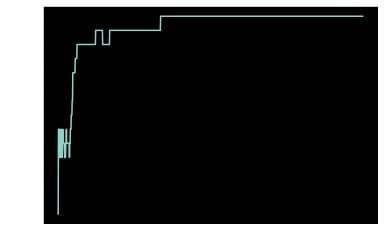

In [62]:
plt.plot(range(1,1000),arr_c_svc)

In [64]:
df_c_svc = pd.DataFrame(arr_c_svc,columns=['acc_score'])
df_c_svc.sort_values(by=['acc_score'],ascending=False).head().index+1

Int64Index([500, 672, 659, 660, 661], dtype='int64')

In [65]:
param_grid = {'C': [500, 672, 659, 660, 661],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['linear','rbf']}  
  
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3) 
  
# fitting the model for grid search 
grid.fit(X_train, y_train) 

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] C=500, gamma=1, kernel=linear ...................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ....... C=500, gamma=1, kernel=linear, score=0.899, total=   0.5s
[CV] C=500, gamma=1, kernel=linear ...................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s


[CV] ....... C=500, gamma=1, kernel=linear, score=0.874, total=   0.5s
[CV] C=500, gamma=1, kernel=linear ...................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.8s remaining:    0.0s


[CV] ....... C=500, gamma=1, kernel=linear, score=0.877, total=   0.5s
[CV] C=500, gamma=1, kernel=linear ...................................
[CV] ....... C=500, gamma=1, kernel=linear, score=0.851, total=   0.4s
[CV] C=500, gamma=1, kernel=linear ...................................
[CV] ....... C=500, gamma=1, kernel=linear, score=0.873, total=   0.5s
[CV] C=500, gamma=1, kernel=rbf ......................................
[CV] .......... C=500, gamma=1, kernel=rbf, score=0.986, total=   0.1s
[CV] C=500, gamma=1, kernel=rbf ......................................
[CV] .......... C=500, gamma=1, kernel=rbf, score=0.986, total=   0.1s
[CV] C=500, gamma=1, kernel=rbf ......................................
[CV] .......... C=500, gamma=1, kernel=rbf, score=0.986, total=   0.1s
[CV] C=500, gamma=1, kernel=rbf ......................................
[CV] .......... C=500, gamma=1, kernel=rbf, score=0.989, total=   0.1s
[CV] C=500, gamma=1, kernel=rbf ......................................
[CV] .

[CV] ..... C=672, gamma=0.1, kernel=linear, score=0.899, total=   0.6s
[CV] C=672, gamma=0.1, kernel=linear .................................
[CV] ..... C=672, gamma=0.1, kernel=linear, score=0.874, total=   0.5s
[CV] C=672, gamma=0.1, kernel=linear .................................
[CV] ..... C=672, gamma=0.1, kernel=linear, score=0.877, total=   0.6s
[CV] C=672, gamma=0.1, kernel=linear .................................
[CV] ..... C=672, gamma=0.1, kernel=linear, score=0.851, total=   0.5s
[CV] C=672, gamma=0.1, kernel=linear .................................
[CV] ..... C=672, gamma=0.1, kernel=linear, score=0.877, total=   0.6s
[CV] C=672, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=672, gamma=0.1, kernel=rbf, score=0.968, total=   0.0s
[CV] C=672, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=672, gamma=0.1, kernel=rbf, score=0.989, total=   0.0s
[CV] C=672, gamma=0.1, kernel=rbf ....................................
[CV] .

[CV] .... C=659, gamma=0.01, kernel=linear, score=0.899, total=   0.6s
[CV] C=659, gamma=0.01, kernel=linear ................................
[CV] .... C=659, gamma=0.01, kernel=linear, score=0.874, total=   0.5s
[CV] C=659, gamma=0.01, kernel=linear ................................
[CV] .... C=659, gamma=0.01, kernel=linear, score=0.877, total=   0.6s
[CV] C=659, gamma=0.01, kernel=linear ................................
[CV] .... C=659, gamma=0.01, kernel=linear, score=0.859, total=   0.5s
[CV] C=659, gamma=0.01, kernel=linear ................................
[CV] .... C=659, gamma=0.01, kernel=linear, score=0.877, total=   0.6s
[CV] C=659, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=659, gamma=0.01, kernel=rbf, score=0.953, total=   0.0s
[CV] C=659, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=659, gamma=0.01, kernel=rbf, score=0.968, total=   0.0s
[CV] C=659, gamma=0.01, kernel=rbf ...................................
[CV] .

[CV] ... C=660, gamma=0.001, kernel=linear, score=0.899, total=   0.7s
[CV] C=660, gamma=0.001, kernel=linear ...............................
[CV] ... C=660, gamma=0.001, kernel=linear, score=0.874, total=   0.6s
[CV] C=660, gamma=0.001, kernel=linear ...............................
[CV] ... C=660, gamma=0.001, kernel=linear, score=0.877, total=   0.5s
[CV] C=660, gamma=0.001, kernel=linear ...............................
[CV] ... C=660, gamma=0.001, kernel=linear, score=0.862, total=   0.5s
[CV] C=660, gamma=0.001, kernel=linear ...............................
[CV] ... C=660, gamma=0.001, kernel=linear, score=0.877, total=   0.7s
[CV] C=660, gamma=0.001, kernel=rbf ..................................
[CV] ...... C=660, gamma=0.001, kernel=rbf, score=0.928, total=   0.0s
[CV] C=660, gamma=0.001, kernel=rbf ..................................
[CV] ...... C=660, gamma=0.001, kernel=rbf, score=0.917, total=   0.0s
[CV] C=660, gamma=0.001, kernel=rbf ..................................
[CV] .

[CV] .. C=661, gamma=0.0001, kernel=linear, score=0.899, total=   0.5s
[CV] C=661, gamma=0.0001, kernel=linear ..............................
[CV] .. C=661, gamma=0.0001, kernel=linear, score=0.874, total=   0.6s
[CV] C=661, gamma=0.0001, kernel=linear ..............................
[CV] .. C=661, gamma=0.0001, kernel=linear, score=0.877, total=   0.6s
[CV] C=661, gamma=0.0001, kernel=linear ..............................
[CV] .. C=661, gamma=0.0001, kernel=linear, score=0.848, total=   0.5s
[CV] C=661, gamma=0.0001, kernel=linear ..............................
[CV] .. C=661, gamma=0.0001, kernel=linear, score=0.877, total=   0.6s
[CV] C=661, gamma=0.0001, kernel=rbf .................................
[CV] ..... C=661, gamma=0.0001, kernel=rbf, score=0.884, total=   0.0s
[CV] C=661, gamma=0.0001, kernel=rbf .................................
[CV] ..... C=661, gamma=0.0001, kernel=rbf, score=0.834, total=   0.0s
[CV] C=661, gamma=0.0001, kernel=rbf .................................
[CV] .

[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:  1.2min finished


GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [500, 672, 659, 660, 661],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['linear', 'rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [66]:
grid.best_estimator_

SVC(C=500, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf', max_iter=-1,
    probability=False, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

### Сравнение нескольких моделей с учетом подобранных парметров

In [71]:
# выбрал три наилучших модели по точности и подставил в них настроенные парметры
rnd_clf = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=129, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=15,
                       n_jobs=None, oob_score=False, random_state=42,
                       verbose=0, warm_start=False)
svm_clf = SVC(C=500, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
                        decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf', max_iter=-1,
                        probability=True, random_state=None, shrinking=True, tol=0.001,
                        verbose=False)
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(
                                                        ccp_alpha=0.0,
                                                        class_weight=None,
                                                        criterion='gini',
                                                        max_depth=129,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort='deprecated',
                                                        random_state=42,
                                                        splitter='best'),
                  bootstrap=True, bootstrap_features=False, max_features=1.0,
                  max_samples=0.5, n_estimators=86, n_jobs=None,
                  oob_score=False, random_state=42, verbose=0,
                  warm_start=False
)

voting_clf = VotingClassifier(
    estimators=[('rf', rnd_clf), ('svc', svm_clf),('bagging', bag_clf)],
    voting='soft')
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('rf',
                              RandomForestClassifier(bootstrap=True,
                                                     ccp_alpha=0.0,
                                                     class_weight=None,
                                                     criterion='gini',
                                                     max_depth=129,
                                                     max_features='auto',
                                                     max_leaf_nodes=None,
                                                     max_samples=None,
                                                     min_impurity_decrease=0.0,
                                                     min_impurity_split=None,
                                                     min_samples_leaf=1,
                                                     min_samples_split=2,
                                                     min_weight_fraction_leaf=0.0,
         

In [72]:
# результат выбранных моделей
from sklearn.metrics import accuracy_score

for clf in (bag_clf, rnd_clf, svm_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

BaggingClassifier 0.9682080924855492
RandomForestClassifier 0.976878612716763
SVC 0.9710982658959537
VotingClassifier 0.976878612716763


## Features importances

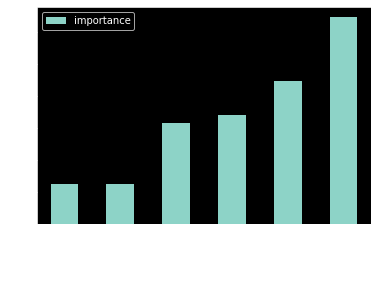

In [112]:
df_fi = pd.DataFrame(rnd_clf.feature_importances_, columns=['importance']) 
df_fi['feature_name'] = data.drop(columns=['class']).columns #m.reshape(1,6)
df_fi.sort_values(by = 'importance').plot(kind = 'bar', x = 'feature_name')

## Stacking models

In [113]:
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(random_state=42))
rnd_clf = RandomForestClassifier(random_state=42)
svm_clf = SVC(random_state=42)

X_in, X_out, y_in, y_out = train_test_split(X_train, y_train, random_state=42) # hold-out - blending. 

In [119]:
svm_clf.fit(X_in, y_in)
rnd_clf.fit(X_in, y_in)

svm_y = svm_clf.predict(X_out)
rnd_y = rnd_clf.predict(X_out)

In [120]:
bag_clf.fit(np.c_[svm_y, rnd_y], y_out)

BaggingClassifier(base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                        class_weight=None,
                                                        criterion='gini',
                                                        max_depth=None,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort='deprecated',
                                                        random_state=42,
  

In [121]:
y_stack = bag_clf.predict(np.c_[svm_clf.predict(X_test), rnd_clf.predict(X_test)])

In [123]:
accuracy_score(y_test, y_stack)

0.9450867052023122

In [124]:
accuracy_score(y_test, rnd_clf.predict(X_test))

0.9479768786127167

## Выводы

In [131]:
# 1. На основнаии датасета были построены несколько моделей и на наилучших были настроены параметры
# 2. Средний результат модели высокий, точность классификации около 98%
# 3. Интересный факт, что линейные модели не смогли показать высокий результат, а SVC показал результат 
# на ур0вне линейного леса
# 4. По результатам оценки признаков, наиболее важным фактором при оценке машин является
# safety(состояние машины), наменее важным - количество дверей, что является достаточно логичным